In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pandas.plotting import scatter_matrix
import seaborn as sns
from IPython.display import set_matplotlib_formats, HTML
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib import colors as mcolors
from pandas.plotting import register_matplotlib_converters
import statsmodels.api as sm
%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [4]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 0047-F845

 Directory of C:\Users\tomil

19/08/2022  20:49    <DIR>          .
22/07/2022  01:01    <DIR>          ..
08/08/2022  21:52               985 .bash_history
31/07/2022  19:15                55 .gitconfig
19/08/2022  20:47    <DIR>          .ipynb_checkpoints
30/07/2022  12:27    <DIR>          .ipython
30/07/2022  15:12    <DIR>          .jupyter
08/08/2022  22:10    <DIR>          .matplotlib
06/06/2022  17:28    <DIR>          .vscode
02/05/2021  01:34    <DIR>          3D Objects
22/07/2022  01:07    <DIR>          Contacts
26/07/2022  21:54    <DIR>          data_1.01_activities
02/08/2022  11:28    <DIR>          Documents
18/08/2022  15:51    <DIR>          Downloads
22/07/2022  01:07    <DIR>          Favorites
02/08/2022  11:18    <DIR>          IronTomilola
19/08/2022  20:41           116,585 lab 2 assignment.ipynb
09/08/2022  14:07           102,487 LAB 3.ipynb
04/08/2022  10:55    <DIR>          lab-bash
0

In [7]:
cd lab-customer-analysis-round-2

C:\Users\tomil\lab-customer-analysis-round-2


In [8]:
# Load the DF
df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

In [9]:
df

Unnamed: 0 Customer       State  Customer Lifetime Value Response  \
0               0  DK49336     Arizona              4809.216960       No   
1               1  KX64629  California              2228.525238       No   
2               2  LZ68649  Washington             14947.917300       No   
3               3  XL78013      Oregon             22332.439460      Yes   
4               4  QA50777      Oregon              9025.067525       No   
...           ...      ...         ...                      ...      ...   
10905       10905  FE99816      Nevada             15563.369440       No   
10906       10906  KX53892      Oregon              5259.444853       No   
10907       10907  TL39050     Arizona             23893.304100       No   
10908       10908  WA60547  California             11971.977650       No   
10909       10909  IV32877         NaN              6857.519928      NaN   

       Coverage Education Effective To Date EmploymentStatus Gender  ...  \
0         Basic   College           2/18/11         Employed      M  ...   
1         Basic   College           1/18/11       Unemployed      F  ...   
2         Basic  Bachelor           2/10/11         Employed      M  ...   
3      Extended   College           1/11/11         Employed      M  ...   
4       Premium  Bachelor           1/17/11    Medical Leave      F  ...   
...         ...       ...               ...              ...    ...  ...   
10905   Premium  Bachelor           1/19/11       Unemployed      F  ...   
10906     Basic   College            1/6/11         Employed      F  ...   
10907  Extended  Bachelor            2/6/11         Employed      F  ...   
10908   Premium   College           2/13/11         Employed      F  ...   
10909     Basic  Bachelor            1/8/11       Unemployed      M  ...   

       Number of Open Complaints Number of Policies     Policy Type  \
0                            0.0                  9  Corporate Auto   
1                            0.0                  1   Personal Auto   
2                            0.0                  2   Personal Auto   
3                            0.0                  2  Corporate Auto   
4                            NaN                  7   Personal Auto   
...                          ...                ...             ...   
10905                        NaN                  7   Personal Auto   
10906                        0.0                  6   Personal Auto   
10907                        0.0                  2  Corporate Auto   
10908                        4.0                  6   Personal Auto   
10909                        0.0                  3   Personal Auto   

             Policy  Renew Offer Type  Sales Channel  Total Claim Amount  \
0      Corporate L3            Offer3          Agent          292.800000   
1       Personal L3            Offer4    Call Center          744.924331   
2       Personal L3            Offer3    Call Center          480.000000   
3      Corporate L3            Offer2         Branch          484.013411   
4       Personal L2            Offer1         Branch          707.925645   
...             ...               ...            ...                 ...   
10905   Personal L1            Offer3            Web         1214.400000   
10906   Personal L3            Offer2         Branch          273.018929   
10907  Corporate L3            Offer1            Web          381.306996   
10908   Personal L1            Offer1         Branch          618.288849   
10909   Personal L1            Offer4            Web         1021.719397   

       Vehicle Class Vehicle Size Vehicle Type  
0      Four-Door Car      Medsize          NaN  
1      Four-Door Car      Medsize          NaN  
2                SUV      Medsize            A  
3      Four-Door Car      Medsize            A  
4      Four-Door Car      Medsize          NaN  
...              ...          ...          ...  
10905     Luxury Car      Medsize            A  
10906  Four-Door Car   

In [10]:
def df_trans(df):
    """This function will perform a few transformations on the dataset"""
    
    #Drop column
    #df.drop(columns=['Unnamed: 0'], inplace=True)
    
    #Standarize Column Names - Lower the letters. 
    df.columns = df.columns.str.lower()
    
    #Print Numerical and Categorical Columns 
    numerical = df._get_numeric_data().columns
    cols = df.columns
    categorical = list(set(cols) - set(numerical))
    print(f'The numerical columns are: {numerical}')
    print(f'The categorical columns are: {categorical}')

    #Deal with NANs
    df['income'].fillna(df['income'].median(), inplace=True)
    df.fillna(0, inplace=True)

    #Transform the column df['effective to date'] to date time
    df['effective to date'] = pd.to_datetime(df['effective to date'])

    #Create column with month
    df['month'] = df['effective to date'].dt.month

    # Return the cleand DF with the first the quater of data

    return df
#Clean the file and deal with NAMS. Using the Function created in the previous excercice. 

df = df_trans(df)

The numerical columns are: Index(['unnamed: 0', 'customer lifetime value', 'income',
       'monthly premium auto', 'months since last claim',
       'months since policy inception', 'number of open complaints',
       'number of policies', 'total claim amount'],
      dtype='object')
The categorical columns are: ['vehicle class', 'response', 'sales channel', 'employmentstatus', 'state', 'vehicle type', 'policy type', 'coverage', 'gender', 'customer', 'policy', 'education', 'marital status', 'renew offer type', 'vehicle size', 'effective to date', 'location code']


In [11]:
# Check the data types of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed: 0                     10910 non-null  int64         
 1   customer                       10910 non-null  object        
 2   state                          10910 non-null  object        
 3   customer lifetime value        10910 non-null  float64       
 4   response                       10910 non-null  object        
 5   coverage                       10910 non-null  object        
 6   education                      10910 non-null  object        
 7   effective to date              10910 non-null  datetime64[ns]
 8   employmentstatus               10910 non-null  object        
 9   gender                         10910 non-null  object        
 10  income                         10910 non-null  int64         
 11  location code  

In [12]:
#Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals

# DF with numerical columns
df_num = df[['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies',
       'total claim amount']]

display(df_num)

# DF with Categorical columns

df_cat = df[['education', 'vehicle size', 'marital status', 'location code', 'renew offer type', 'employmentstatus', 'gender', 'policy', 'state', 'vehicle class', 'policy type', 'response', 'customer', 'effective to date', 'coverage', 'sales channel']]

display(df_cat)

customer lifetime value  income  monthly premium auto  \
0                  4809.216960   48029                    61   
1                  2228.525238       0                    64   
2                 14947.917300   22139                   100   
3                 22332.439460   49078                    97   
4                  9025.067525   23675                   117   
...                        ...     ...                   ...   
10905             15563.369440       0                   253   
10906              5259.444853   61146                    65   
10907             23893.304100   39837                   201   
10908             11971.977650   64195                   158   
10909              6857.519928       0                   101   

       months since last claim  months since policy inception  \
0                          7.0                             52   
1                          3.0                             26   
2                         34.0                             31   
3                         10.0                              3   
4                          0.0                             31   
...                        ...                            ...   
10905                      0.0                             40   
10906                      7.0                             68   
10907                     11.0                             63   
10908                      0.0                             27   
10909                     31.0                              1   

       number of open complaints  number of policies  total claim amount  
0                            0.0                   9          292.800000  
1                            0.0                   1          744.924331  
2                            0.0                   2          480.000000  
3                            0.0                   2          484.013411  
4                            0.0                   7          707.925645  
...                          ...                 ...                 ...  
10905                        0.0                   7         1214.400000  
10906                        0.0                   6          273.018929  
10907                        0.0                   2          381.306996  
10908                        4.0                   6          618.288849  
10909                        0.0                   3         1021.719397  

[10910 rows x 8 columns]

education vehicle size marital status location code renew offer type  \
0       College      Medsize        Married      Suburban           Offer3   
1       College      Medsize         Single      Suburban           Offer4   
2      Bachelor      Medsize         Single      Suburban           Offer3   
3       College      Medsize         Single      Suburban           Offer2   
4      Bachelor      Medsize        Married      Suburban           Offer1   
...         ...          ...            ...           ...              ...   
10905  Bachelor      Medsize        Married      Suburban           Offer3   
10906   College      Medsize        Married         Urban           Offer2   
10907  Bachelor      Medsize        Married         Rural           Offer1   
10908   College      Medsize       Divorced         Urban           Offer1   
10909  Bachelor      Medsize         Single      Suburban           Offer4   

      employmentstatus gender        policy       state  vehicle class  \
0             Employed      M  Corporate L3     Arizona  Four-Door Car   
1           Unemployed      F   Personal L3  California  Four-Door Car   
2             Employed      M   Personal L3  Washington            SUV   
3             Employed      M  Corporate L3      Oregon  Four-Door Car   
4        Medical Leave      F   Personal L2      Oregon  Four-Door Car   
...                ...    ...           ...         ...            ...   
10905       Unemployed      F   Personal L1      Nevada     Luxury Car   
10906         Employed      F   Personal L3      Oregon  Four-Door Car   
10907         Employed      F  Corporate L3     Arizona     Luxury SUV   
10908         Employed      F   Personal L1  California            SUV   
10909       Unemployed      M   Personal L1           0            SUV   

          policy type response customer effective to date  coverage  \
0      Corporate Auto       No  DK49336        2011-02-18     Basic   
1       Personal Auto       No  KX64629        2011-01-18     Basic   
2       Personal Auto       No  LZ68649        2011-02-10     Basic   
3      Corporate Auto      Yes  XL78013        2011-01-11  Extended   
4       Personal Auto       No  QA50777        2011-01-17   Premium   
...               ...      ...      ...               ...       ...   
10905   Personal Auto       No  FE99816        2011-01-19   Premium   
10906   Personal Auto       No  KX53892        2011-01-06     Basic   
10907  Corporate Auto       No  TL39050        2011-02-06  Extended   
10908   Personal Auto       No  WA60547        2011-02-13   Premium   
10909   Personal Auto        0  IV32877        2011-01-08     Basic   

      sales channel  
0             Agent  
1       Call Center  
2       Call Center  
3            Branch  
4            Branch  
...             ...  
10905           Web  
10906        Branch  
10907           Web  
10908        Branch  
10909           Web  

[10910 rows x 16 columns]

In [13]:
# Now we will try to check the normality of the numerical variables visually

#select numerical columns 
df_num = df.select_dtypes(include=np.number)

#Display Numerical dataset
display(df_num)

#select categorical columns 
df_cat = df.select_dtypes(include=np.object)

#Display Categorical dataset
display(df_num)

unnamed: 0  customer lifetime value  income  monthly premium auto  \
0               0              4809.216960   48029                    61   
1               1              2228.525238       0                    64   
2               2             14947.917300   22139                   100   
3               3             22332.439460   49078                    97   
4               4              9025.067525   23675                   117   
...           ...                      ...     ...                   ...   
10905       10905             15563.369440       0                   253   
10906       10906              5259.444853   61146                    65   
10907       10907             23893.304100   39837                   201   
10908       10908             11971.977650   64195                   158   
10909       10909              6857.519928       0                   101   

       months since last claim  months since policy inception  \
0                          7.0                             52   
1                          3.0                             26   
2                         34.0                             31   
3                         10.0                              3   
4                          0.0                             31   
...                        ...                            ...   
10905                      0.0                             40   
10906                      7.0                             68   
10907                     11.0                             63   
10908                      0.0                             27   
10909                     31.0                              1   

       number of open complaints  number of policies  total claim amount  \
0                            0.0                   9          292.800000   
1                            0.0                   1          744.924331   
2                            0.0                   2          480.000000   
3                            0.0                   2          484.013411   
4                            0.0                   7          707.925645   
...                          ...                 ...                 ...   
10905                        0.0                   7         1214.400000   
10906                        0.0                   6          273.018929   
10907                        0.0                   2          381.306996   
10908                        4.0                   6          618.288849   
10909                        0.0                   3         1021.719397   

       month  
0          2  
1          1  
2          2  
3          1  
4          1  
...      ...  
10905      1  
10906      1  
10907      2  
10908      2  
10909      1  

[10910 rows x 10 columns]

C:\Users\tomil\AppData\Local\Temp\ipykernel_32812\2408682807.py:10: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_cat = df.select_dtypes(include=np.object)


unnamed: 0  customer lifetime value  income  monthly premium auto  \
0               0              4809.216960   48029                    61   
1               1              2228.525238       0                    64   
2               2             14947.917300   22139                   100   
3               3             22332.439460   49078                    97   
4               4              9025.067525   23675                   117   
...           ...                      ...     ...                   ...   
10905       10905             15563.369440       0                   253   
10906       10906              5259.444853   61146                    65   
10907       10907             23893.304100   39837                   201   
10908       10908             11971.977650   64195                   158   
10909       10909              6857.519928       0                   101   

       months since last claim  months since policy inception  \
0                          7.0                             52   
1                          3.0                             26   
2                         34.0                             31   
3                         10.0                              3   
4                          0.0                             31   
...                        ...                            ...   
10905                      0.0                             40   
10906                      7.0                             68   
10907                     11.0                             63   
10908                      0.0                             27   
10909                     31.0                              1   

       number of open complaints  number of policies  total claim amount  \
0                            0.0                   9          292.800000   
1                            0.0                   1          744.924331   
2                            0.0                   2          480.000000   
3                            0.0                   2          484.013411   
4                            0.0                   7          707.925645   
...                          ...                 ...                 ...   
10905                        0.0                   7         1214.400000   
10906                        0.0                   6          273.018929   
10907                        0.0                   2          381.306996   
10908                        4.0                   6          618.288849   
10909                        0.0                   3         1021.719397   

       month  
0          2  
1          1  
2          2  
3          1  
4          1  
...      ...  
10905      1  
10906      1  
10907      2  
10908      2  
10909      1  

[10910 rows x 10 columns]

In [16]:
# default styles
def set_sns_format(width=14, height=8):
    sns.set_theme(palette='pastel', context='notebook',rc={'savefig.dpi':300})
    set_matplotlib_formats('retina')
    matplotlib.rcParams['figure.figsize'] = (width, height)
    return None
#Run Function to set style for following plots. 
set_sns_format(width=14, height=8)

C:\Users\tomil\AppData\Local\Temp\ipykernel_32812\3959407741.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [15]:
# Resources: https://www.statology.org/normality-test-python/

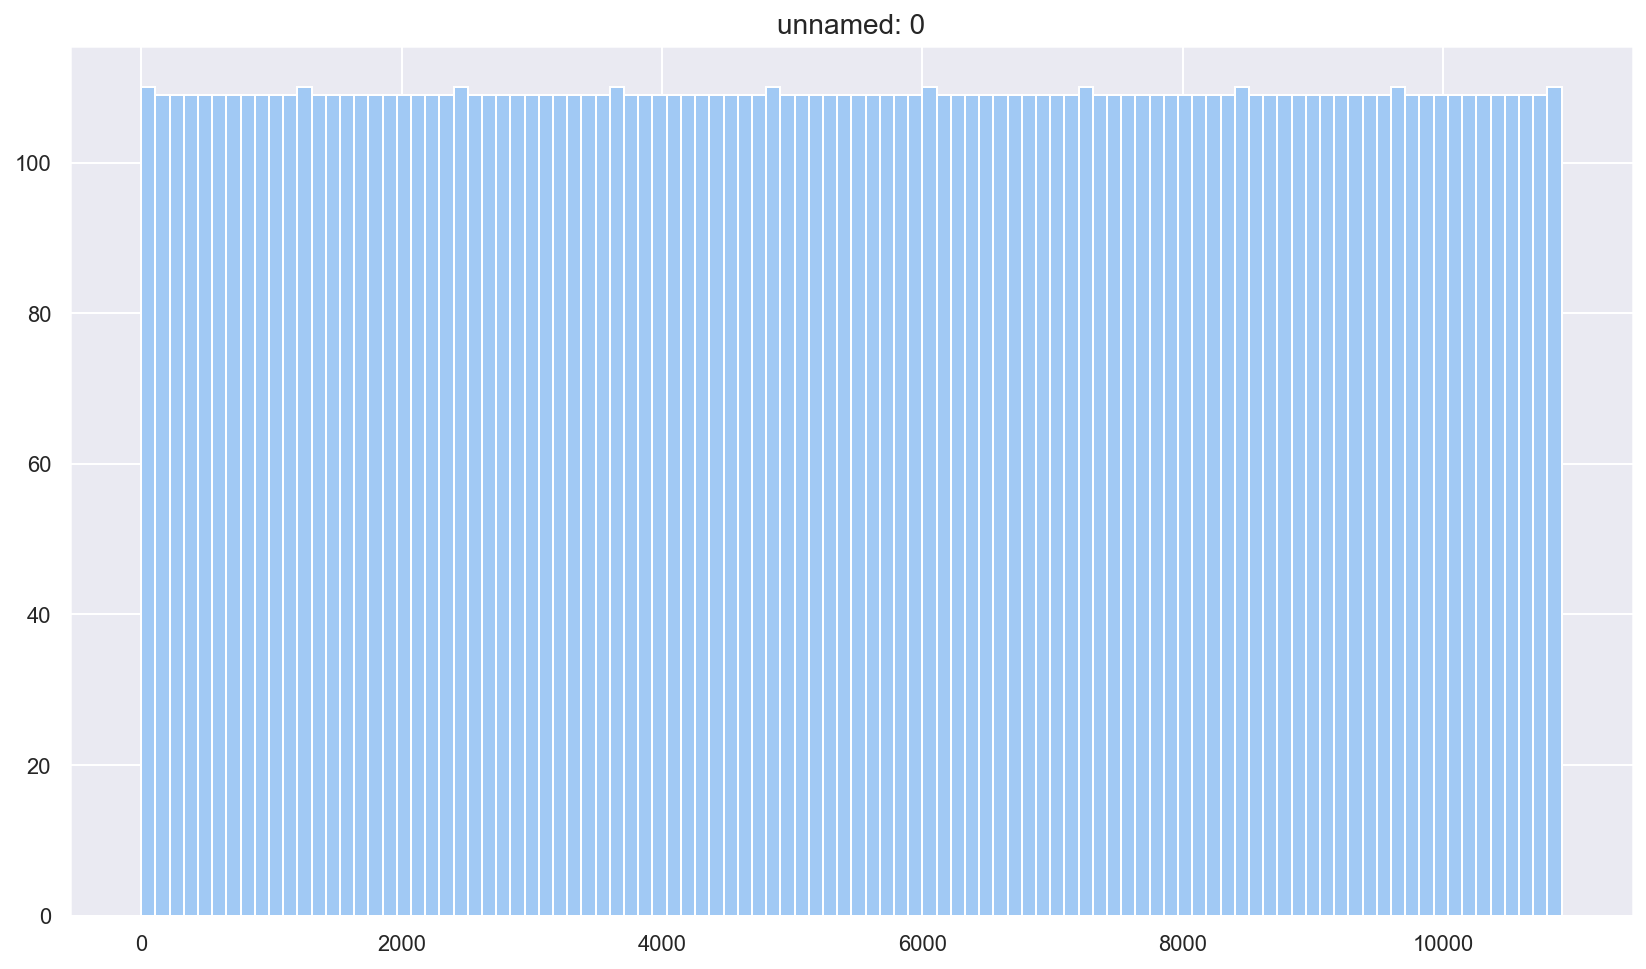

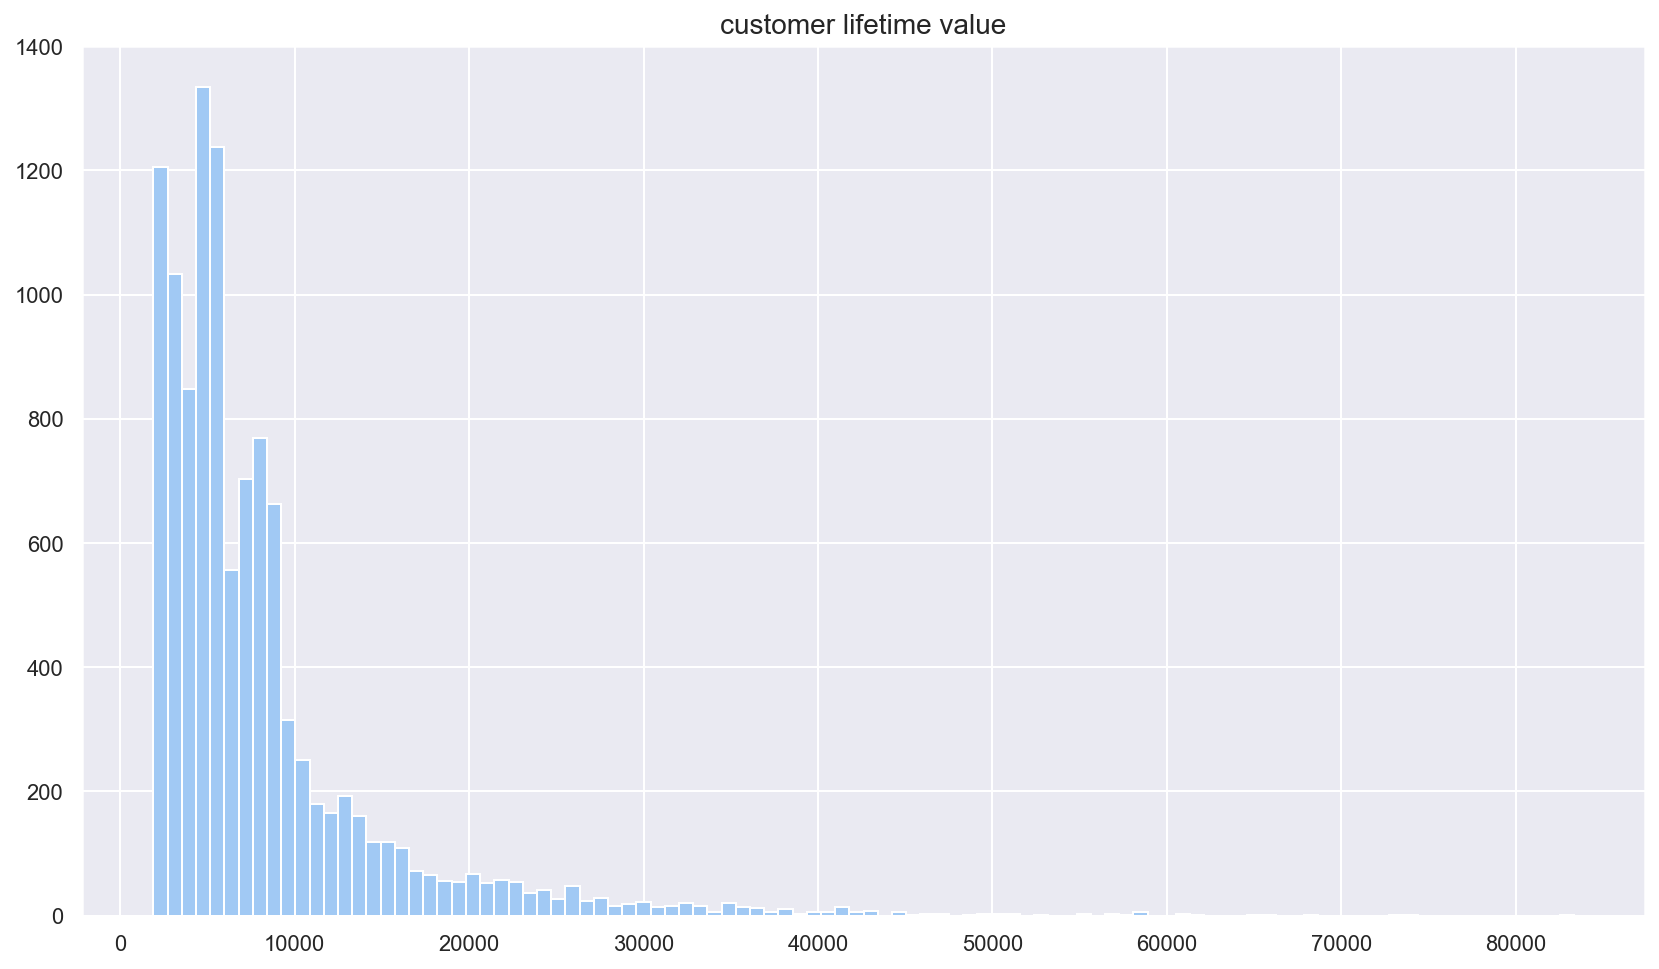

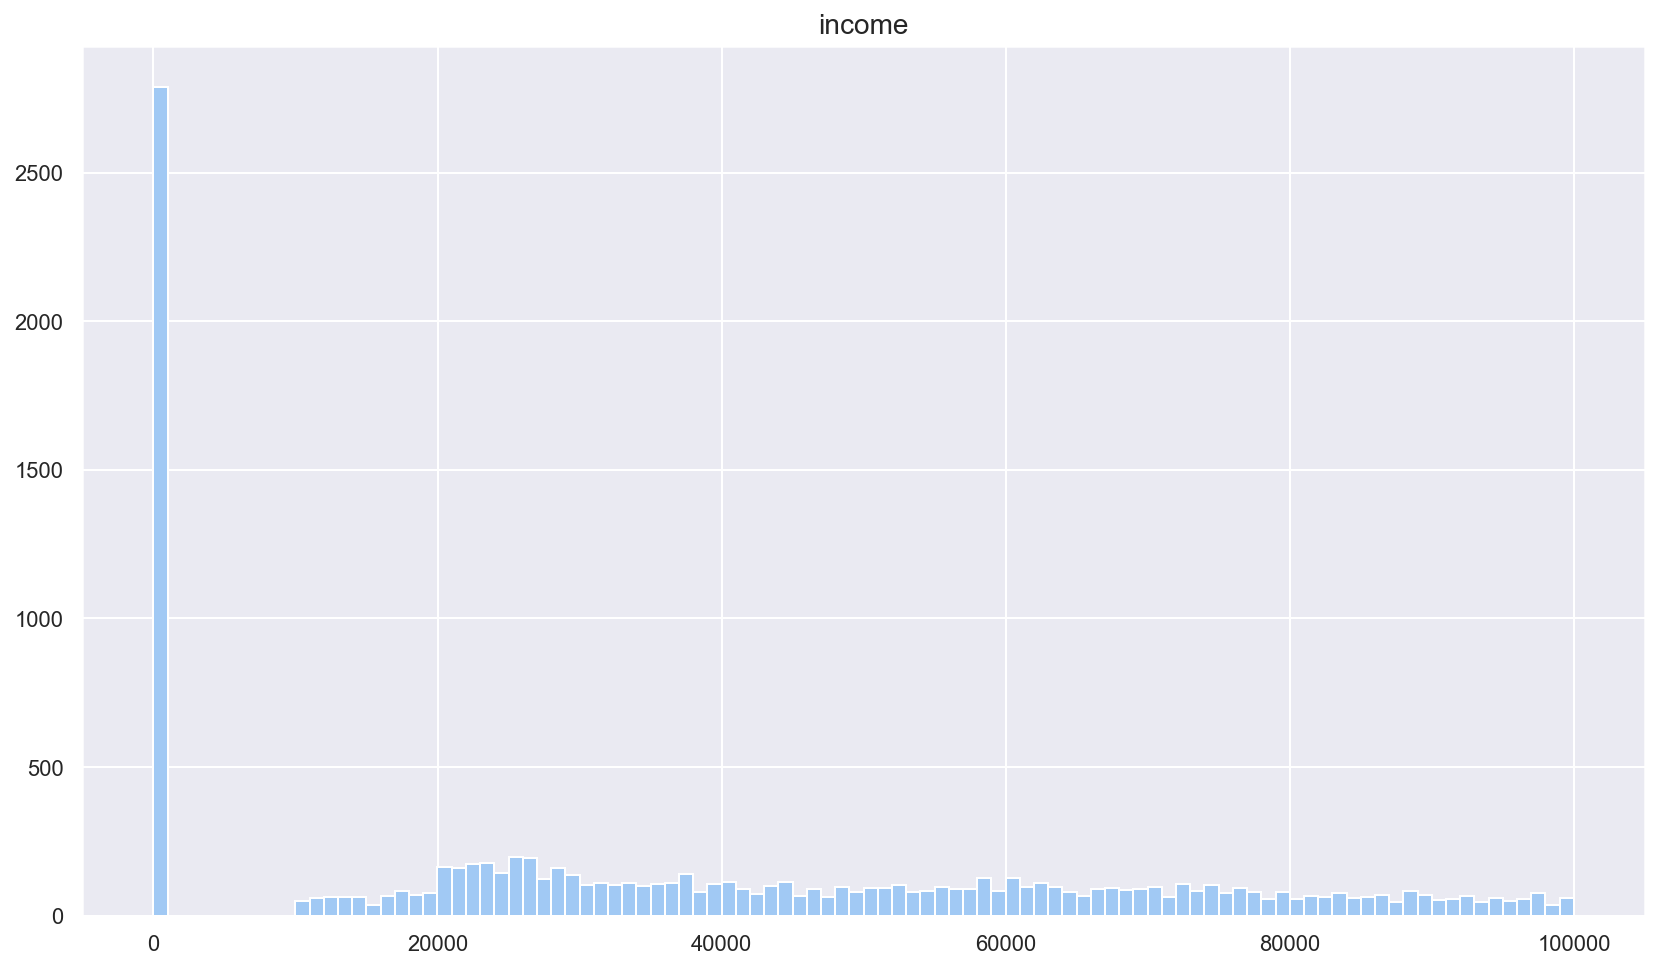

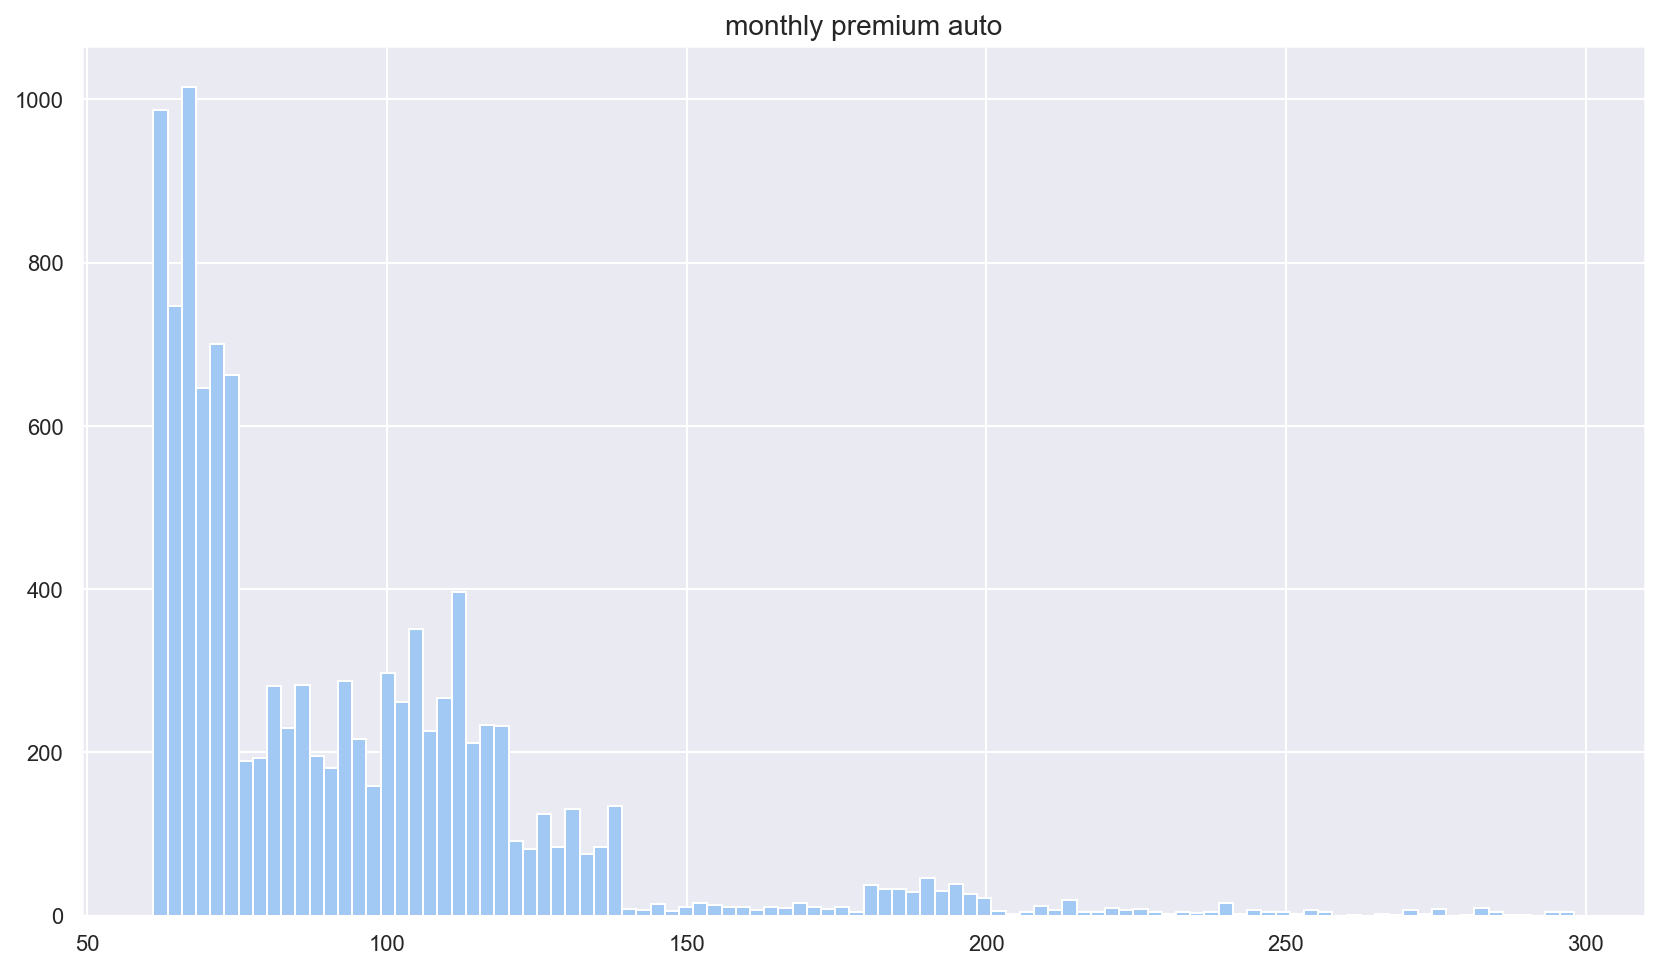

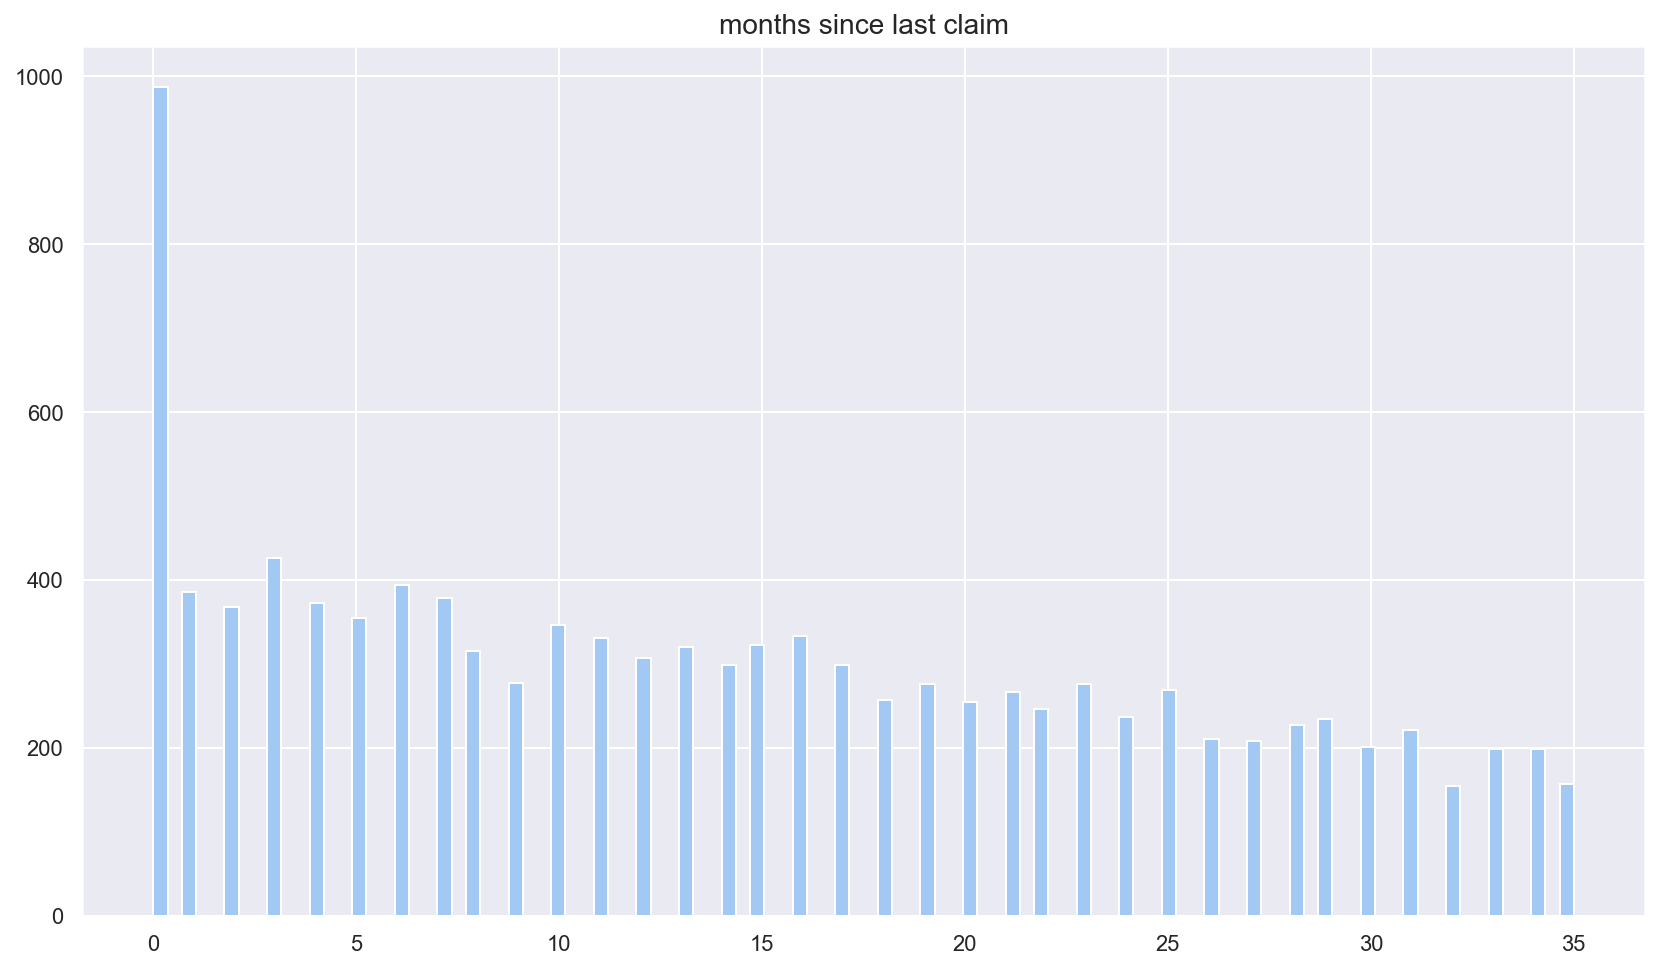

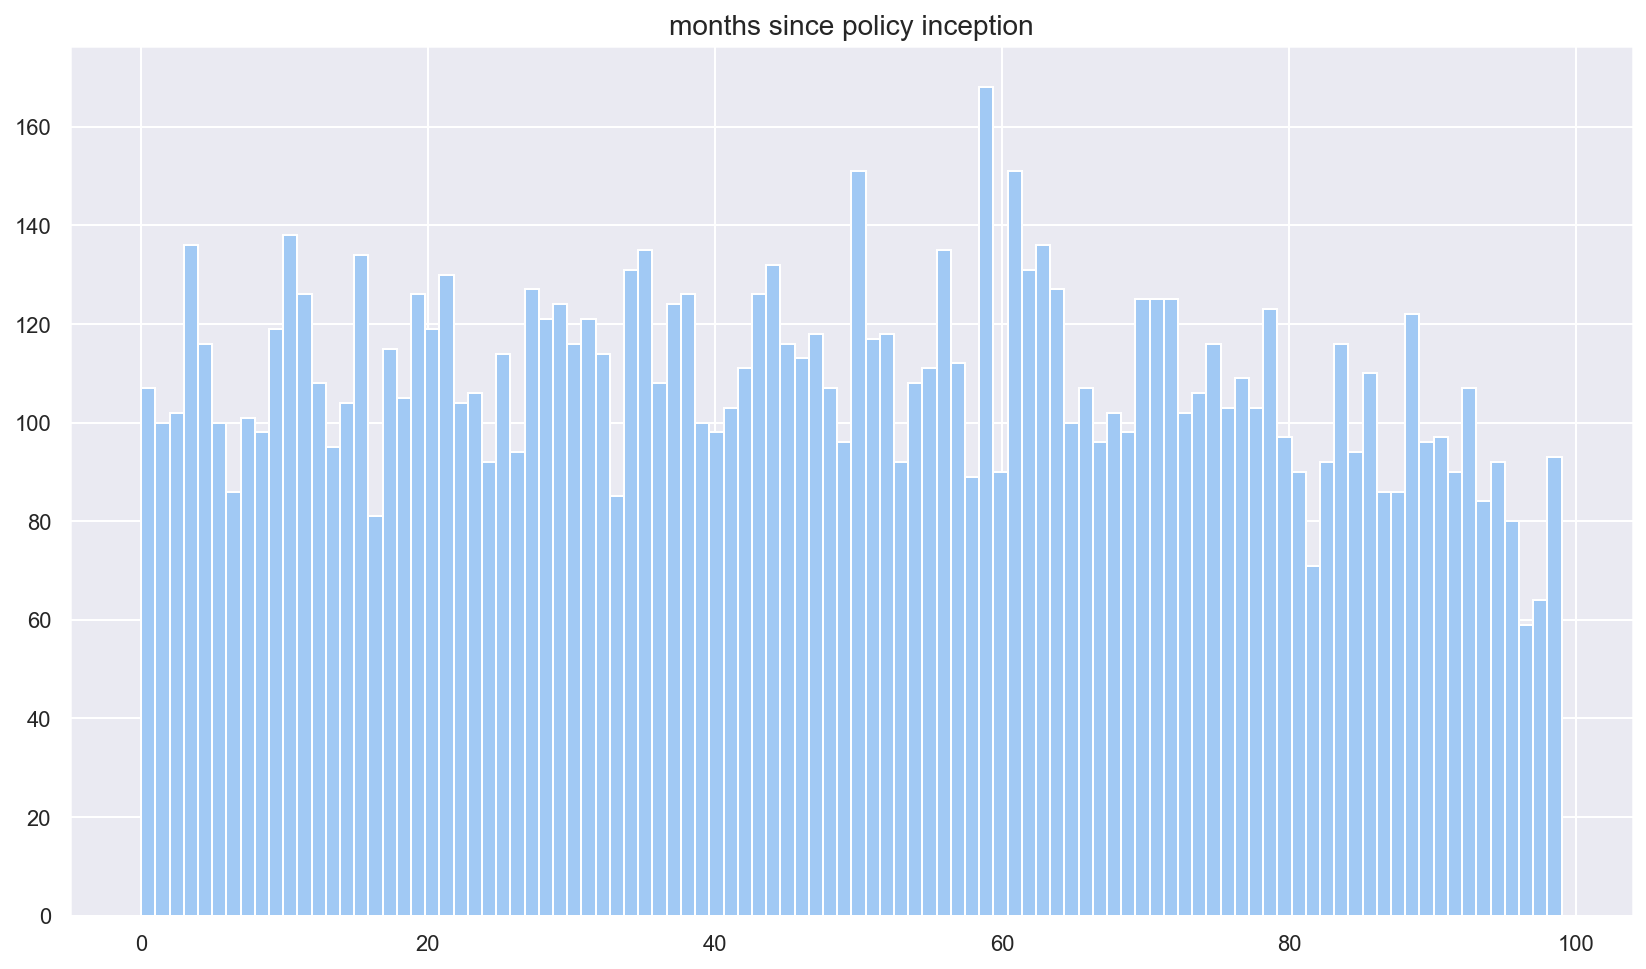

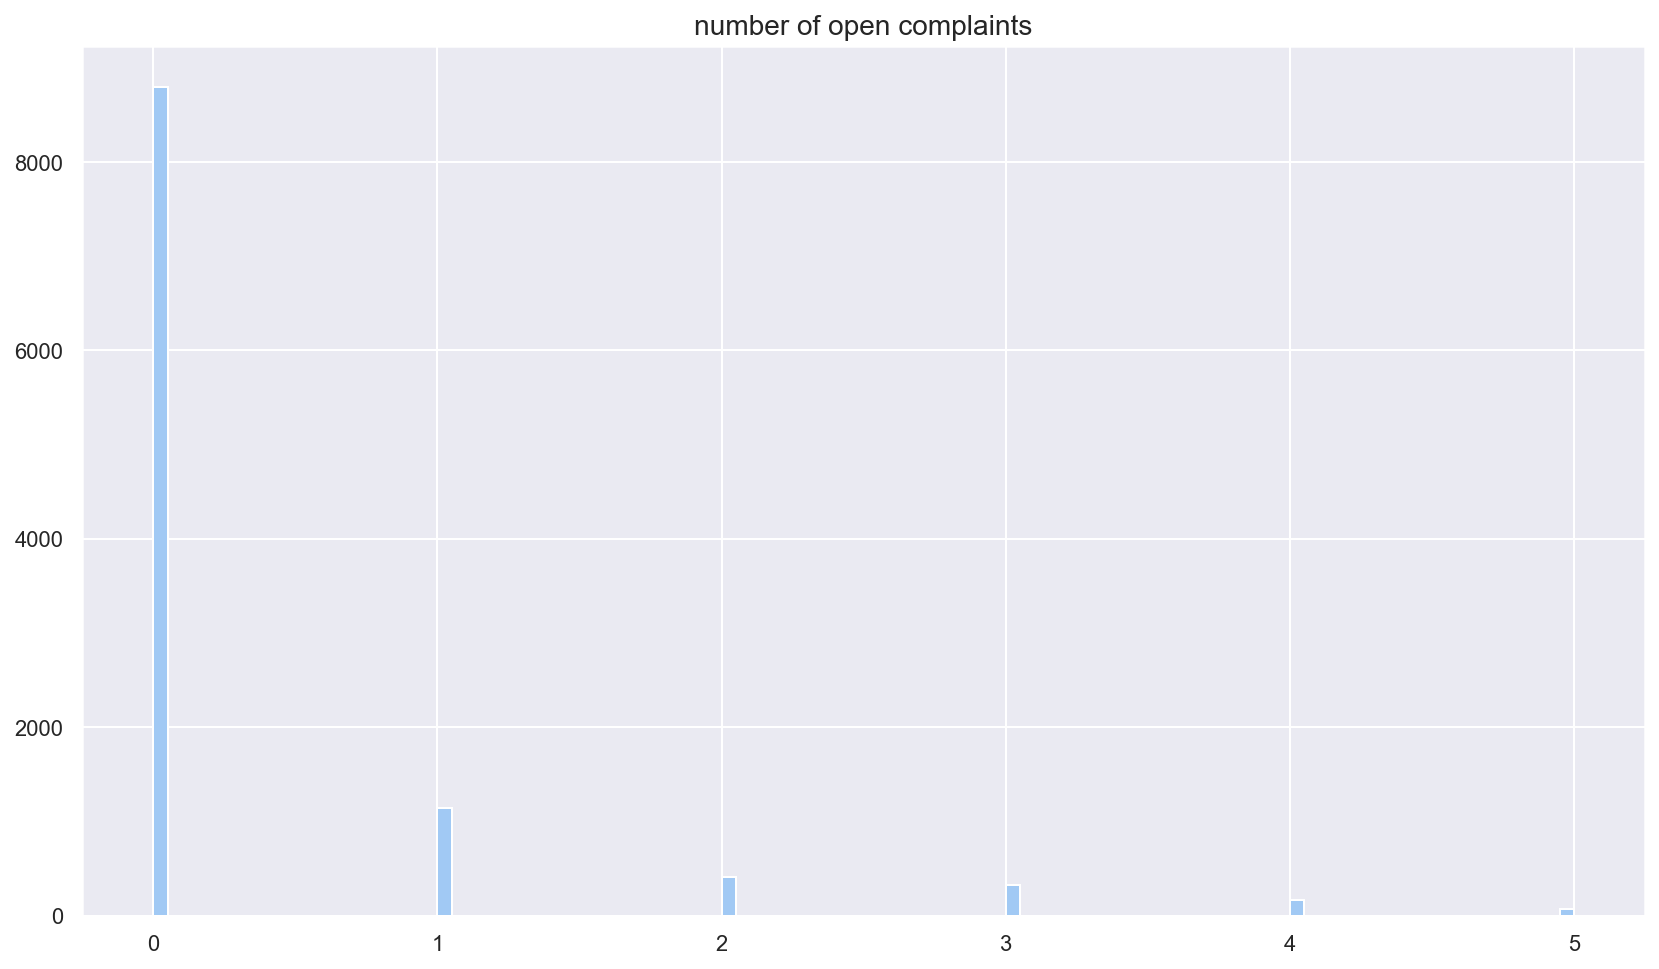

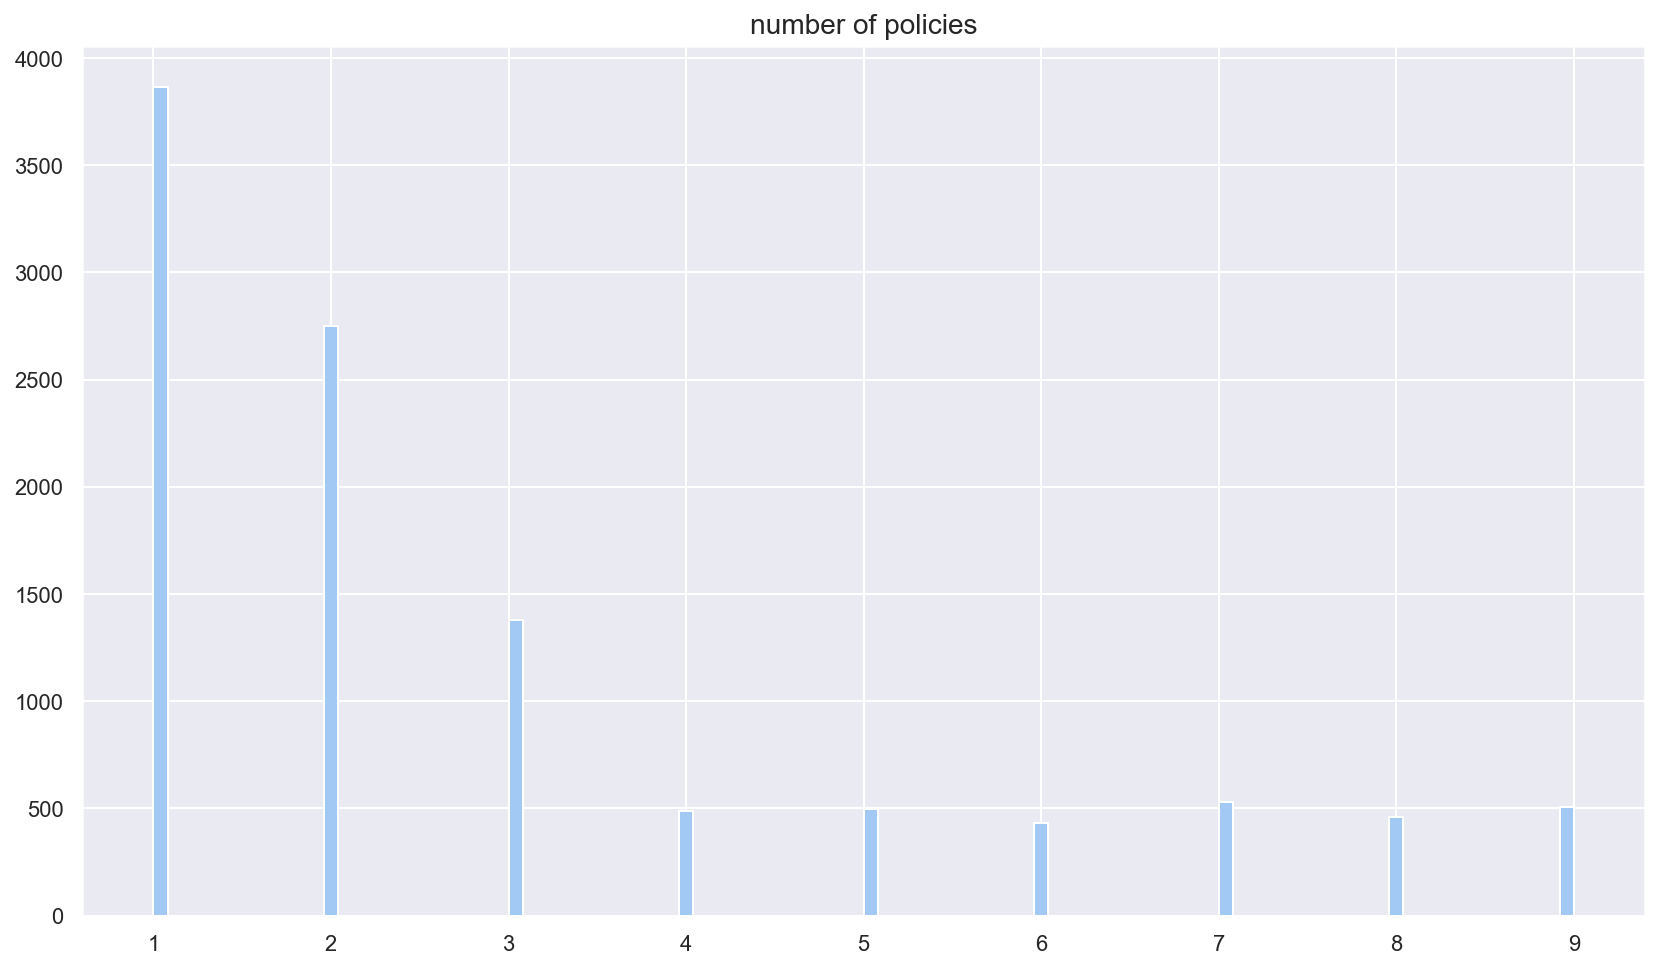

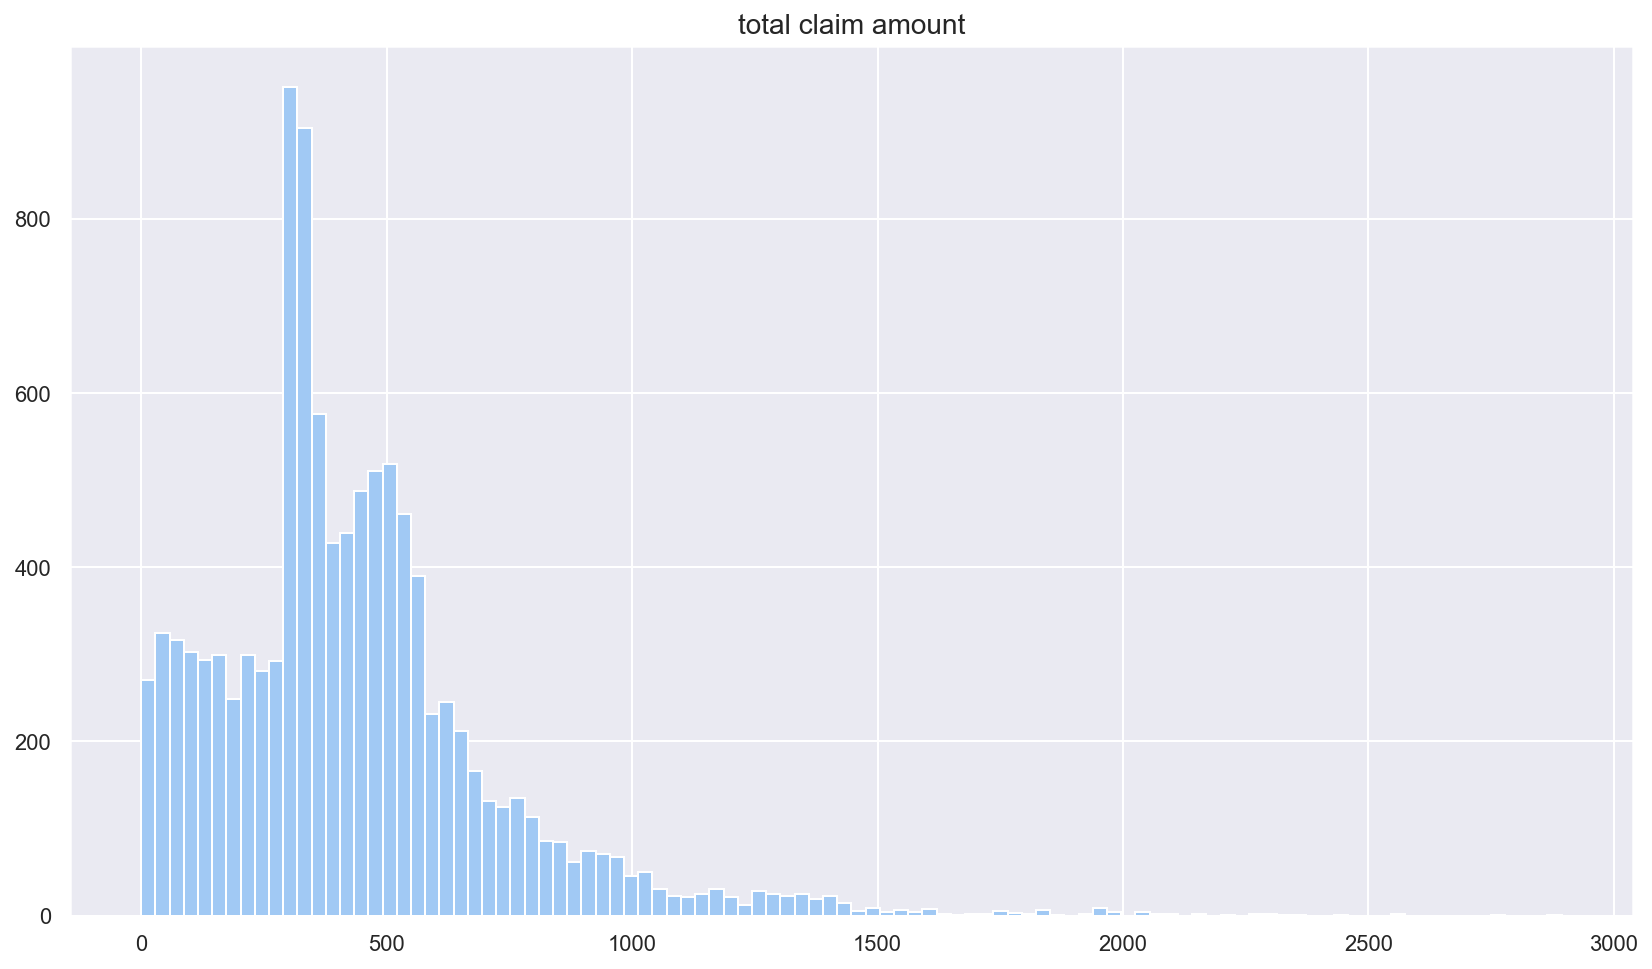

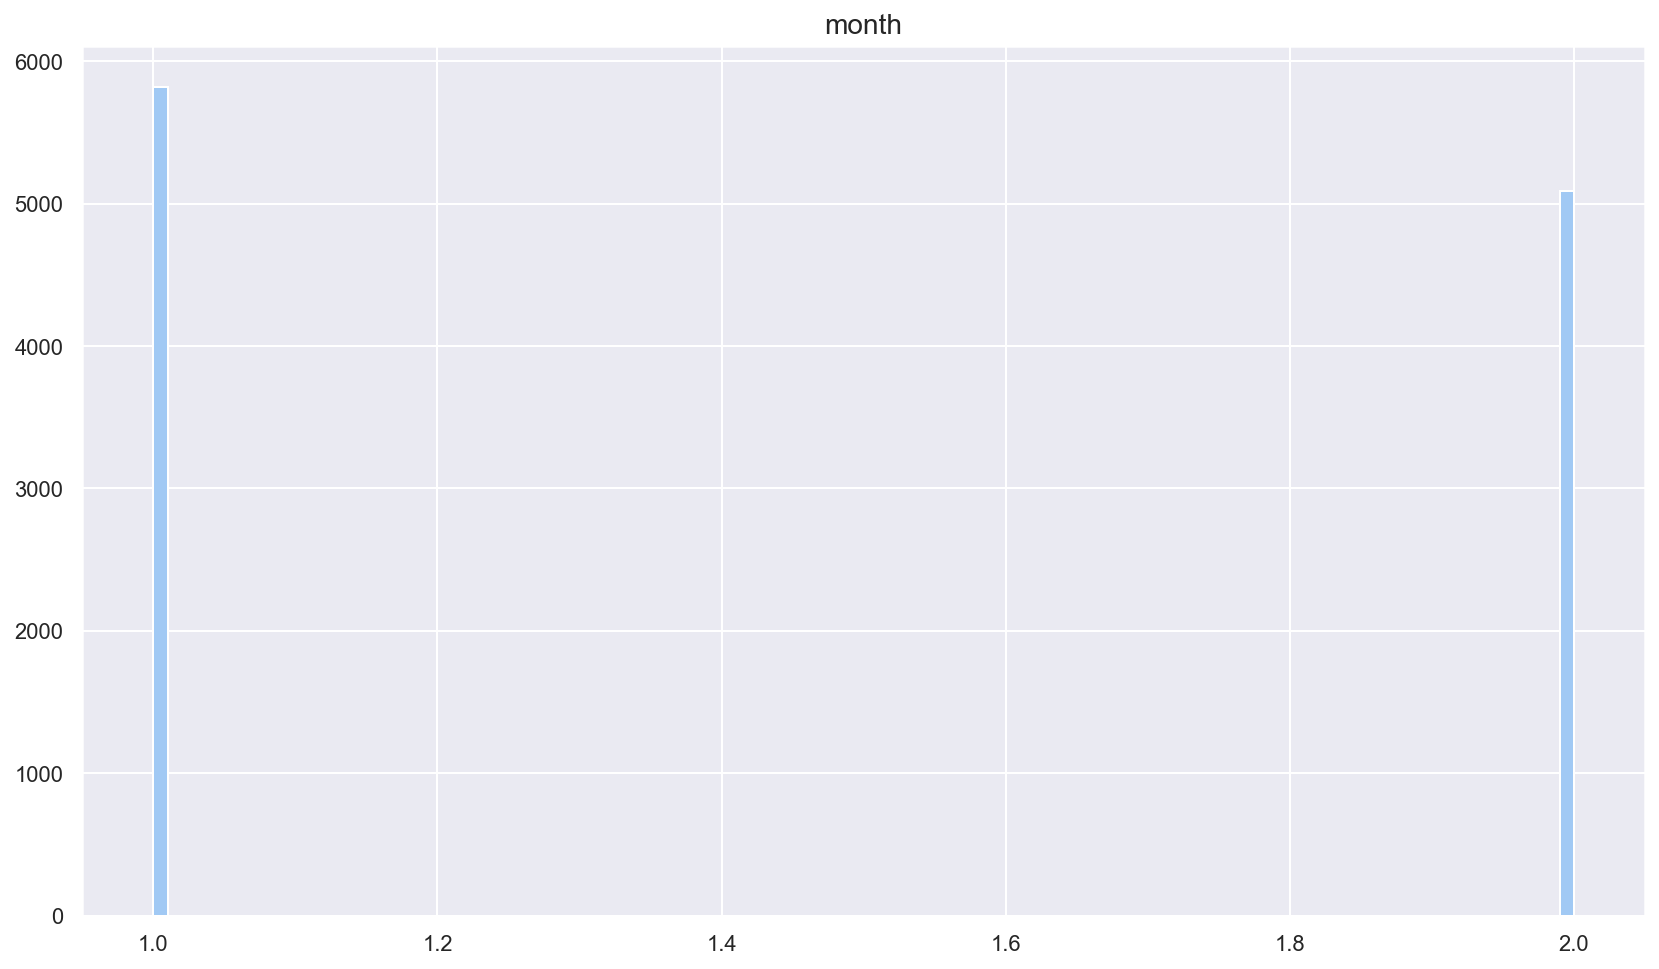

In [17]:
# Use Matplotlib to construct histograms
for col in df_num:
    plt.hist(df[col], bins=100)
    plt.title(f'{col}', fontsize=14)
    plt.show()

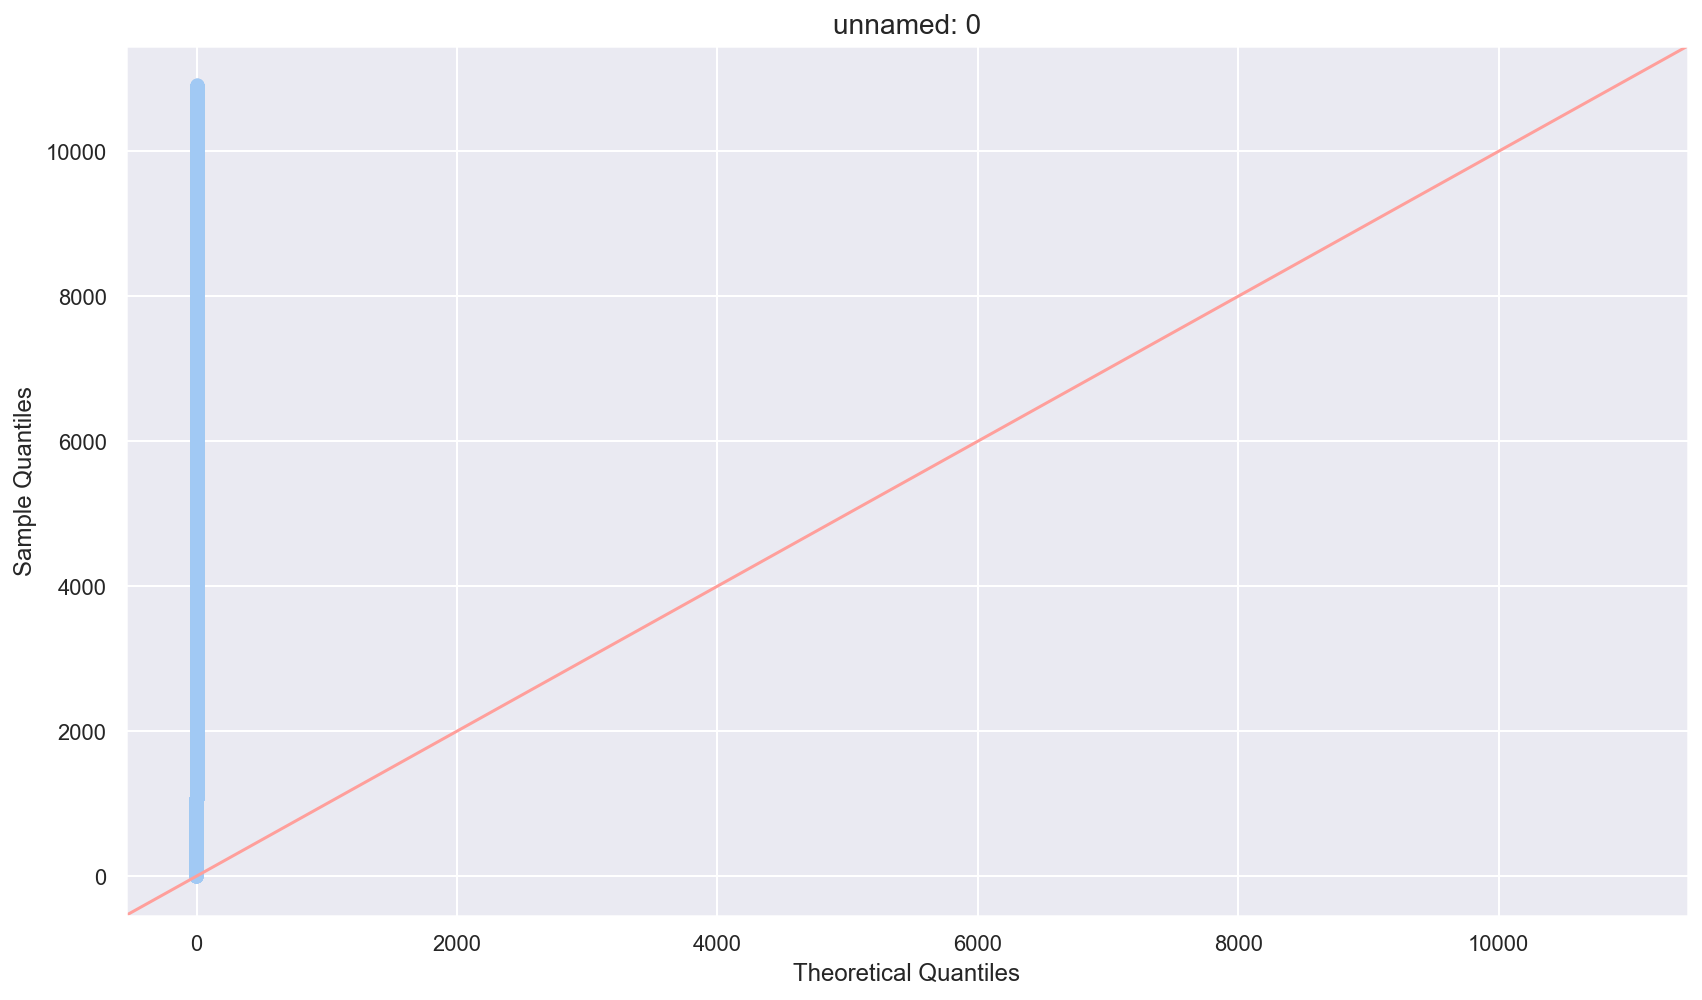

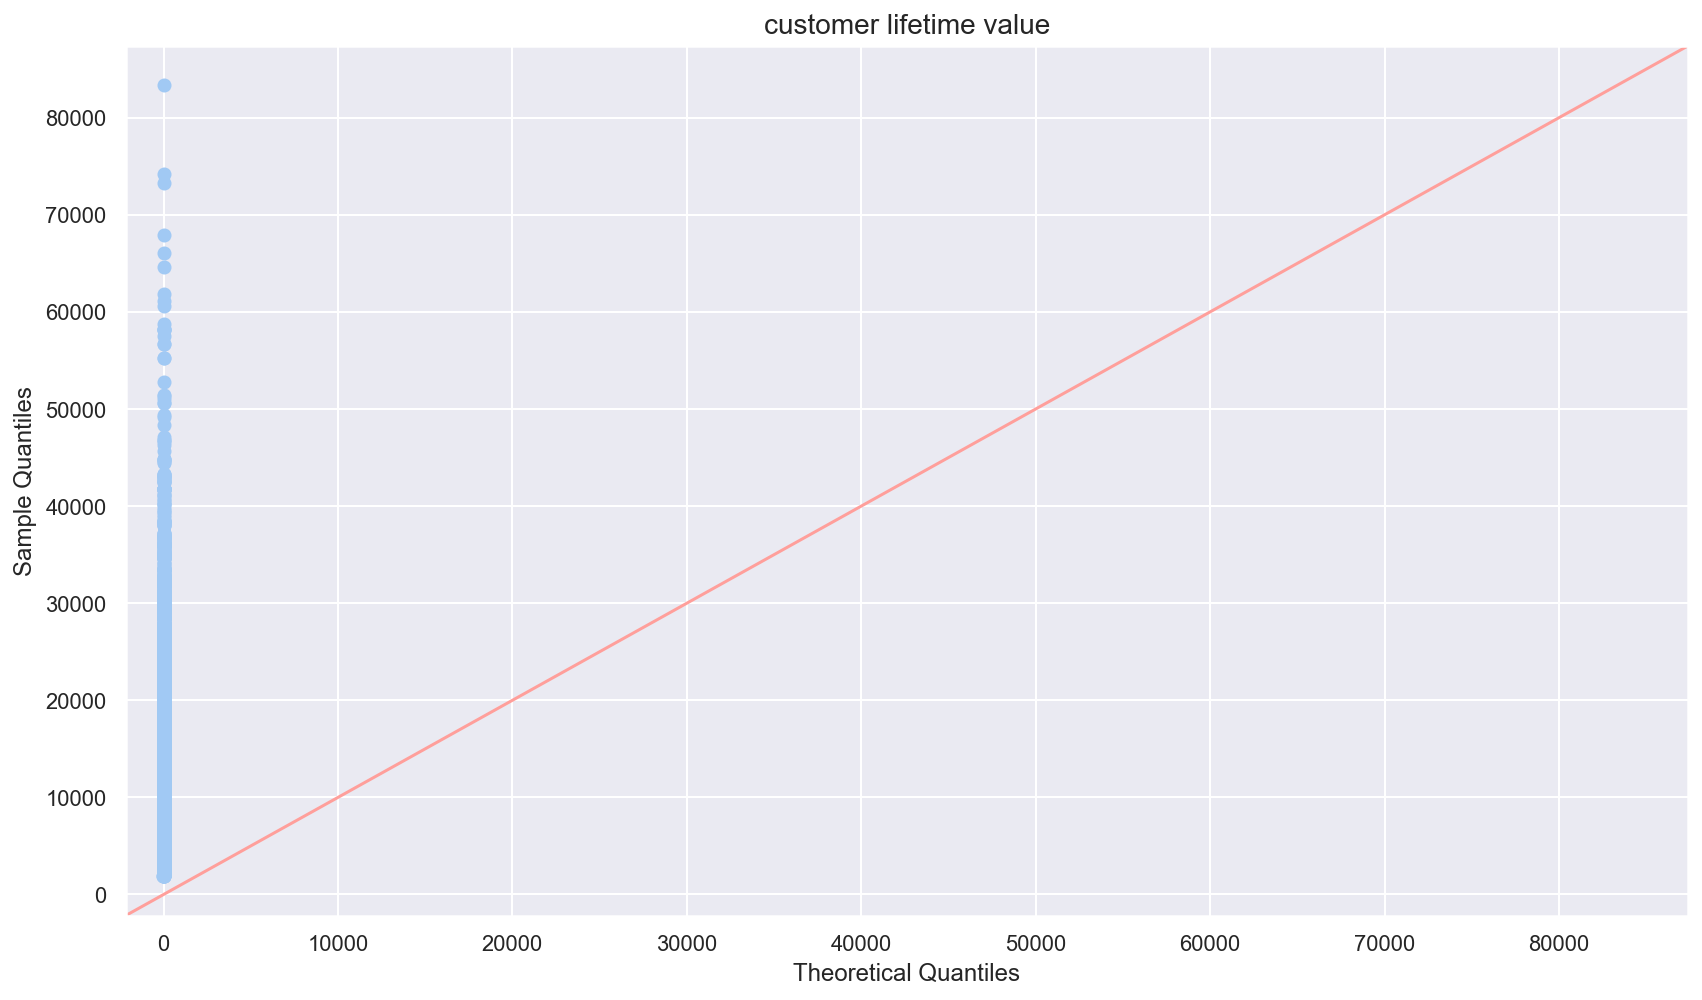

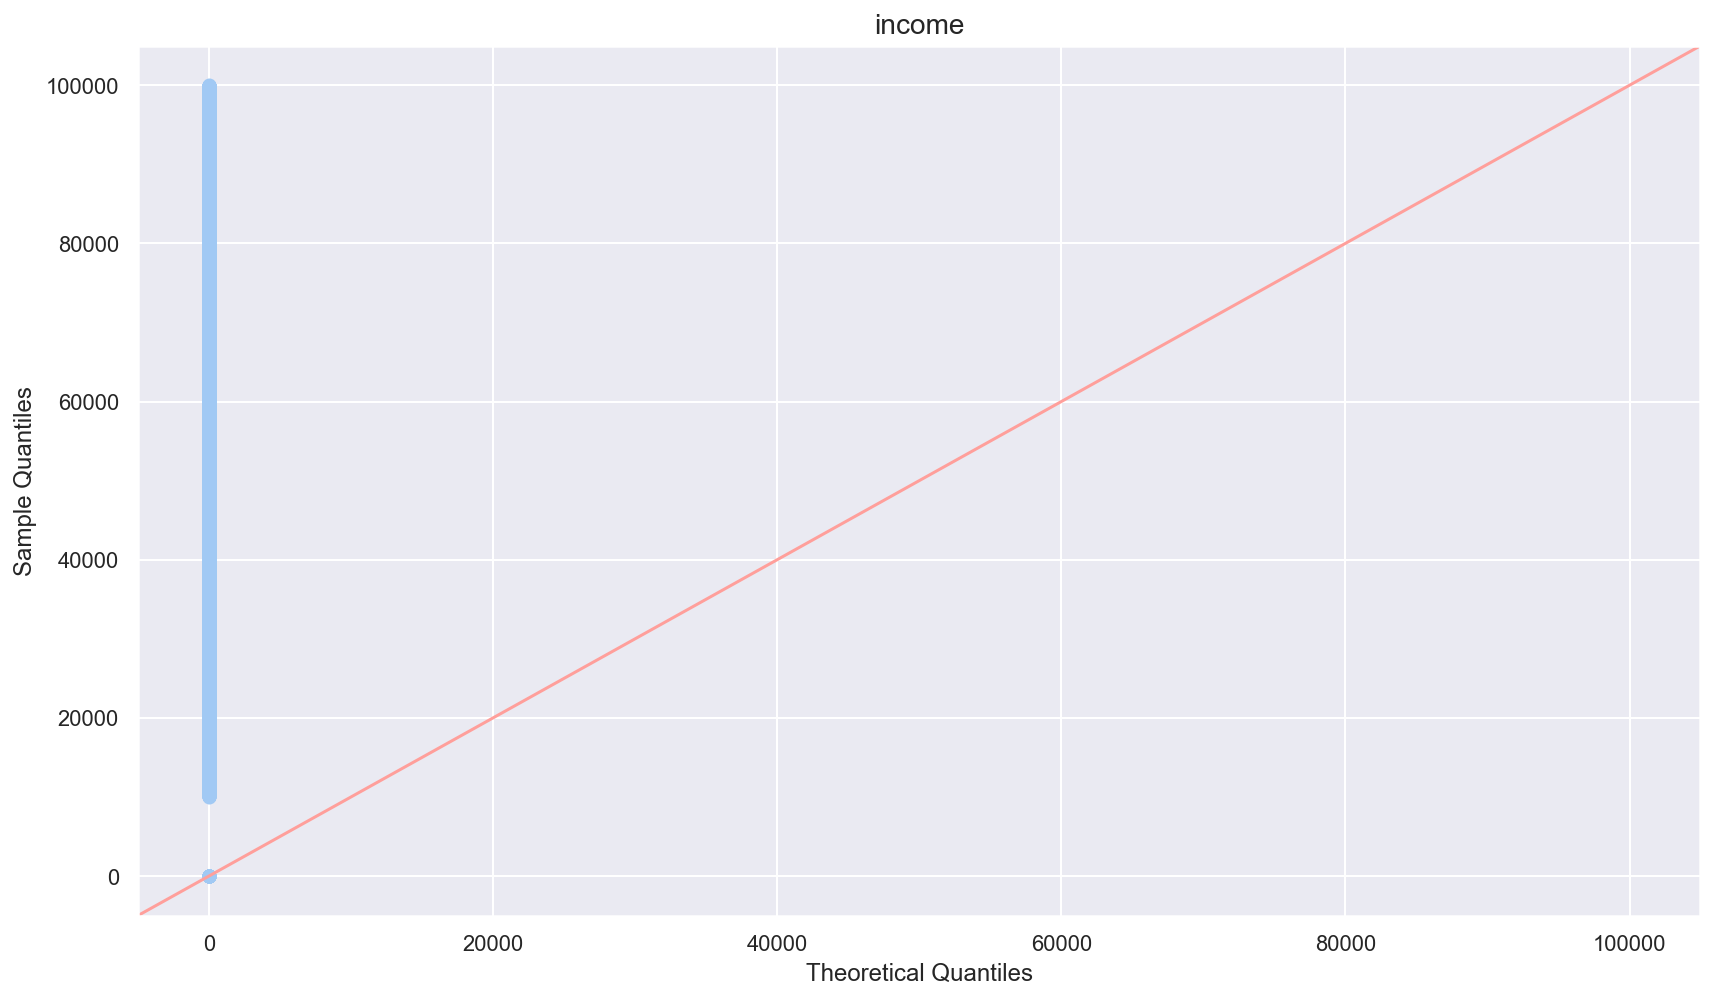

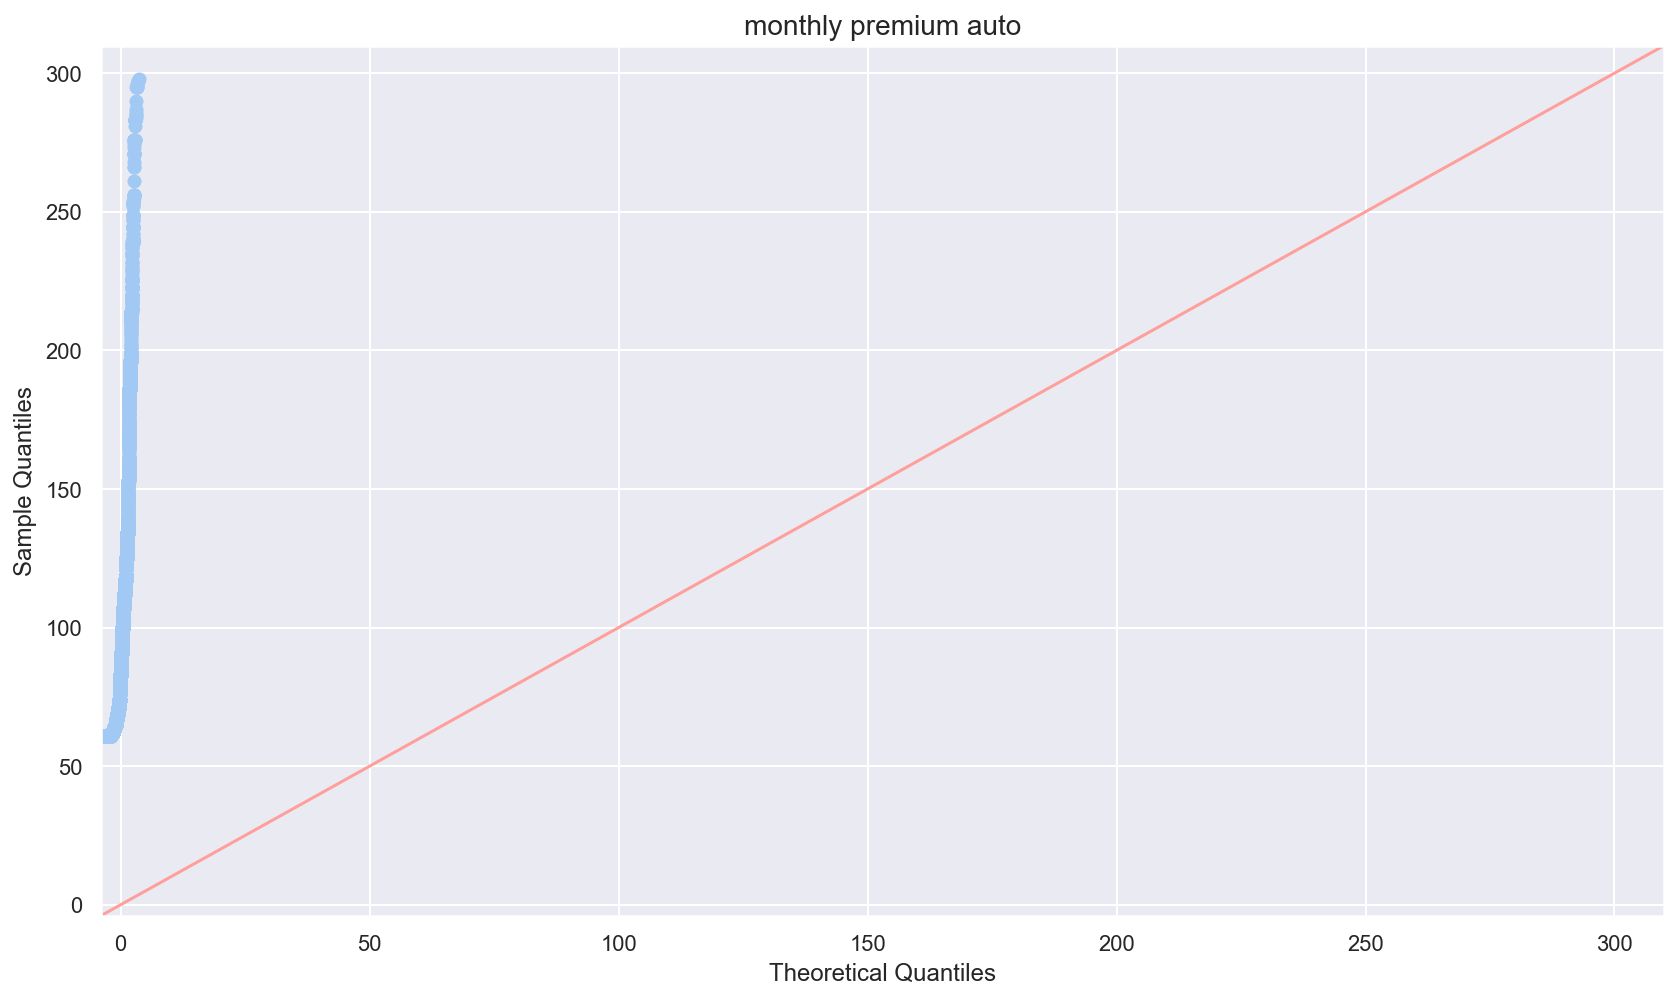

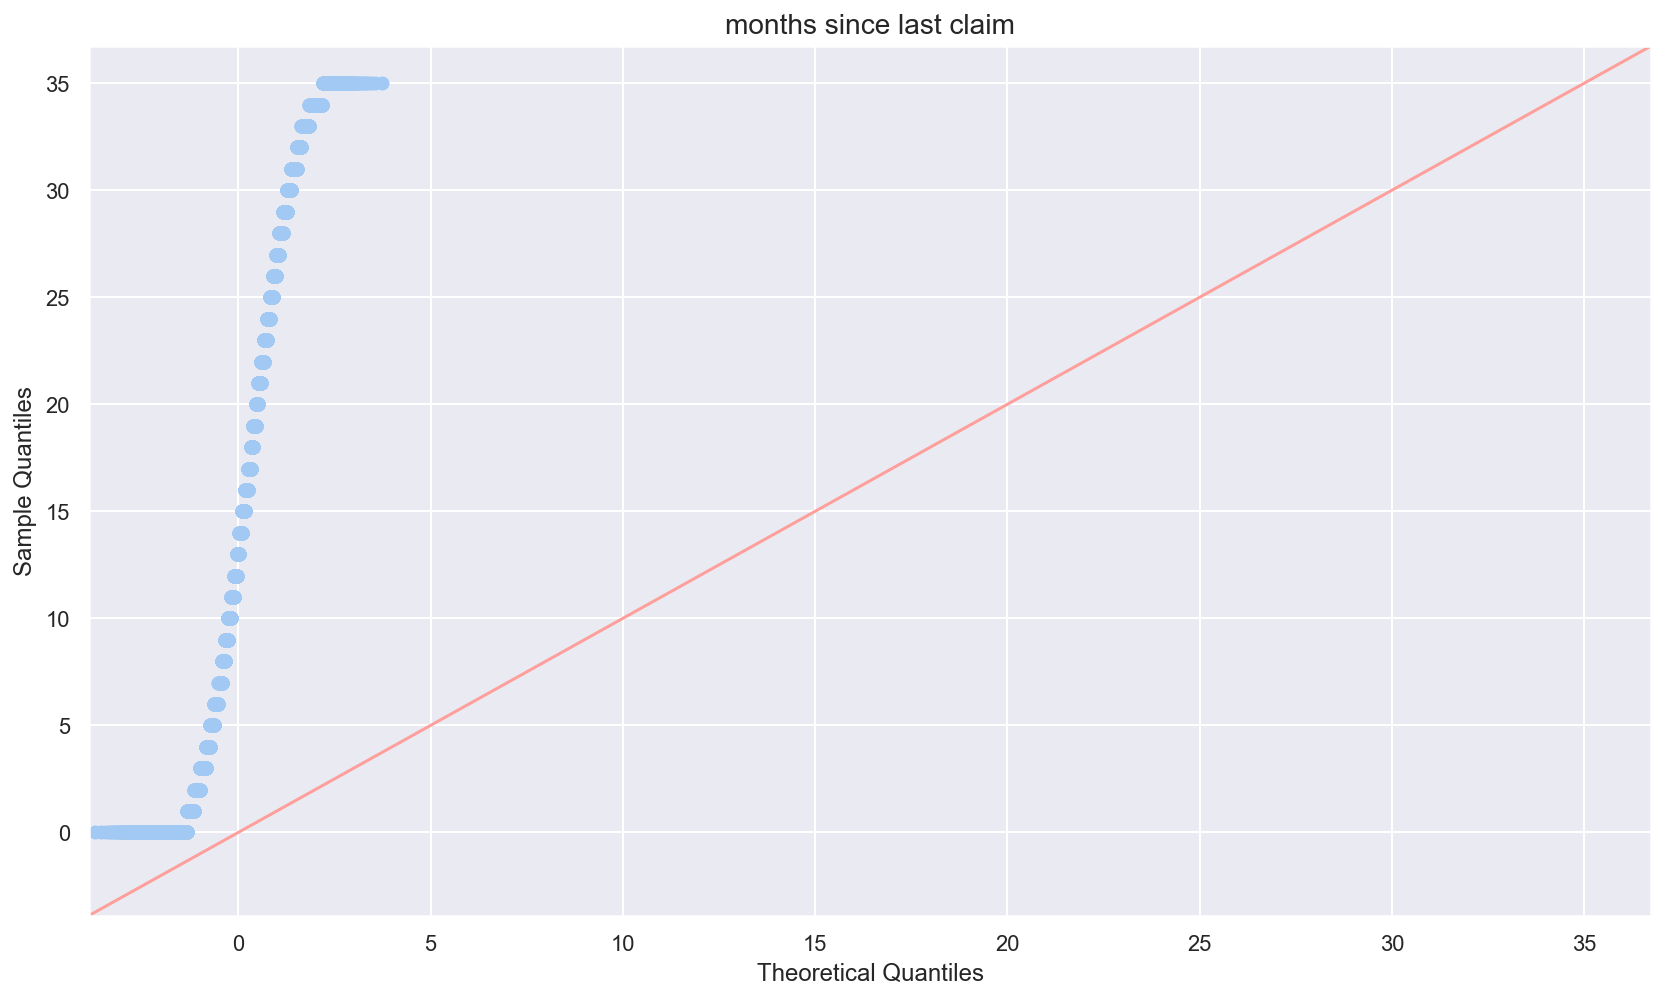

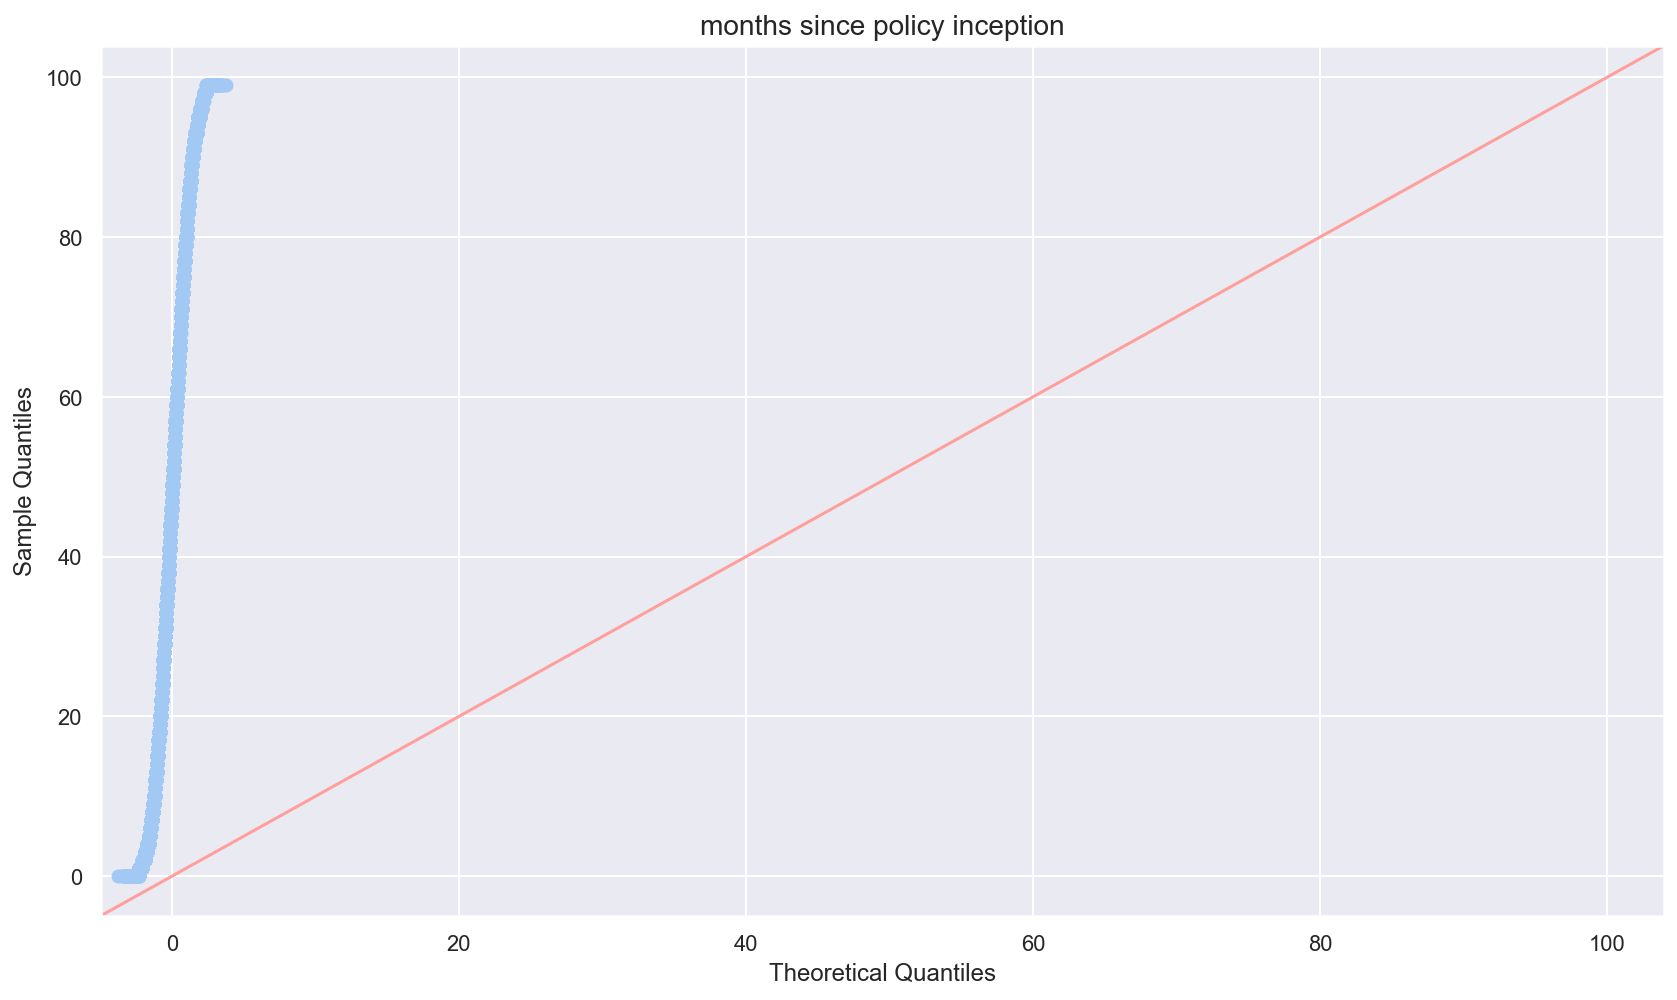

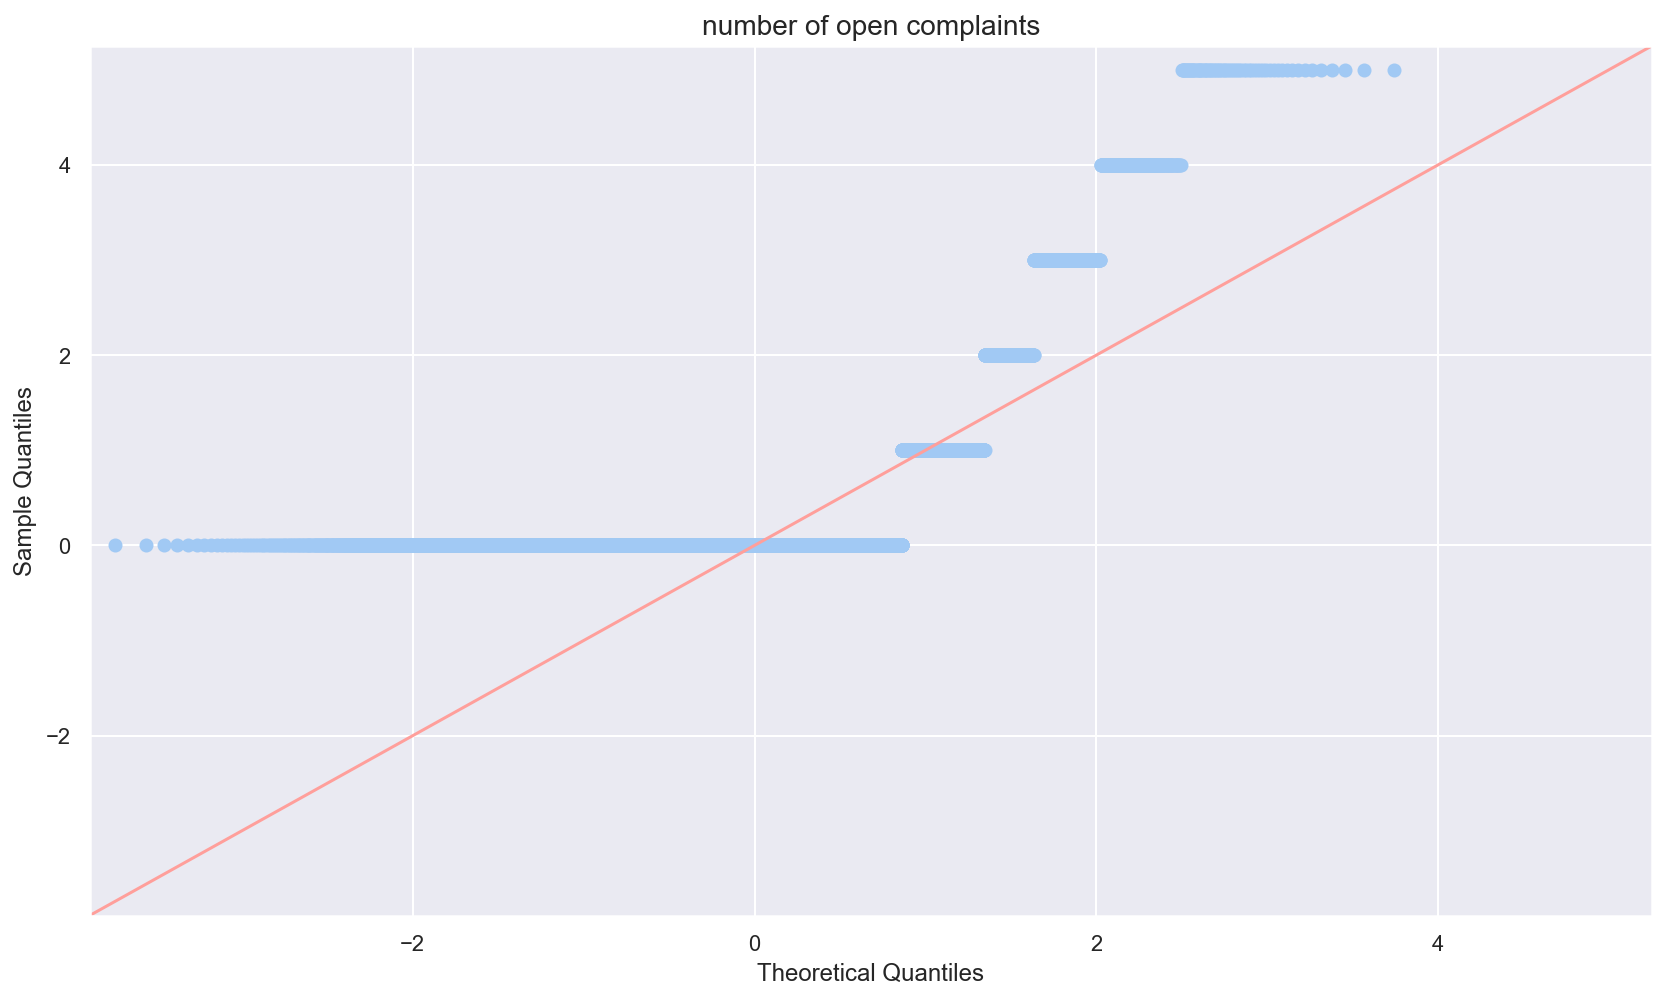

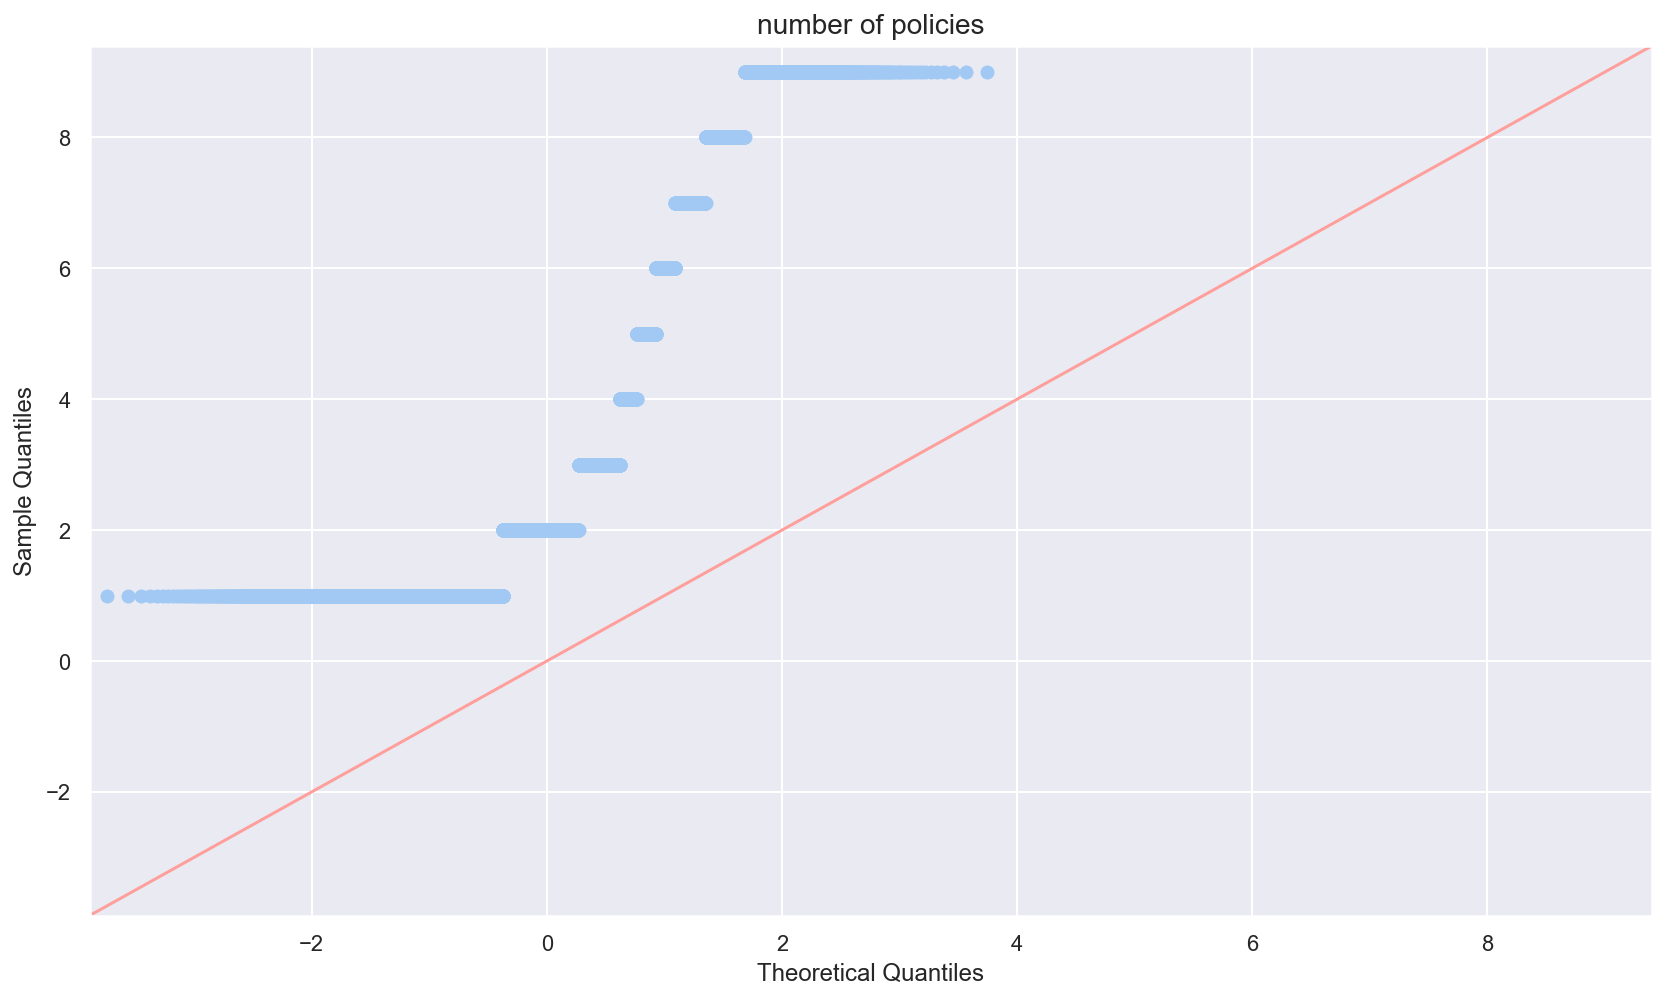

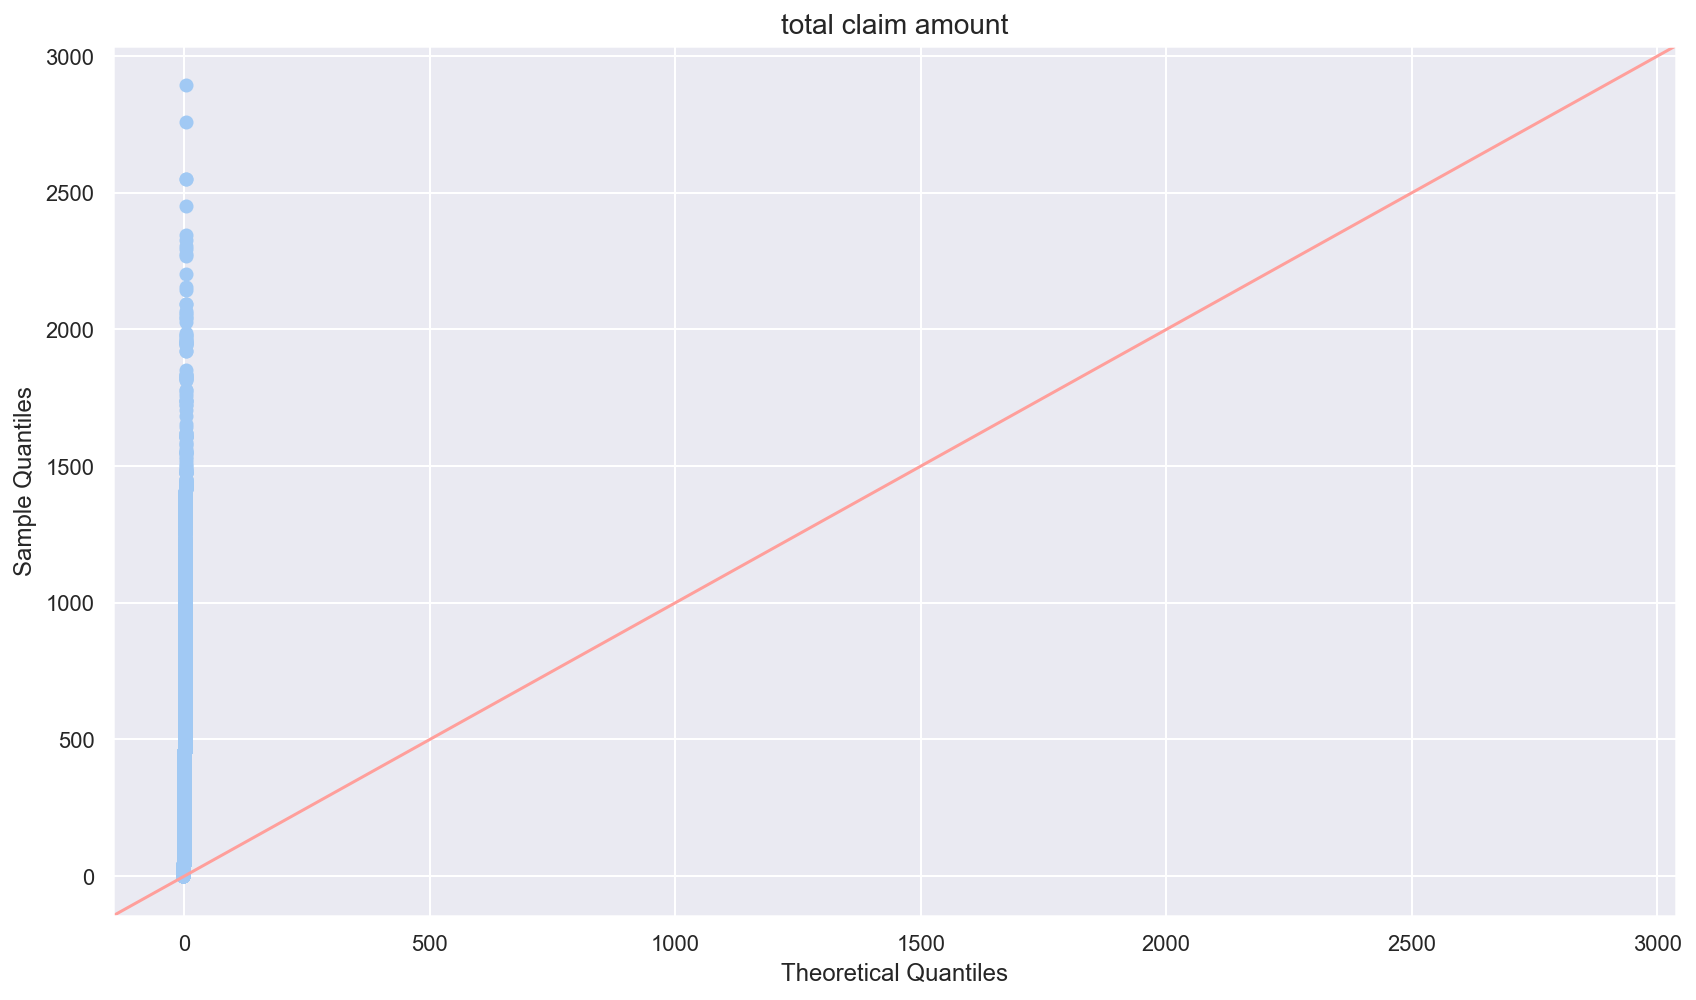

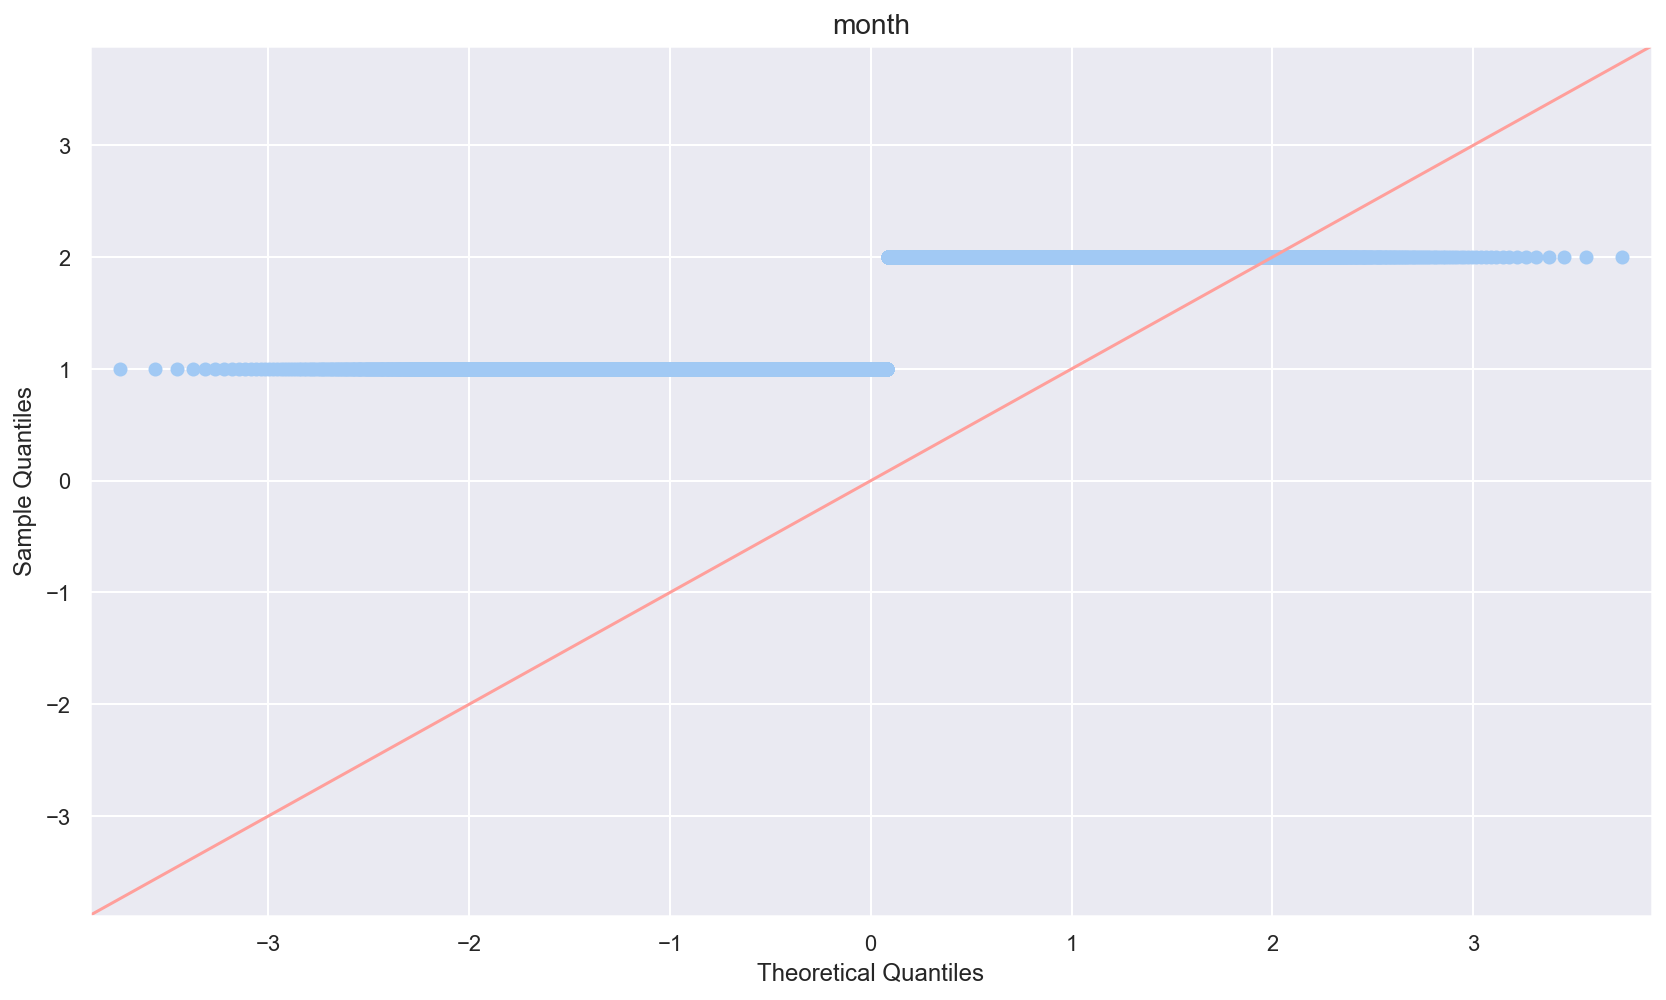

In [18]:
#For loop to plot the QQ plots of the columns
for col in df_num:
    fig = sm.qqplot(df[col], line='45')
    plt.title(f'{col}', fontsize=14)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


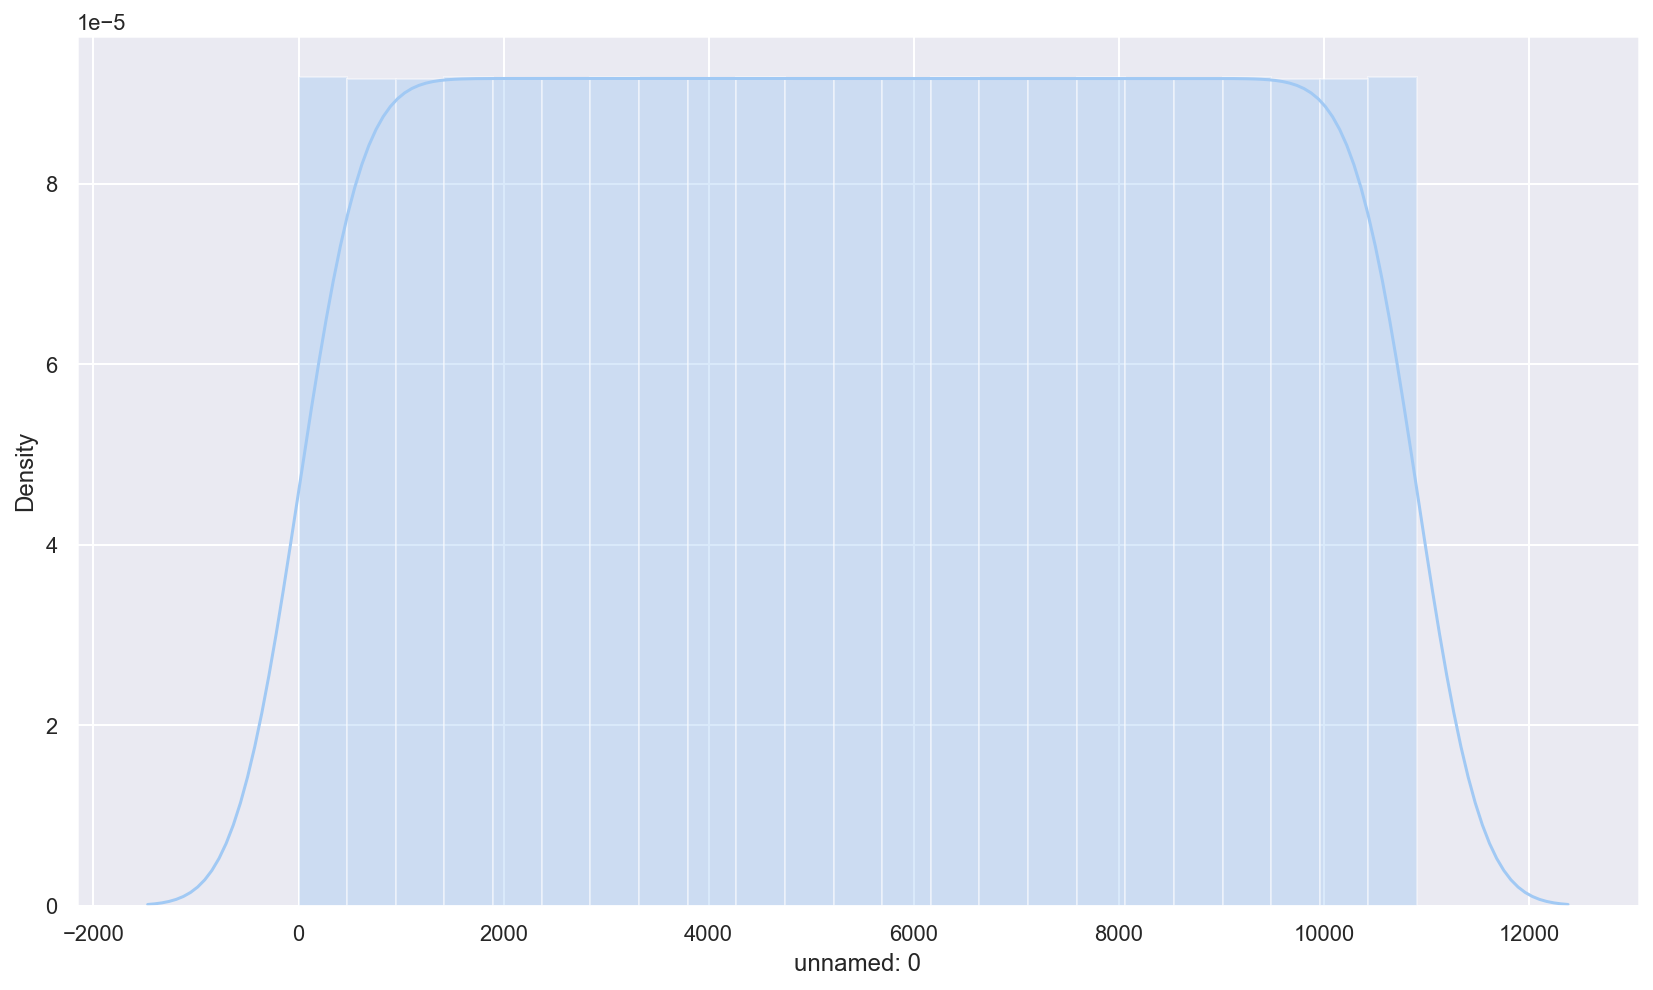

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


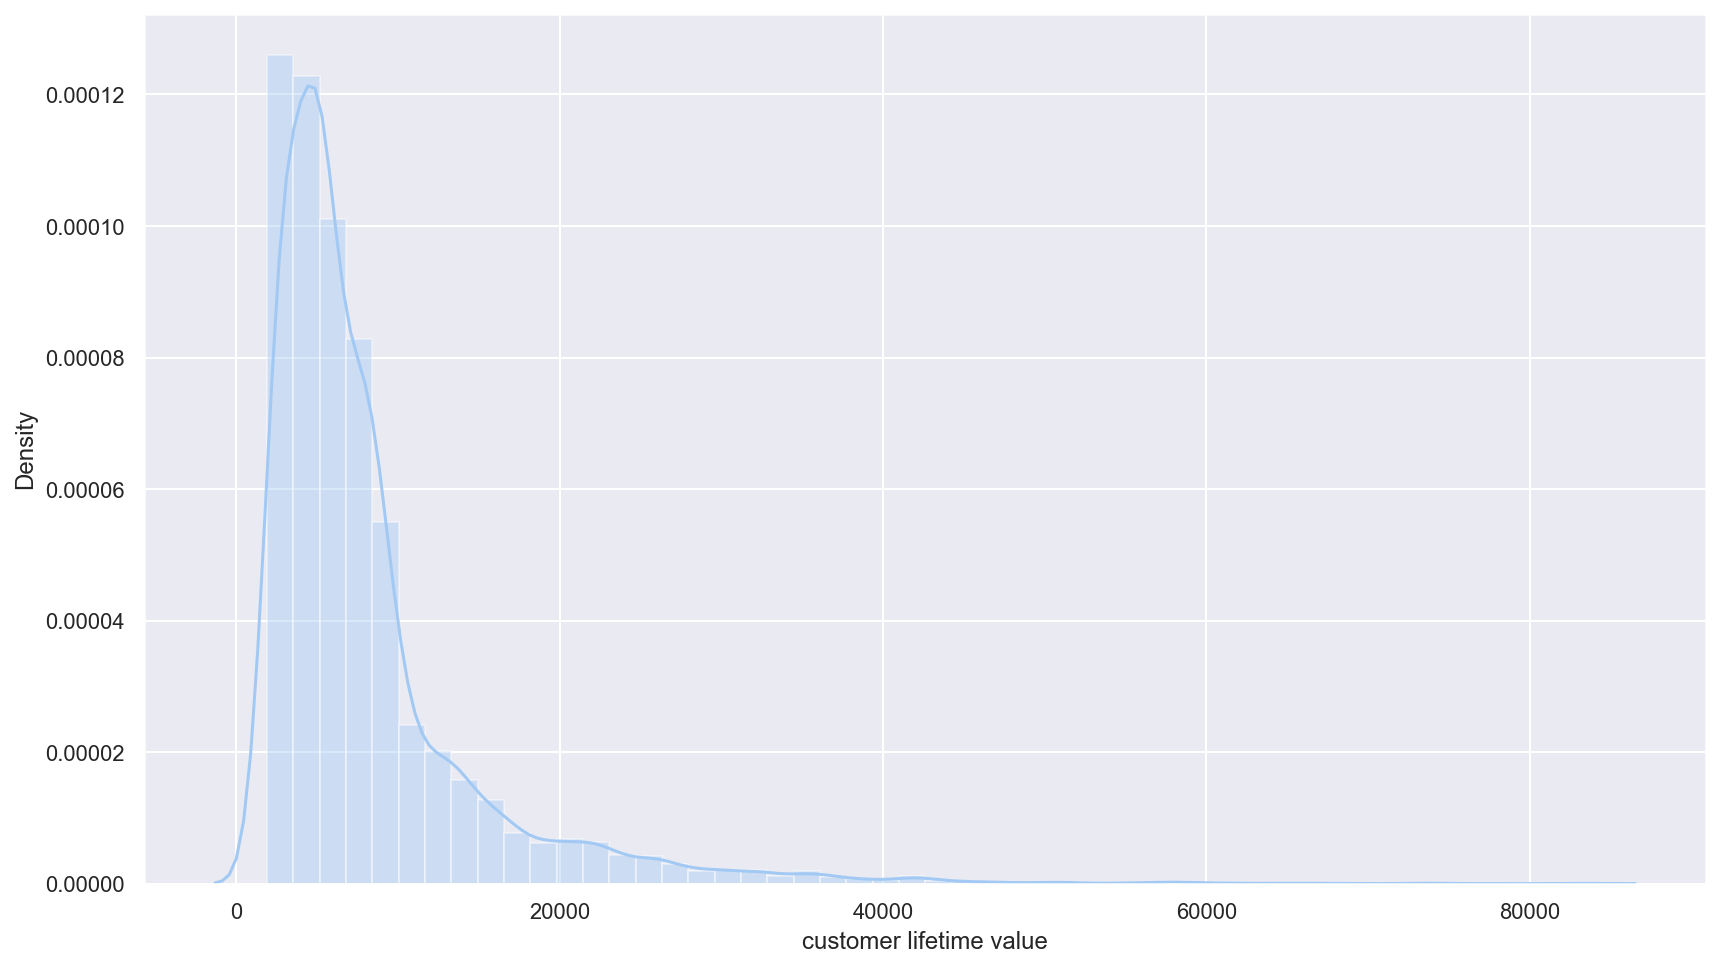

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


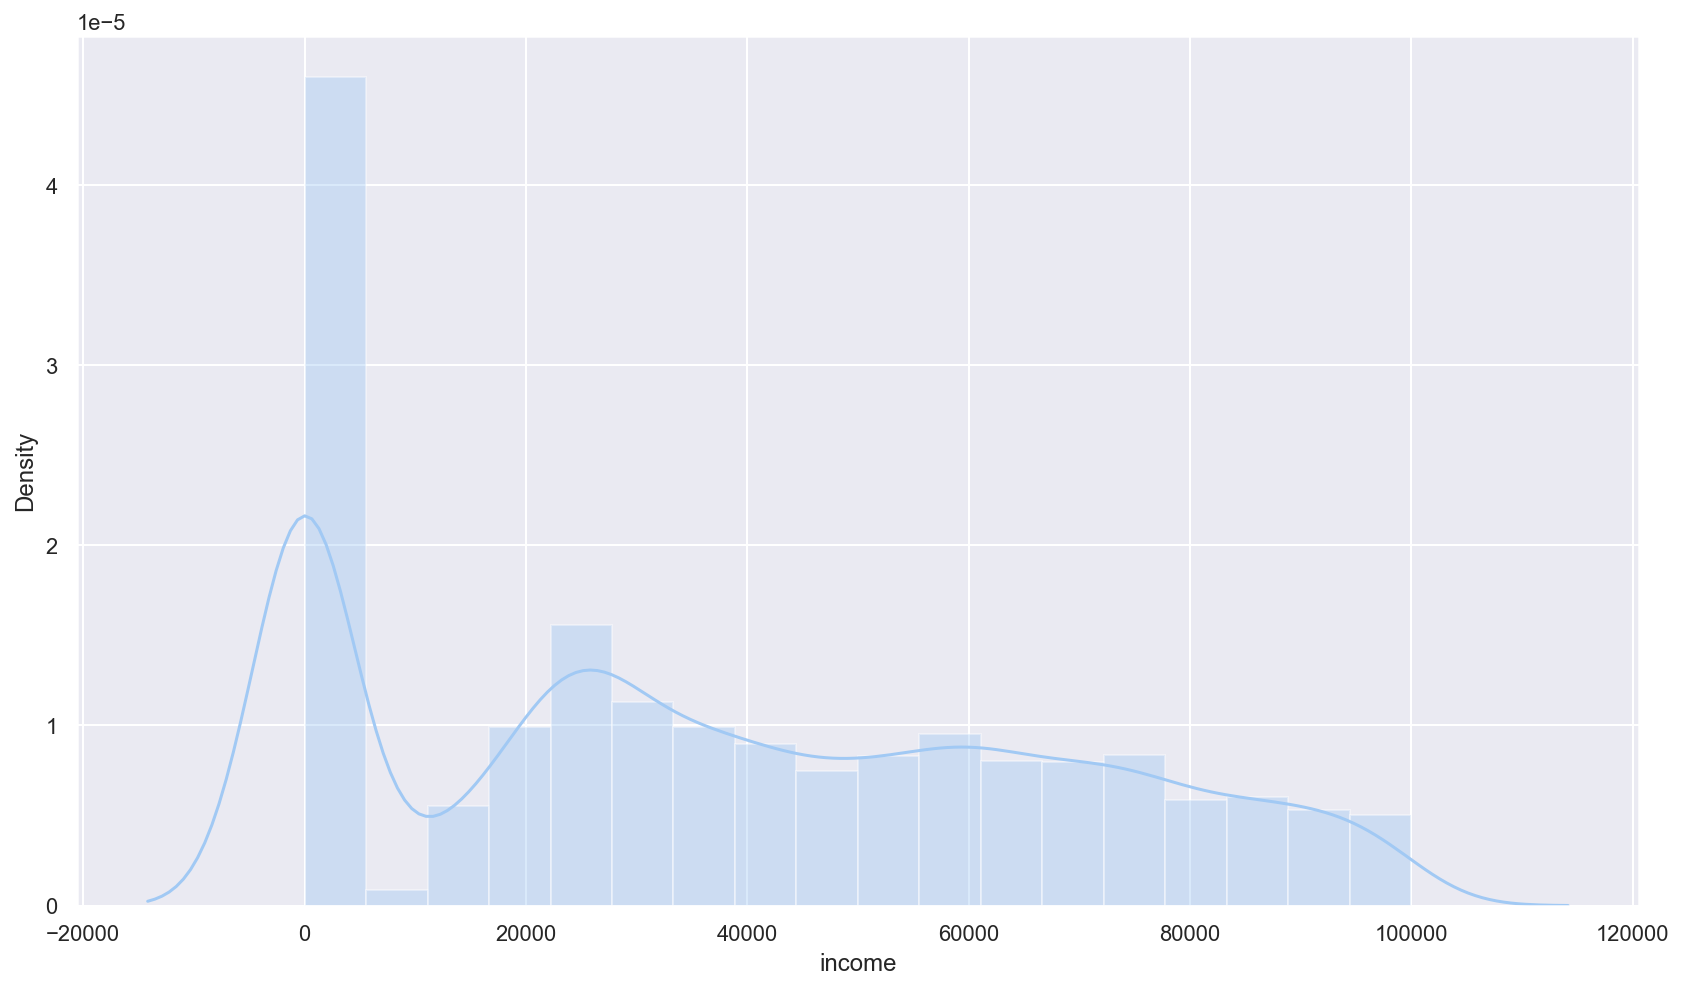

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


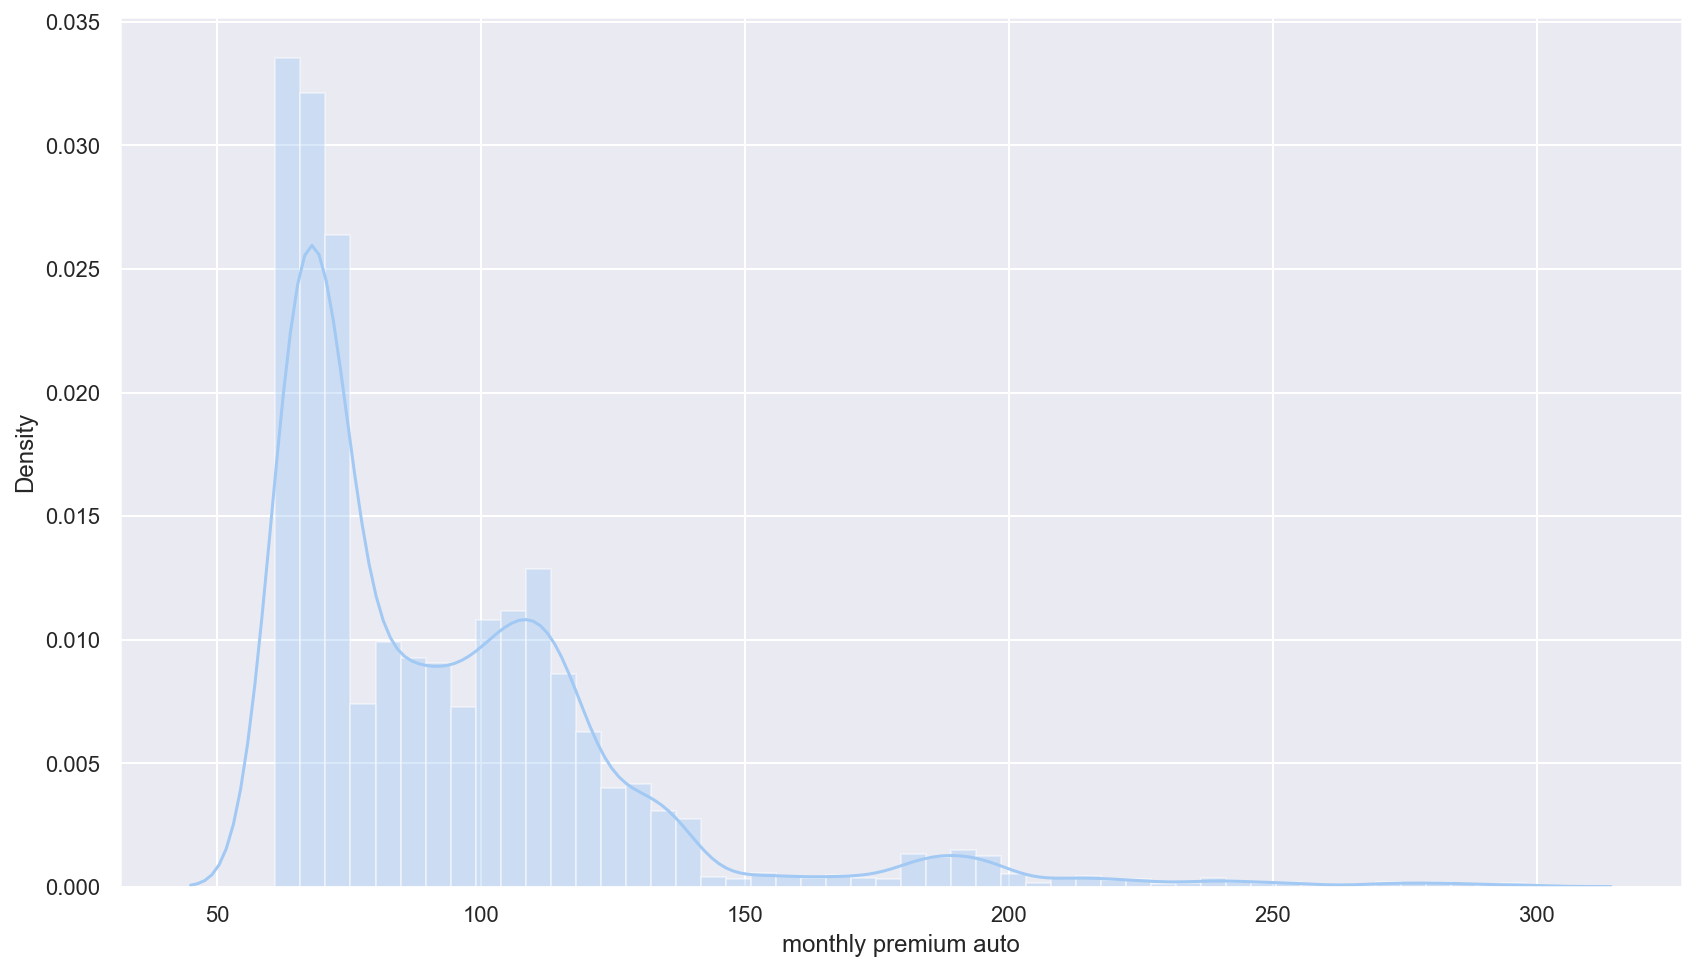

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


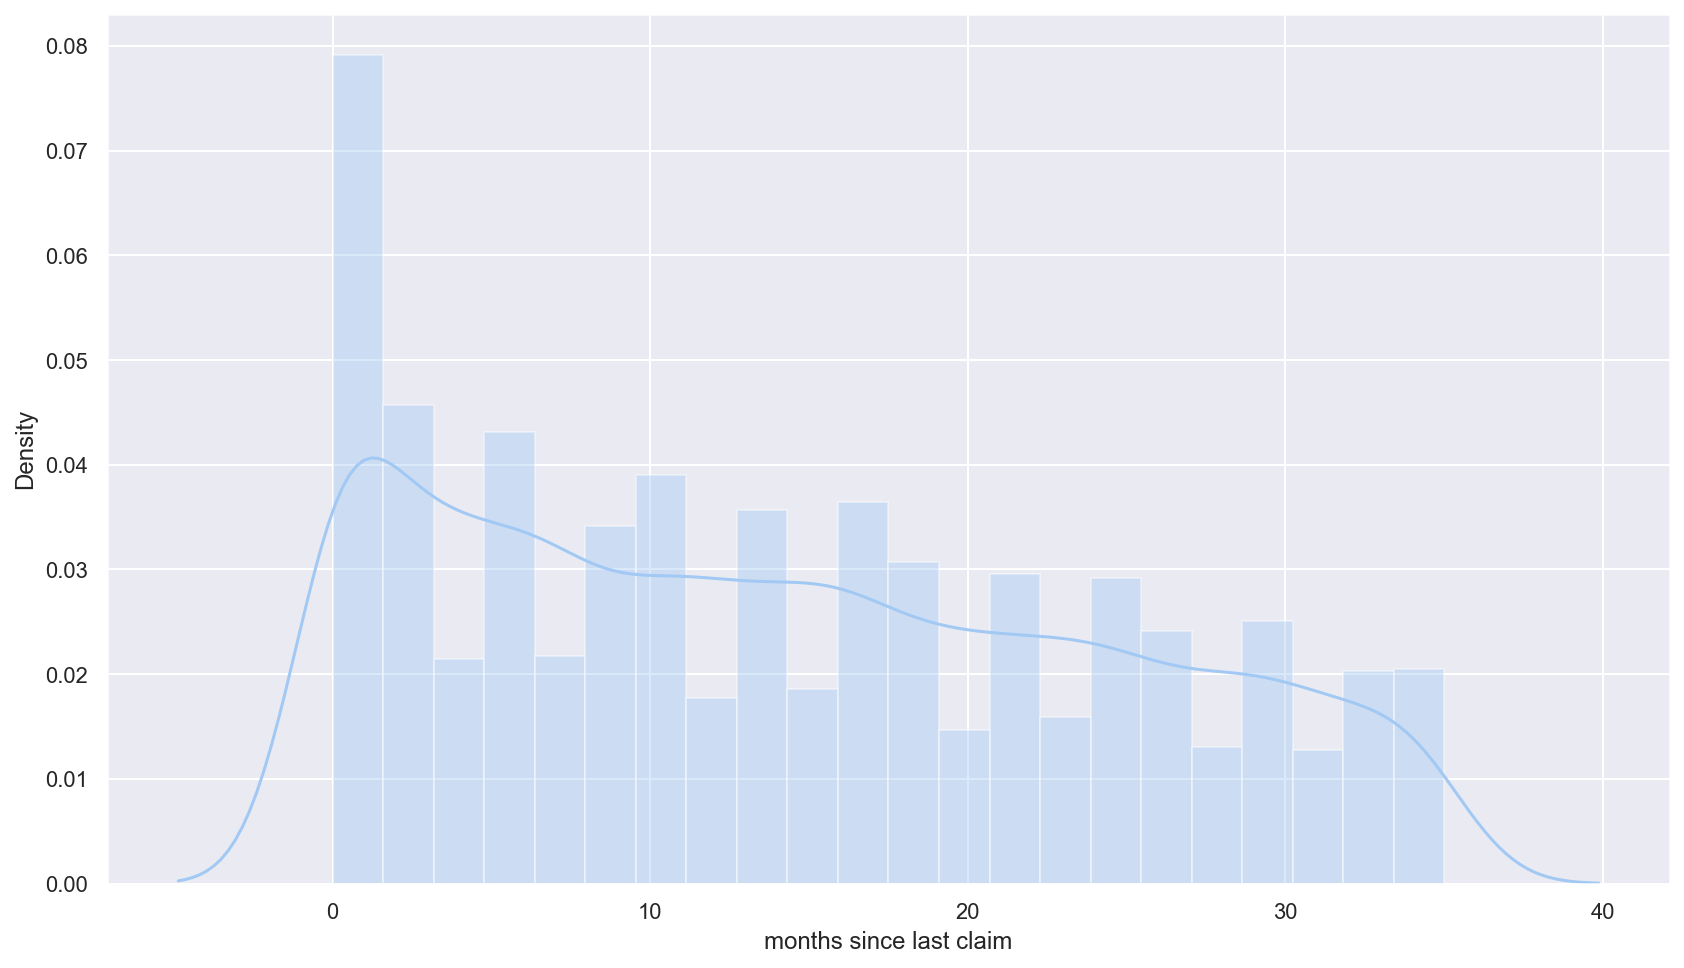

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


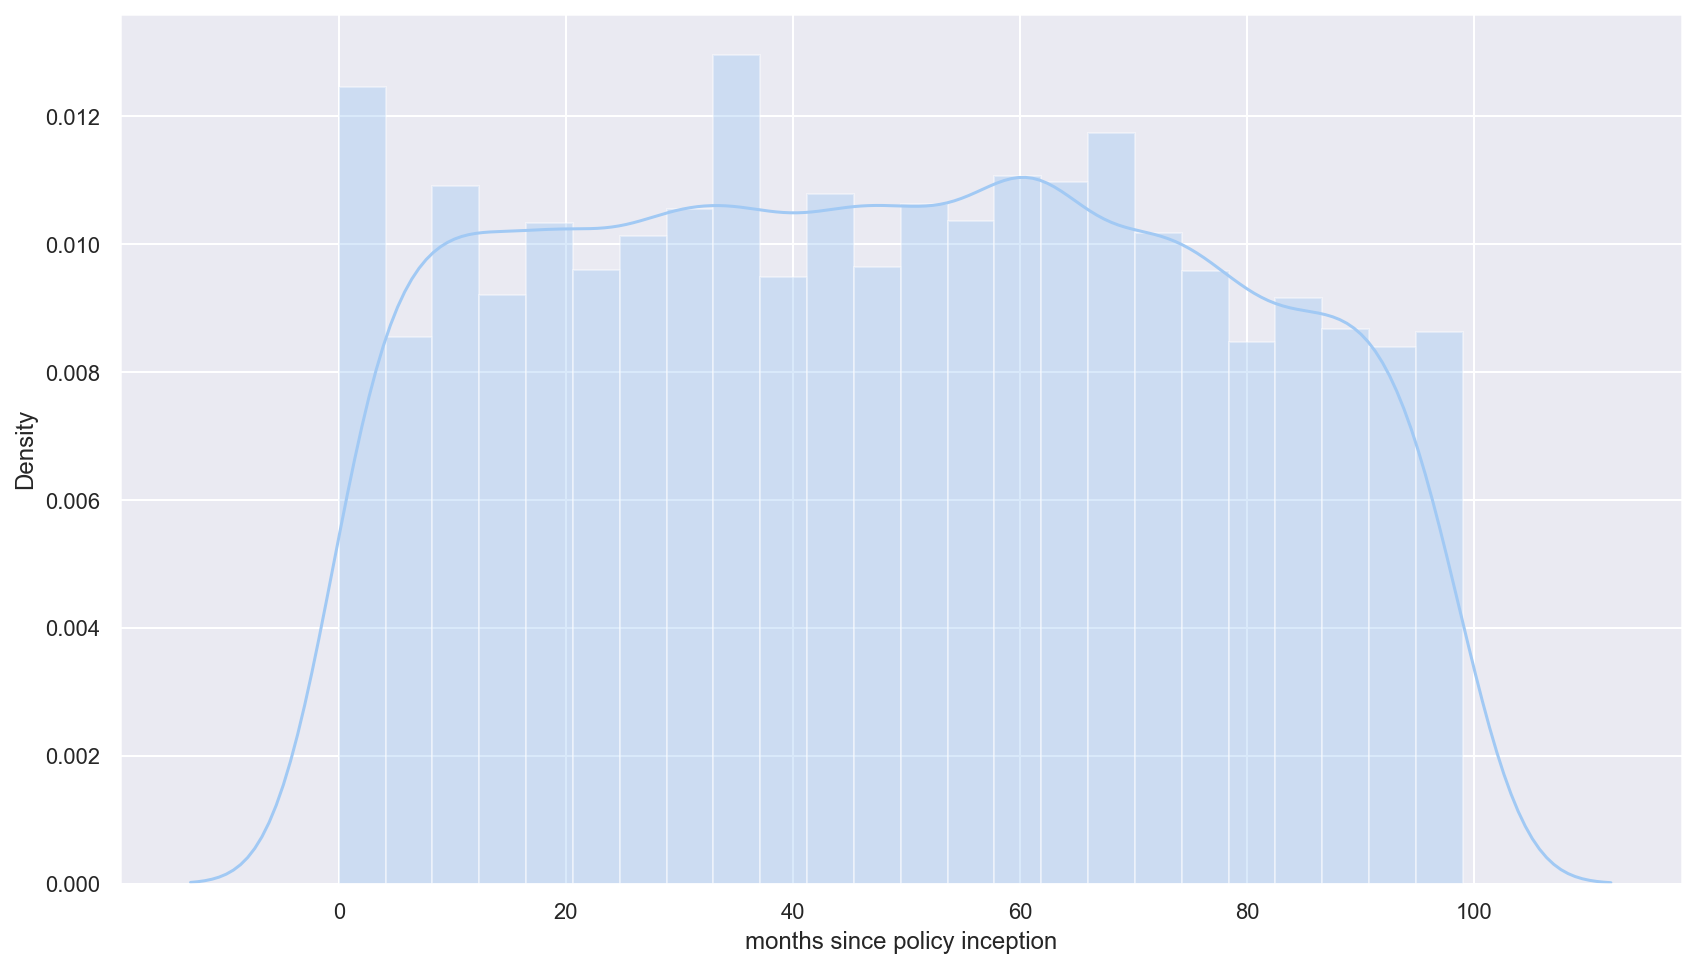

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


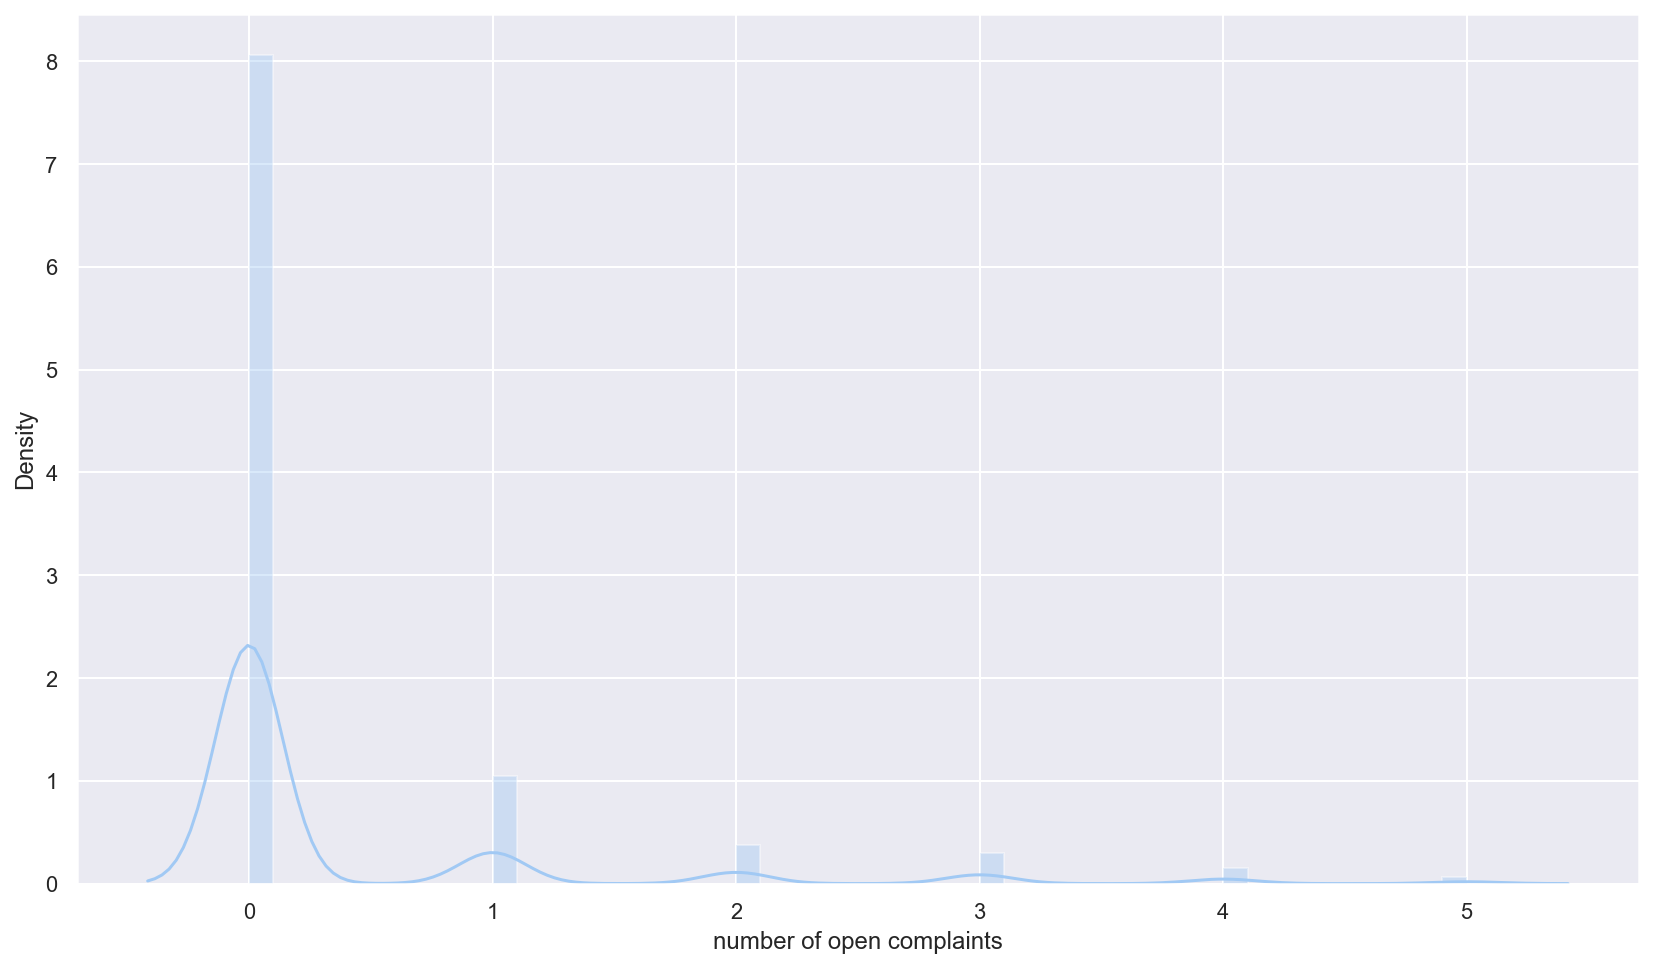

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


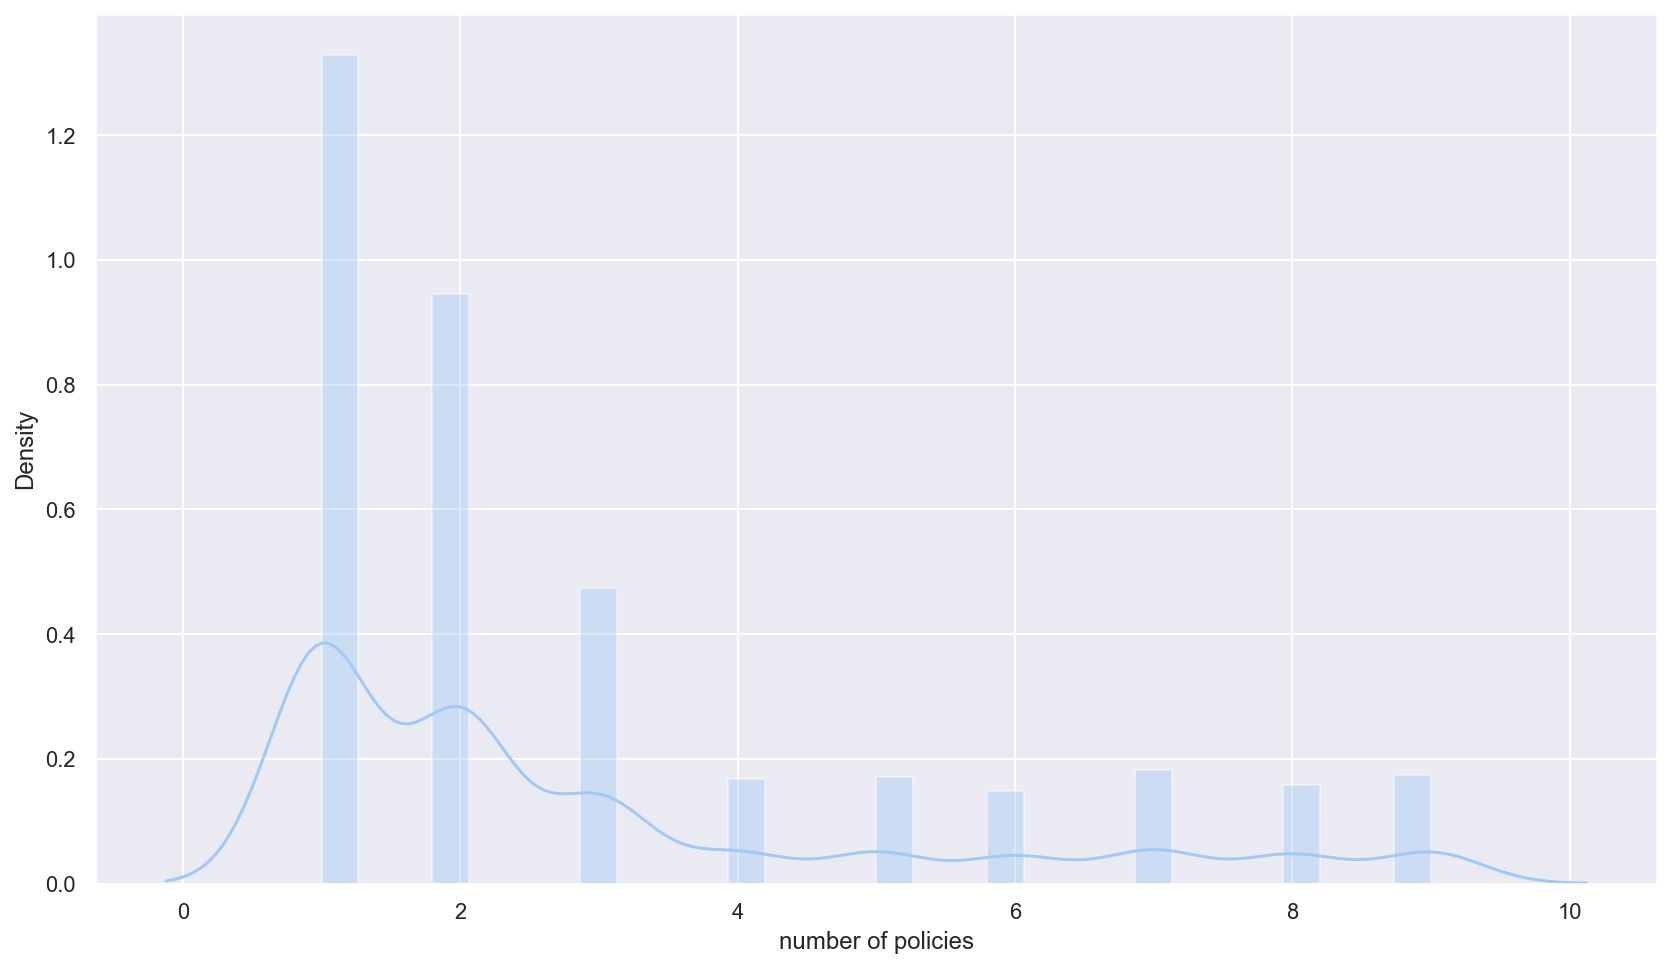

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


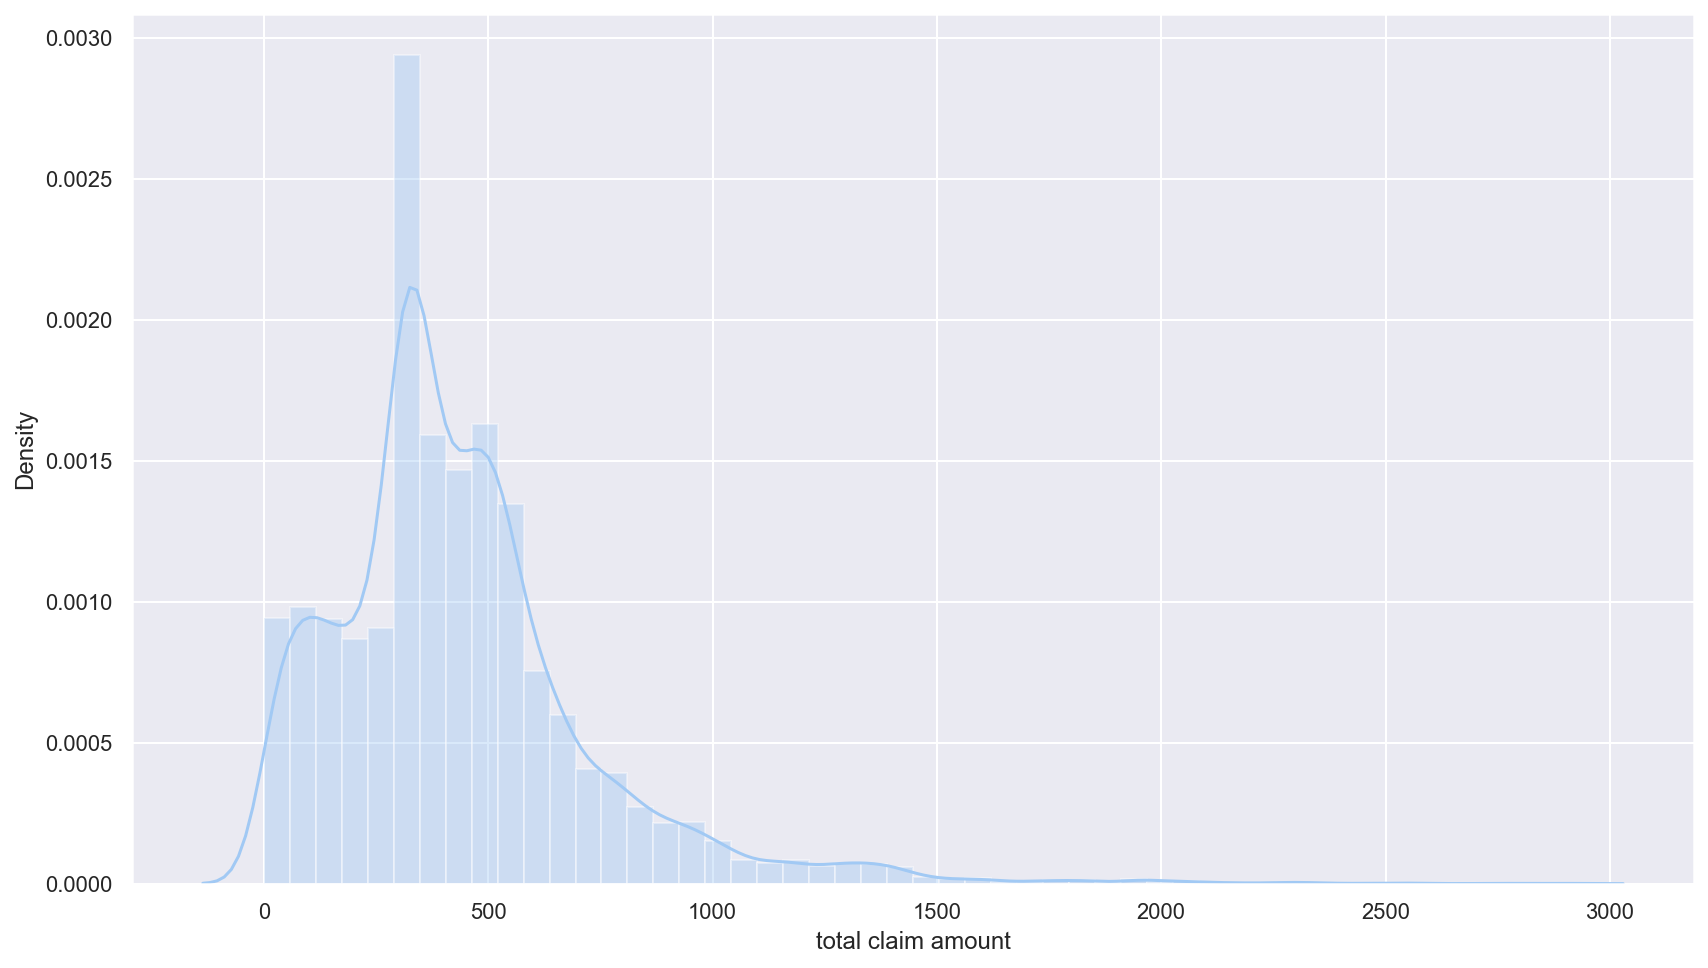

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


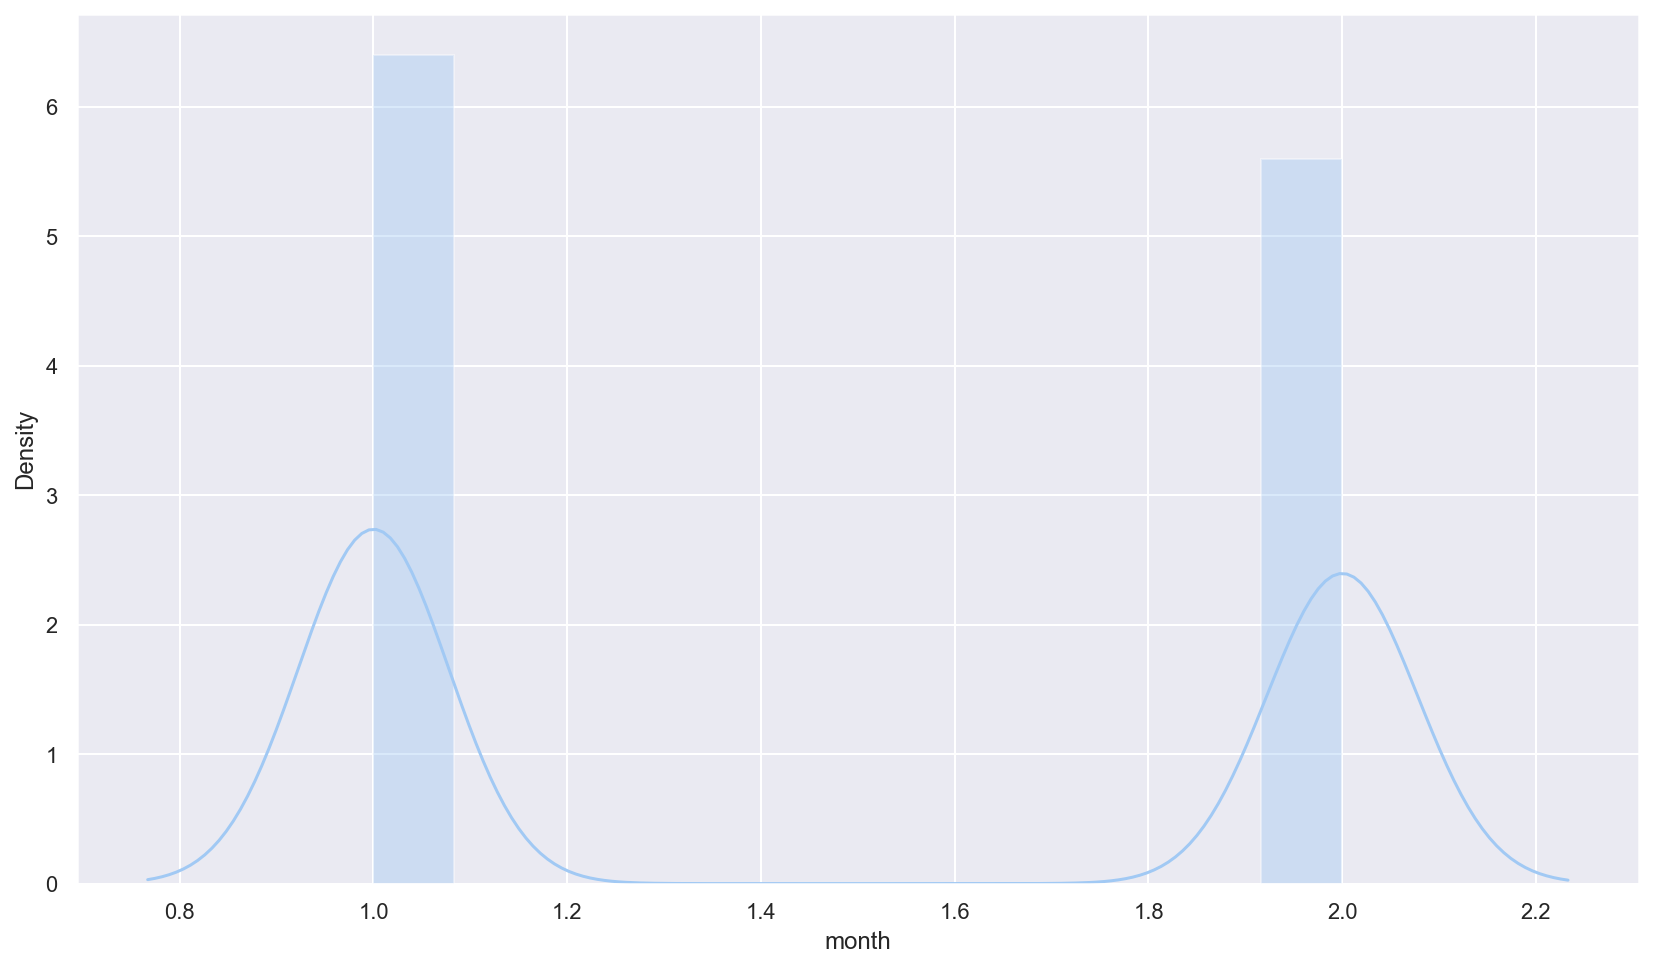

In [19]:
#For loop to plot the Distribution plots of the columns
for col in df_num:
    sns.distplot(df[col])
    plt.show()

In [20]:
# Function to convert x to log(10)
def log_transfom_clean1(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0
# Function to convert columns to log(10)
def covert_columns_log(df_num):
    """This function will iterate over the columns to covert all numerical variables to log(10) values"""
    #Copy Data before Transformations
    df_num_log = df_num.copy()
    for col in df_num_log.columns:
        df_num_log[col+'_log'] = df_num_log[col].apply(lambda x : log_transfom_clean1(x))
    #Sort Columns in alphetical order    
    df_num_log = df_num_log.reindex(sorted(df_num_log.columns), axis=1)
    return df_num_log
 
#Create a new DataFrame with new columns with logaritic values
df_num_log = covert_columns_log(df_num)

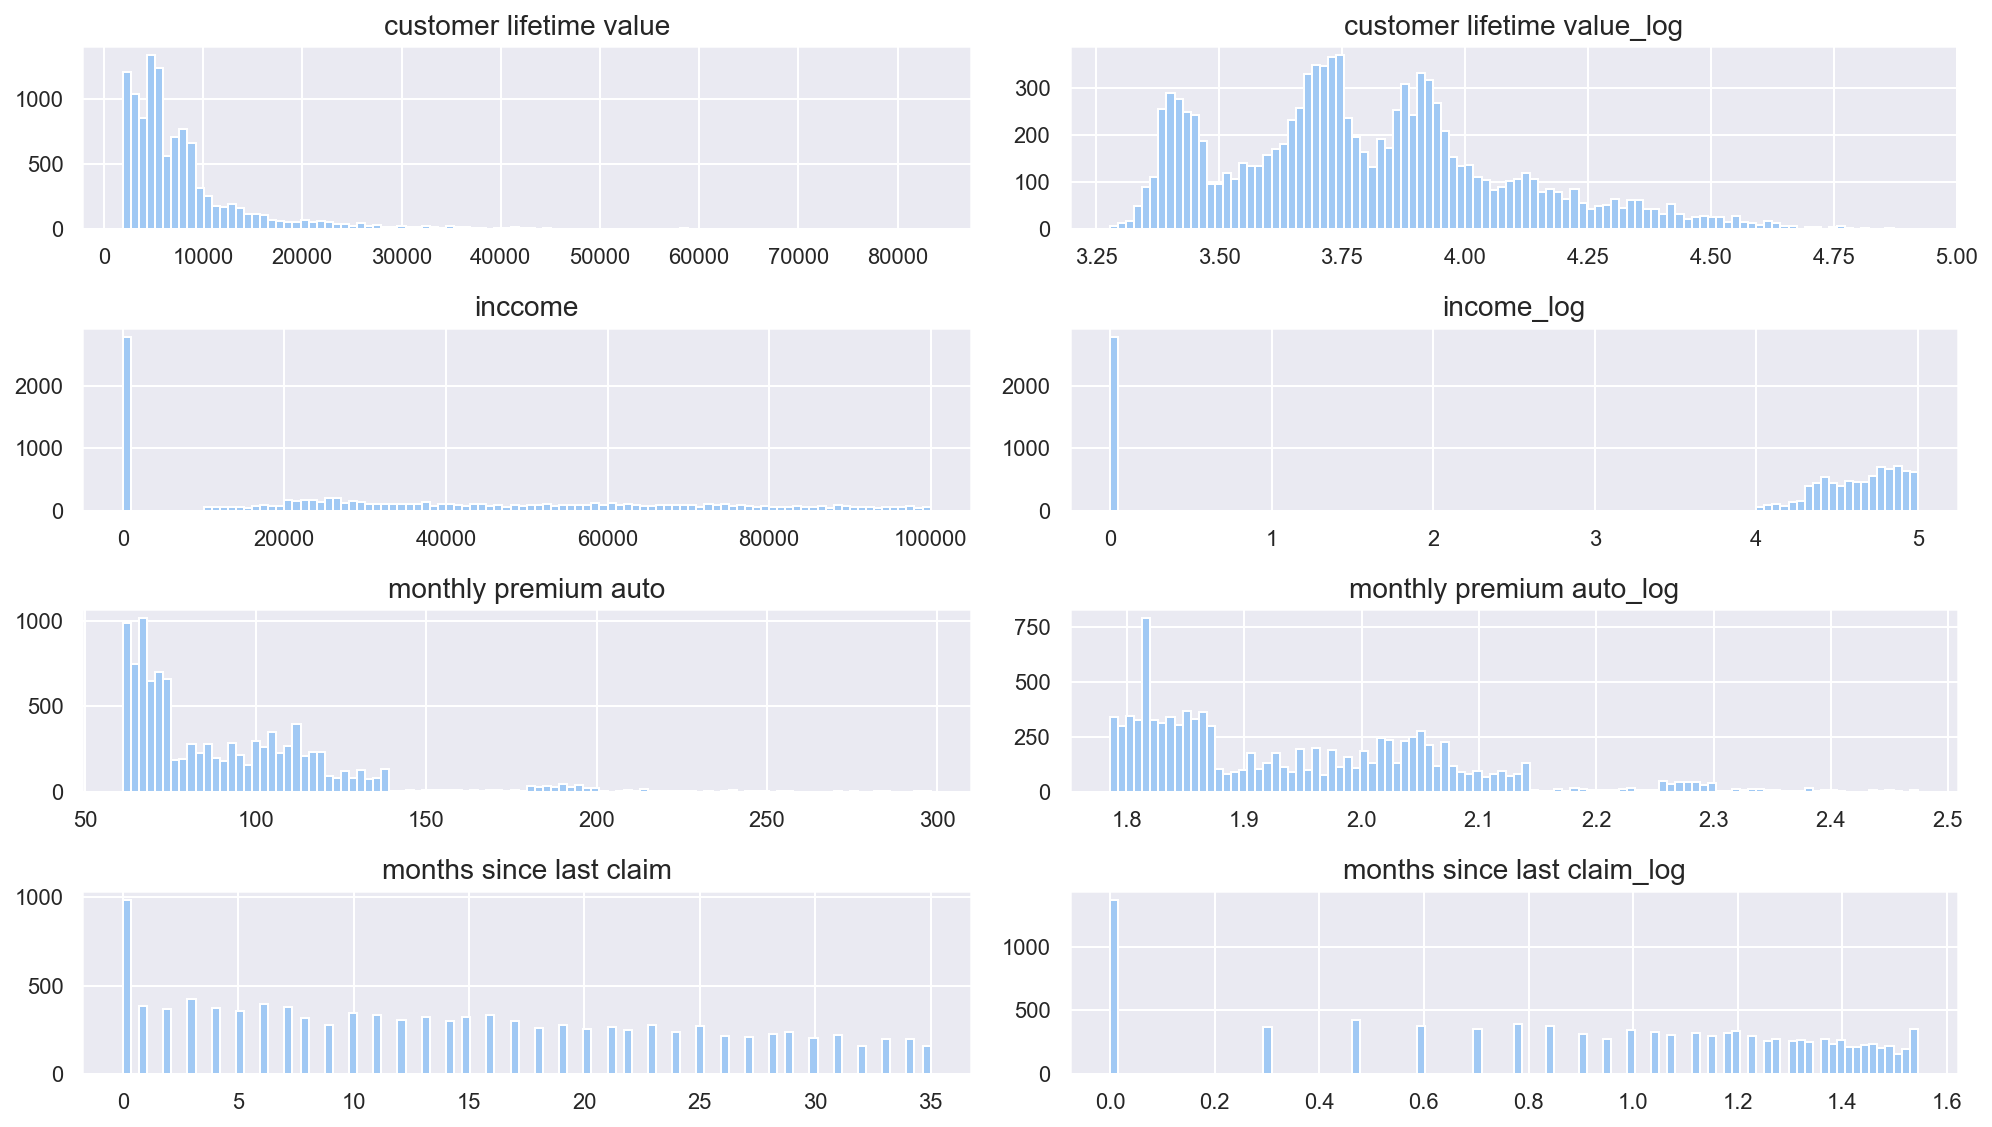

In [21]:
#Check new distributions comparing the new columns

# Figure and Axes  
fig, axes=plt.subplots(4,2)

#Customer Lifetime value
axes[0, 0].hist(df_num_log['customer lifetime value'], bins=100)
axes[0, 0].set_title('customer lifetime value', fontsize=14)
axes[0, 1].hist(df_num_log['customer lifetime value_log'], bins=100)
axes[0, 1].set_title('customer lifetime value_log', fontsize=14)

#Customer income
axes[1, 0].hist(df_num_log['income'], bins=100)
axes[1, 0].set_title('inccome', fontsize=14)
axes[1, 1].hist(df_num_log['income_log'], bins=100)
axes[1, 1].set_title('income_log', fontsize=14)

#monthly premium auto
axes[2, 0].hist(df_num_log['monthly premium auto'], bins=100)
axes[2, 0].set_title('monthly premium auto', fontsize=14)
axes[2, 1].hist(df_num_log['monthly premium auto_log'], bins=100)
axes[2, 1].set_title('monthly premium auto_log', fontsize=14)

#months since last claim
axes[3, 0].hist(df_num_log['months since last claim'], bins=100)
axes[3, 0].set_title('months since last claim', fontsize=14)
axes[3, 1].hist(df_num_log['months since last claim_log'], bins=100)
axes[3, 1].set_title('months since last claim_log', fontsize=14)



plt.tight_layout()
plt.show()

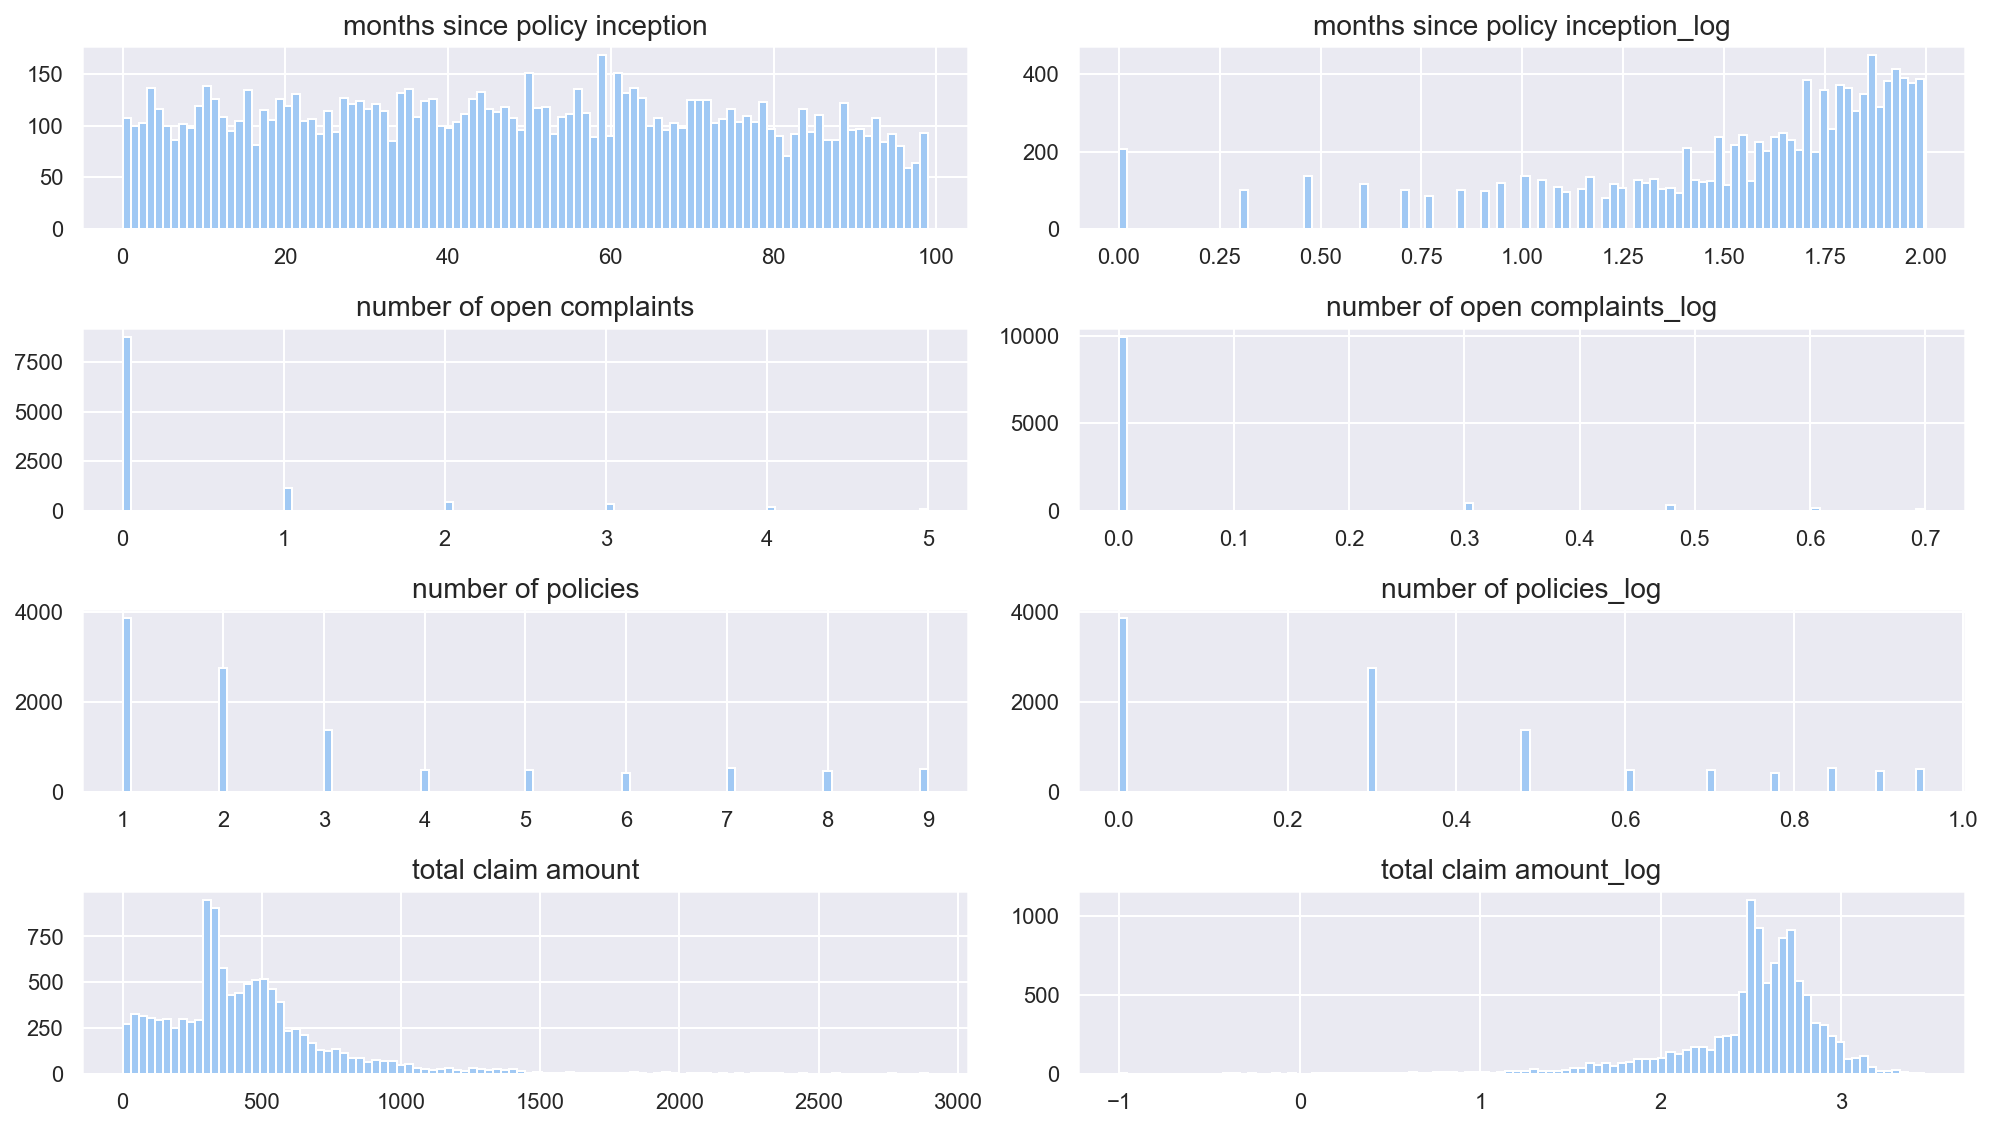

In [22]:
# Figure and Axes  
fig, axes=plt.subplots(4,2)

#months since policy inception
axes[0, 0].hist(df_num_log['months since policy inception'], bins=100)
axes[0, 0].set_title('months since policy inception', fontsize=14)
axes[0, 1].hist(df_num_log['months since policy inception_log'], bins=100)
axes[0, 1].set_title('months since policy inception_log', fontsize=14)

#number of open complaints
axes[1, 0].hist(df_num_log['number of open complaints'], bins=100)
axes[1, 0].set_title('number of open complaints', fontsize=14)
axes[1, 1].hist(df_num_log['number of open complaints_log'], bins=100)
axes[1, 1].set_title('number of open complaints_log', fontsize=14)

#Cinumber of policies
axes[2, 0].hist(df_num_log['number of policies'], bins=100)
axes[2, 0].set_title('number of policies', fontsize=14)
axes[2, 1].hist(df_num_log['number of policies_log'], bins=100)
axes[2, 1].set_title('number of policies_log', fontsize=14)

#total claim amount
axes[3, 0].hist(df_num_log['total claim amount'], bins=100)
axes[3, 0].set_title('total claim amount', fontsize=14)
axes[3, 1].hist(df_num_log['total claim amount_log'], bins=100)
axes[3, 1].set_title('total claim amount_log', fontsize=14)

plt.tight_layout()
plt.show()


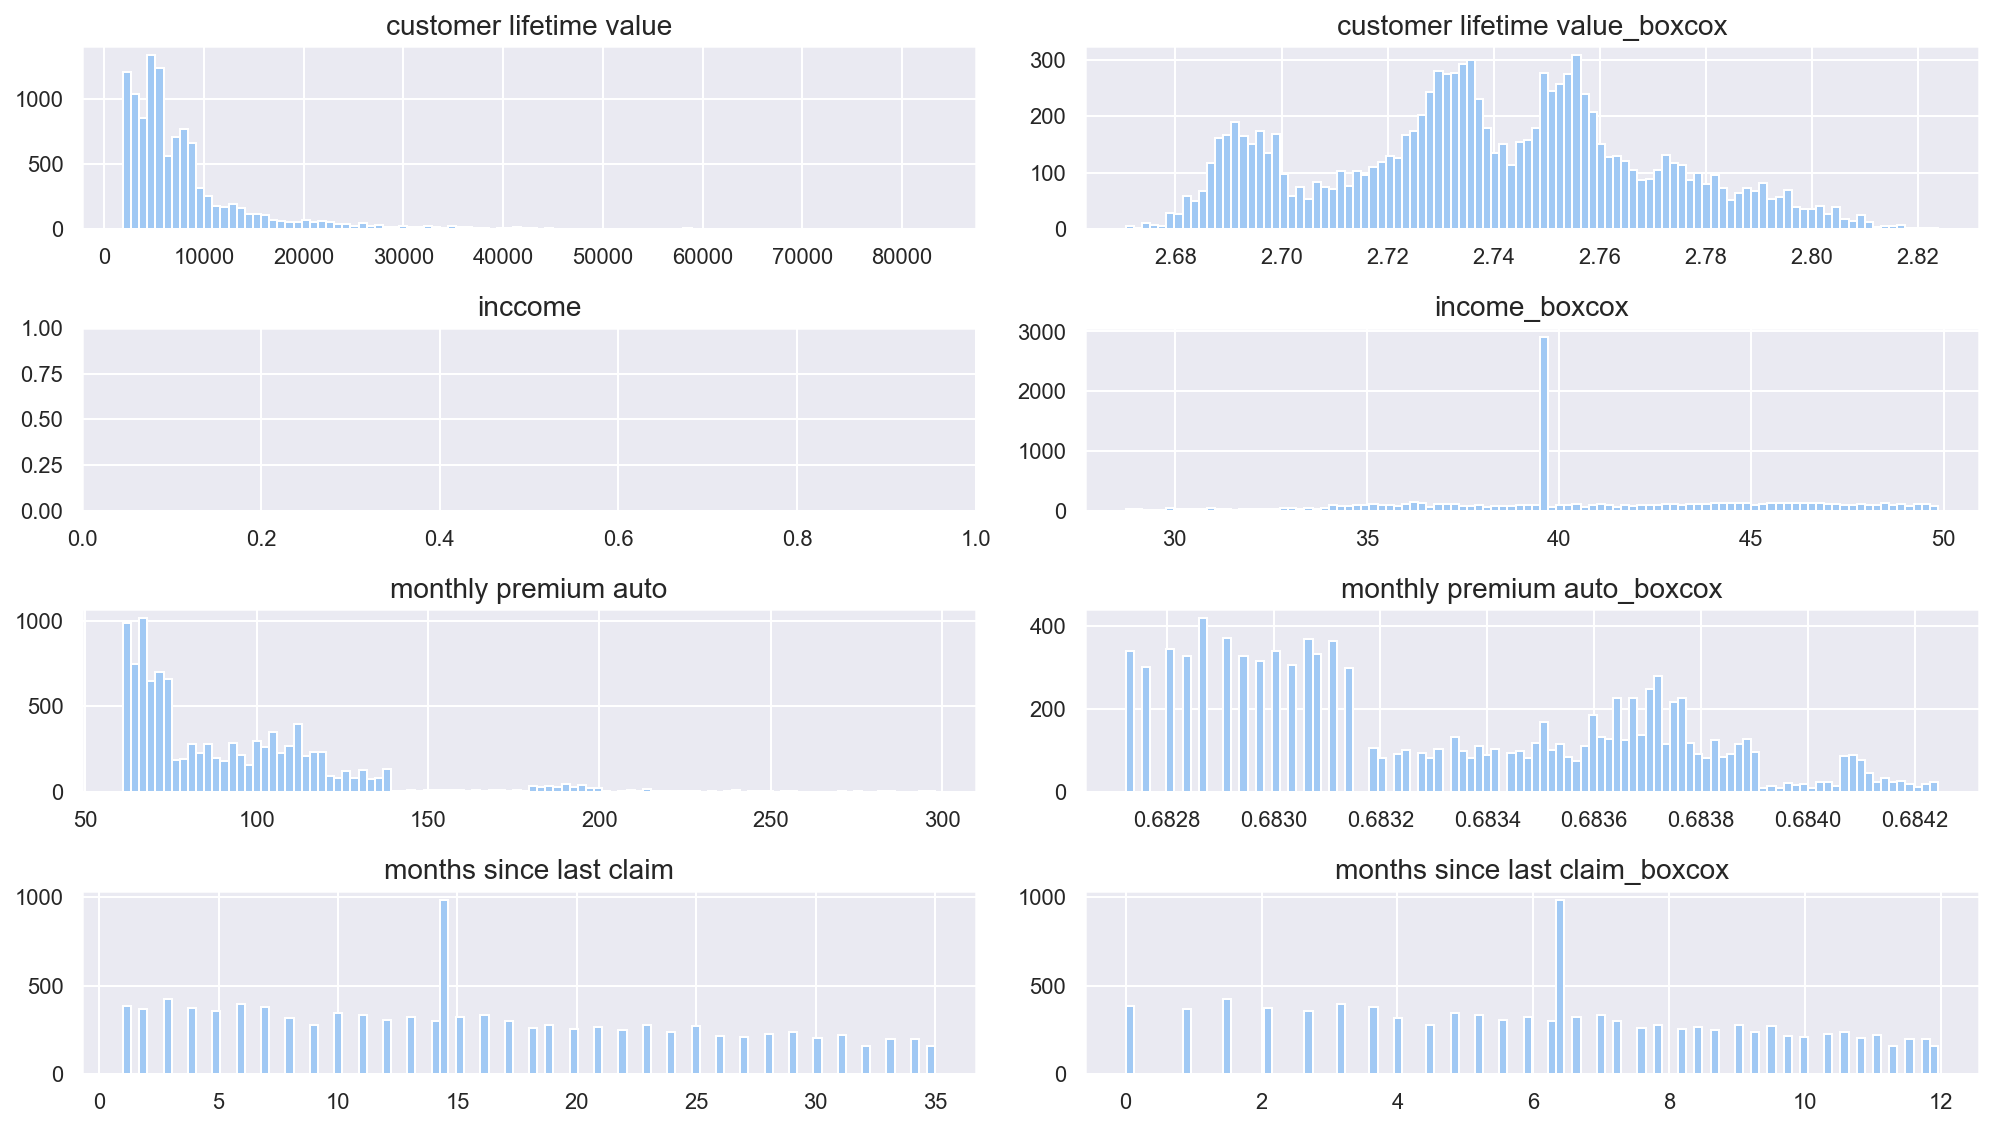

In [23]:
#Import SCIPY library to proceed with the BoxCox transformation
from scipy import stats
def boxcox(df_num):
    """This function will create a new data set with same columns and new columns BoxCox transformed"""
    
    #Copy Data before Transformations
    df_num_boxcox = df_num.copy()
    
    #Iterate over the columns and apply boxcox transformation
    for col in df_num_boxcox.columns:
        #convert negative values
        df_num_boxcox[col] = np.where(df_num_boxcox[col] <= 0, df_num_boxcox[col].mean(), df_num_boxcox[col]) 
        #BoxCox Transfromation and new column creation
        xt, lmbda = stats.boxcox(df_num_boxcox[col])
        df_num_boxcox[col+'_boxcox'] = xt
         
    #Sort Columns in alphetical order    
    df_num_boxcox = df_num_boxcox.reindex(sorted(df_num_boxcox.columns), axis=1)
    
    return df_num_boxcox
#New DataSet Creation with BoxCox Transformation Columns
df_num_boxcox = boxcox(df_num)
#Check new distributions comparing the new columns

# Figure and Axes  
fig, axes=plt.subplots(4,2)

#Customer Lifetime value
axes[0, 0].hist(df_num_boxcox['customer lifetime value'], bins=100)
axes[0, 0].set_title('customer lifetime value', fontsize=14)
axes[0, 1].hist(df_num_boxcox['customer lifetime value_boxcox'], bins=100)
axes[0, 1].set_title('customer lifetime value_boxcox', fontsize=14)

#Customer incomeaxes[1, 0].hist(df_num_boxcox['income'], bins=100)
axes[1, 0].set_title('inccome', fontsize=14)
axes[1, 1].hist(df_num_boxcox['income_boxcox'], bins=100)
axes[1, 1].set_title('income_boxcox', fontsize=14)

#monthly premium auto
axes[2, 0].hist(df_num_boxcox['monthly premium auto'], bins=100)
axes[2, 0].set_title('monthly premium auto', fontsize=14)
axes[2, 1].hist(df_num_boxcox['monthly premium auto_boxcox'], bins=100)
axes[2, 1].set_title('monthly premium auto_boxcox', fontsize=14)

#months since last claim
axes[3, 0].hist(df_num_boxcox['months since last claim'], bins=100)
axes[3, 0].set_title('months since last claim', fontsize=14)
axes[3, 1].hist(df_num_boxcox['months since last claim_boxcox'], bins=100)
axes[3, 1].set_title('months since last claim_boxcox', fontsize=14)



plt.tight_layout()
plt.show()

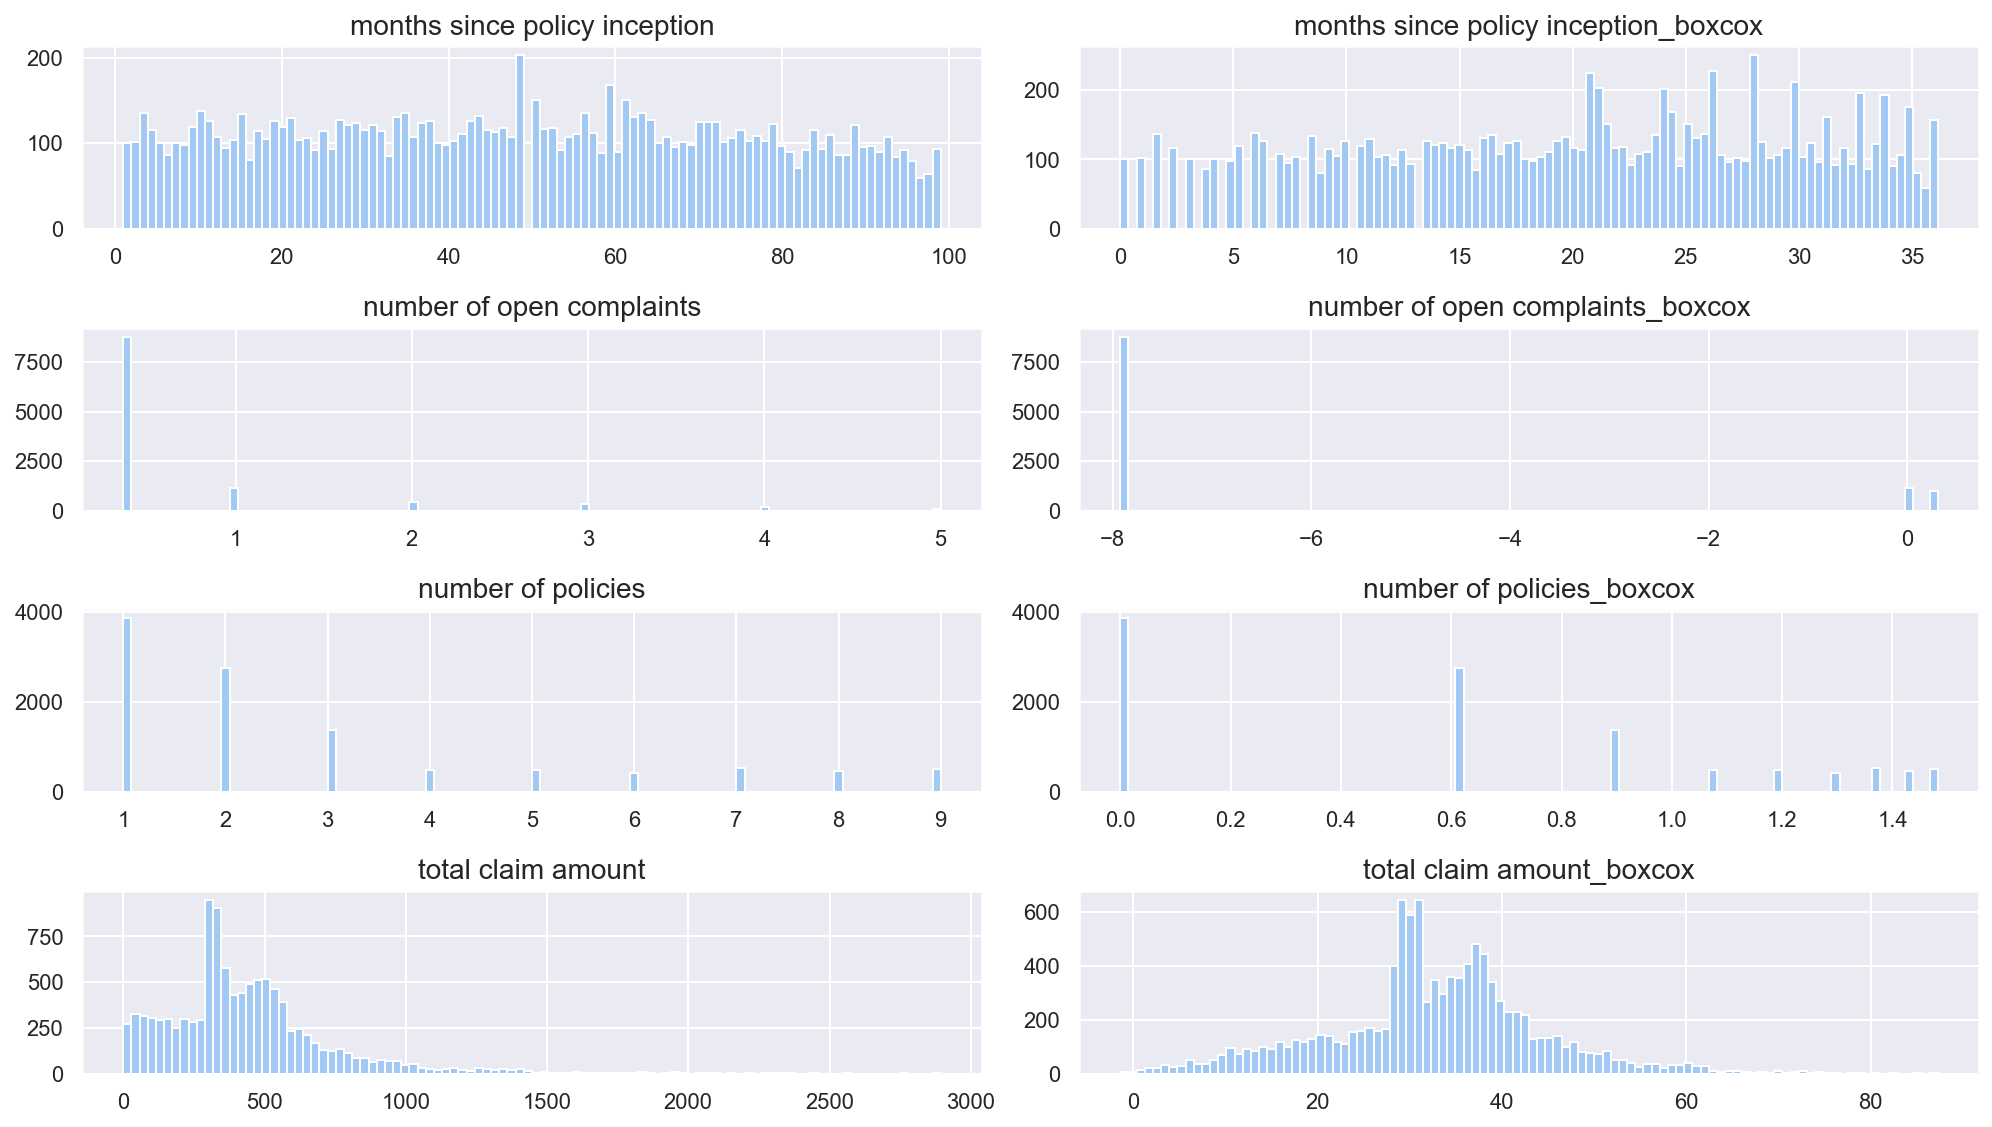

In [24]:
#Check new distributions comparing the new columns

# Figure and Axes  
fig, axes=plt.subplots(4,2)

#months since policy inception
axes[0, 0].hist(df_num_boxcox['months since policy inception'], bins=100)
axes[0, 0].set_title('months since policy inception', fontsize=14)
axes[0, 1].hist(df_num_boxcox['months since policy inception_boxcox'], bins=100)
axes[0, 1].set_title('months since policy inception_boxcox', fontsize=14)

#number of open complaints
axes[1, 0].hist(df_num_boxcox['number of open complaints'], bins=100)
axes[1, 0].set_title('number of open complaints', fontsize=14)
axes[1, 1].hist(df_num_boxcox['number of open complaints_boxcox'], bins=100)
axes[1, 1].set_title('number of open complaints_boxcox', fontsize=14)

#Cinumber of policies
axes[2, 0].hist(df_num_boxcox['number of policies'], bins=100)
axes[2, 0].set_title('number of policies', fontsize=14)
axes[2, 1].hist(df_num_boxcox['number of policies_boxcox'], bins=100)
axes[2, 1].set_title('number of policies_boxcox', fontsize=14)

#total claim amount
axes[3, 0].hist(df_num_boxcox['total claim amount'], bins=100)
axes[3, 0].set_title('total claim amount', fontsize=14)
axes[3, 1].hist(df_num_boxcox['total claim amount_boxcox'], bins=100)
axes[3, 1].set_title('total claim amount_boxcox', fontsize=14)

plt.tight_layout()
plt.show()

In [26]:
df_num.columns

Index(['unnamed: 0', 'customer lifetime value', 'income',
       'monthly premium auto', 'months since last claim',
       'months since policy inception', 'number of open complaints',
       'number of policies', 'total claim amount', 'month'],
      dtype='object')

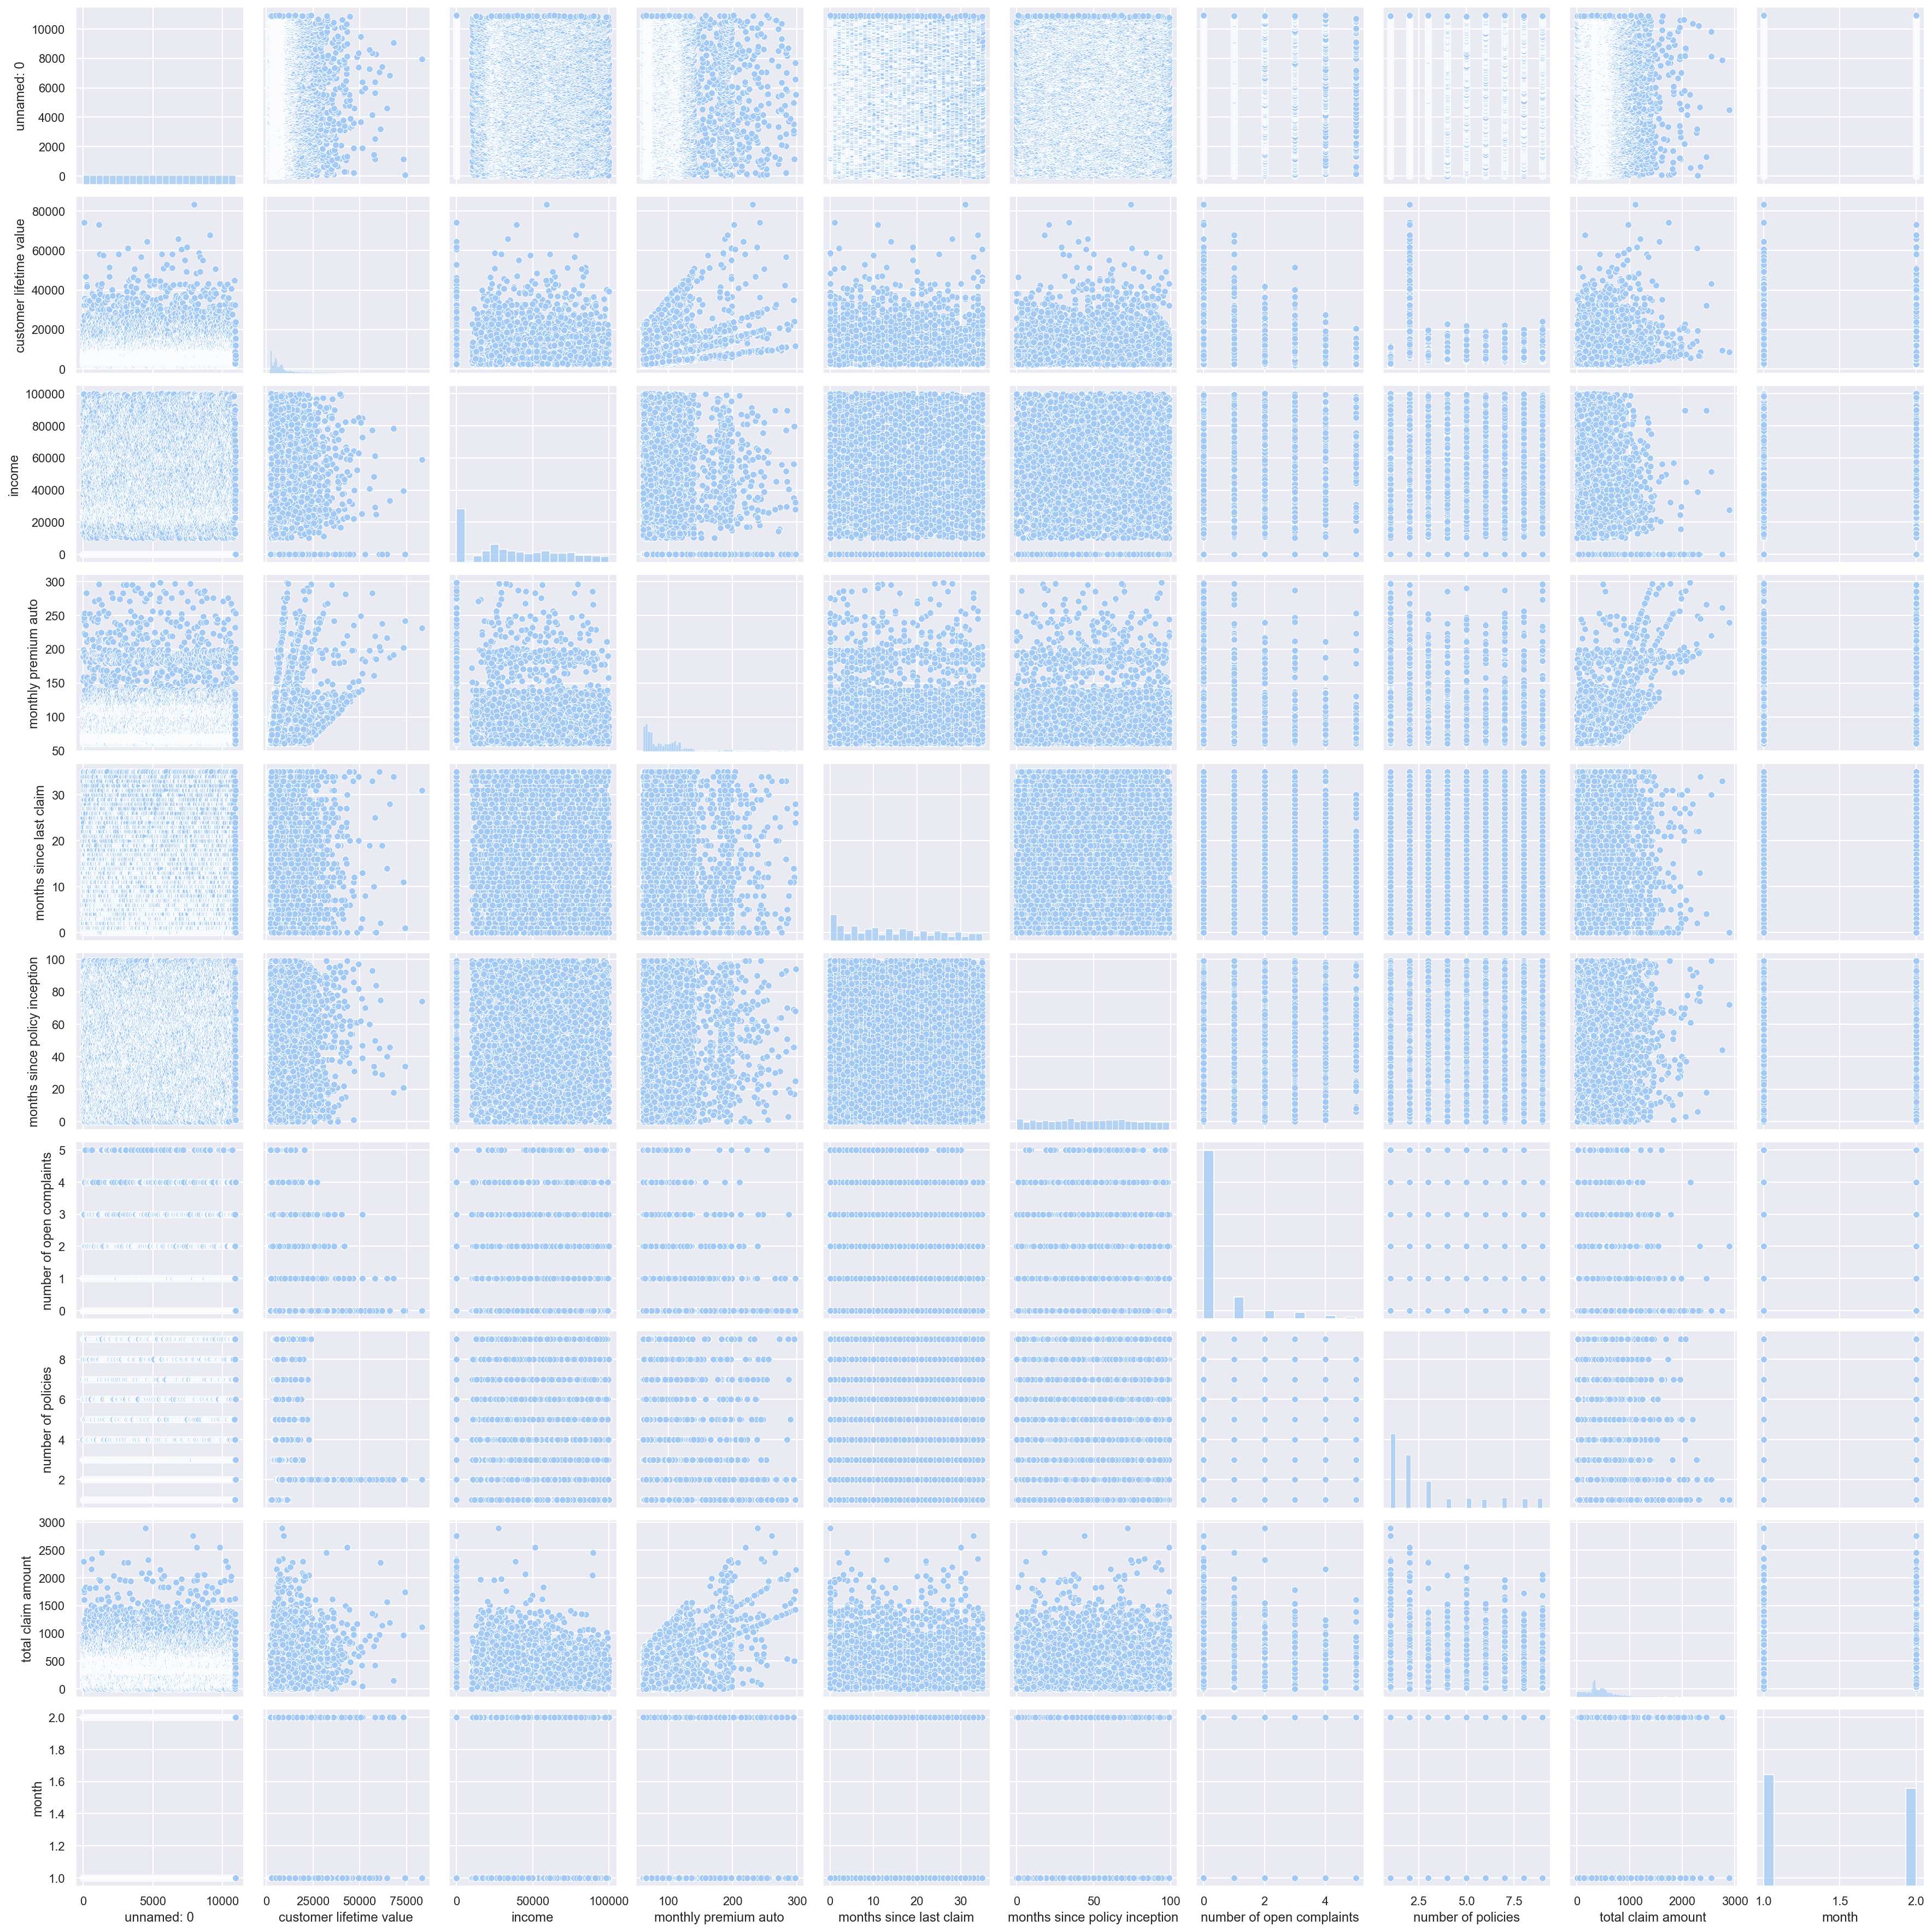

In [27]:
# Check multicolinearity with a pairplot
sns.pairplot(df_num)

In [30]:
def correlation(df_num):
    """  This function will allow us to get the features which are more correlated with the Targeted Column 'total claim amount' """

    correlations = df_num.corr()

    mask = (correlations['total claim amount']> 0.2)

    # correlations[mask]
    return correlations[mask]['total claim amount']
# Pearson correlation matrix (Linear)

df_num.corr() # Person correlation 

unnamed: 0  customer lifetime value    income  \
unnamed: 0                       1.000000                 0.001355  0.008910   
customer lifetime value          0.001355                 1.000000  0.028306   
income                           0.008910                 0.028306  1.000000   
monthly premium auto             0.000863                 0.403069 -0.009788   
months since last claim          0.013572                 0.017189 -0.016671   
months since policy inception    0.012795                 0.016960 -0.005903   
number of open complaints        0.008943                -0.030616  0.008425   
number of policies               0.002319                 0.016024 -0.009960   
total claim amount              -0.000593                 0.232626 -0.354141   
month                            0.004755                -0.009234 -0.000443   

                               monthly premium auto  months since last claim  \
unnamed: 0                                 0.000863                 0.013572   
customer lifetime value                    0.403069                 0.017189   
income                                    -0.009788                -0.016671   
monthly premium auto                       1.000000                 0.007845   
months since last claim                    0.007845                 1.000000   
months since policy inception              0.018953                -0.036081   
number of open complaints                 -0.010059                 0.036455   
number of policies                        -0.020505                -0.000649   
total claim amount                         0.631799                 0.007210   
month                                      0.007253                -0.022099   

                               months since policy inception  \
unnamed: 0                                          0.012795   
customer lifetime value                             0.016960   
income                                             -0.005903   
monthly premium auto                                0.018953   
months since last claim                            -0.036081   
months since policy inception                       1.000000   
number of open complaints                           0.004165   
number of policies                                 -0.009123   
total claim amount                                  0.003095   
month                                               0.015163   

                               number of open complaints  number of policies  \
unnamed: 0                                      0.008943            0.002319   
customer lifetime value                        -0.030616            0.016024   
income                                          0.008425           -0.009960   
monthly premium auto                           -0.010059           -0.020505   
months since last claim                         0.036455           -0.000649   
months since policy inception                   0.004165           -0.009123   
number of open complaints                       1.000000            0.001681   
number of policies                              0.001681            1.000000   
total claim amount                             -0.012380           -0.008923   
month                                          -0.005802            0.005127   

                               total claim amount     month  
unnamed: 0                              -0.000593  0.004755  
customer lifetime value                  0.232626 -0.009234  
income                                  -0.354141 -0.000443  
monthly premium auto                     0.631799  0.007253  
months since last claim                  0.007210 -0.022099  
months since policy inception            0.003095  0.015163  
number of open complaints               -0.012380 -0.005802  
number of policies                      -0.008923  0.005127  
total claim amount                       1.000000  0.001425  
month                                    0.001425  1.000000

In [32]:
# Run the Function def correlations to see what features are most correlated with ['total claim amount']:

correlation(df_num)

customer lifetime value    0.232626
monthly premium auto       0.631799
total claim amount         1.000000
Name: total claim amount, dtype: float64

In [33]:
# Spearman correlation matrix - No liear tendencies

df_num.corr('spearman') 

unnamed: 0  customer lifetime value    income  \
unnamed: 0                       1.000000                 0.013873  0.008661   
customer lifetime value          0.013873                 1.000000  0.058577   
income                           0.008661                 0.058577  1.000000   
monthly premium auto             0.004918                 0.454289 -0.009749   
months since last claim          0.013237                 0.004184 -0.014825   
months since policy inception    0.012922                 0.001445 -0.006549   
number of open complaints       -0.001764                -0.025659  0.009000   
number of policies               0.006852                 0.483307 -0.013528   
total claim amount              -0.004884                 0.213352 -0.399412   
month                            0.004755                -0.006368 -0.001116   

                               monthly premium auto  months since last claim  \
unnamed: 0                                 0.004918                 0.013237   
customer lifetime value                    0.454289                 0.004184   
income                                    -0.009749                -0.014825   
monthly premium auto                       1.000000                -0.004575   
months since last claim                   -0.004575                 1.000000   
months since policy inception              0.012536                -0.040334   
number of open complaints                 -0.009030                 0.050874   
number of policies                        -0.013975                 0.001151   
total claim amount                         0.522180                -0.004756   
month                                      0.013121                -0.022201   

                               months since policy inception  \
unnamed: 0                                          0.012922   
customer lifetime value                             0.001445   
income                                             -0.006549   
monthly premium auto                                0.012536   
months since last claim                            -0.040334   
months since policy inception                       1.000000   
number of open complaints                          -0.007329   
number of policies                                 -0.005929   
total claim amount                                 -0.007351   
month                                               0.015100   

                               number of open complaints  number of policies  \
unnamed: 0                                     -0.001764            0.006852   
customer lifetime value                        -0.025659            0.483307   
income                                          0.009000           -0.013528   
monthly premium auto                           -0.009030           -0.013975   
months since last claim                         0.050874            0.001151   
months since policy inception                  -0.007329           -0.005929   
number of open complaints                       1.000000            0.000472   
number of policies                              0.000472            1.000000   
total claim amount                             -0.021864           -0.013149   
month                                          -0.006847           -0.000174   

                               total claim amount     month  
unnamed: 0                              -0.004884  0.004755  
customer lifetime value                  0.213352 -0.006368  
income                                  -0.399412 -0.001116  
monthly premium auto                     0.522180  0.013121  
months since last claim                 -0.004756 -0.022201  
months since policy inception           -0.007351  0.015100  
number of open complaints               -0.021864 -0.006847  
number of policies                      -0.013149 -0.000174  
total claim amount                       1.000000  0.002982  
month                                    0.002982  1.000000

In [34]:
# Kendall correlation matrix
df_num.corr('kendall')

unnamed: 0  customer lifetime value    income  \
unnamed: 0                       1.000000                 0.009187  0.005925   
customer lifetime value          0.009187                 1.000000  0.040256   
income                           0.005925                 0.040256  1.000000   
monthly premium auto             0.003350                 0.351045 -0.006682   
months since last claim          0.008951                 0.002845 -0.010369   
months since policy inception    0.008750                 0.000894 -0.004452   
number of open complaints       -0.001386                -0.020260  0.007327   
number of policies               0.005019                 0.297968 -0.010084   
total claim amount              -0.003186                 0.145883 -0.278467   
month                            0.003883                -0.005200 -0.000935   

                               monthly premium auto  months since last claim  \
unnamed: 0                                 0.003350                 0.008951   
customer lifetime value                    0.351045                 0.002845   
income                                    -0.006682                -0.010369   
monthly premium auto                       1.000000                -0.003083   
months since last claim                   -0.003083                 1.000000   
months since policy inception              0.008448                -0.027482   
number of open complaints                 -0.007197                 0.040976   
number of policies                        -0.010324                 0.000838   
total claim amount                         0.399057                -0.003233   
month                                      0.010811                -0.018422   

                               months since policy inception  \
unnamed: 0                                          0.008750   
customer lifetime value                             0.000894   
income                                             -0.004452   
monthly premium auto                                0.008448   
months since last claim                            -0.027482   
months since policy inception                       1.000000   
number of open complaints                          -0.005858   
number of policies                                 -0.004385   
total claim amount                                 -0.005045   
month                                               0.012393   

                               number of open complaints  number of policies  \
unnamed: 0                                     -0.001386            0.005019   
customer lifetime value                        -0.020260            0.297968   
income                                          0.007327           -0.010084   
monthly premium auto                           -0.007197           -0.010324   
months since last claim                         0.040976            0.000838   
months since policy inception                  -0.005858           -0.004385   
number of open complaints                       1.000000            0.000407   
number of policies                              0.000407            1.000000   
total claim amount                             -0.017345           -0.009720   
month                                          -0.006641           -0.000156   

                               total claim amount     month  
unnamed: 0                              -0.003186  0.003883  
customer lifetime value                  0.145883 -0.005200  
income                                  -0.278467 -0.000935  
monthly premium auto                     0.399057  0.010811  
months since last claim                 -0.003233 -0.018422  
months since policy inception           -0.005045  0.012393  
number of open complaints               -0.017345 -0.006641  
number of policies                      -0.009720 -0.000156  
total claim amount                       1.000000  0.002438  
month                                    0.002438  1.000000

<function matplotlib.pyplot.show(close=None, block=None)>

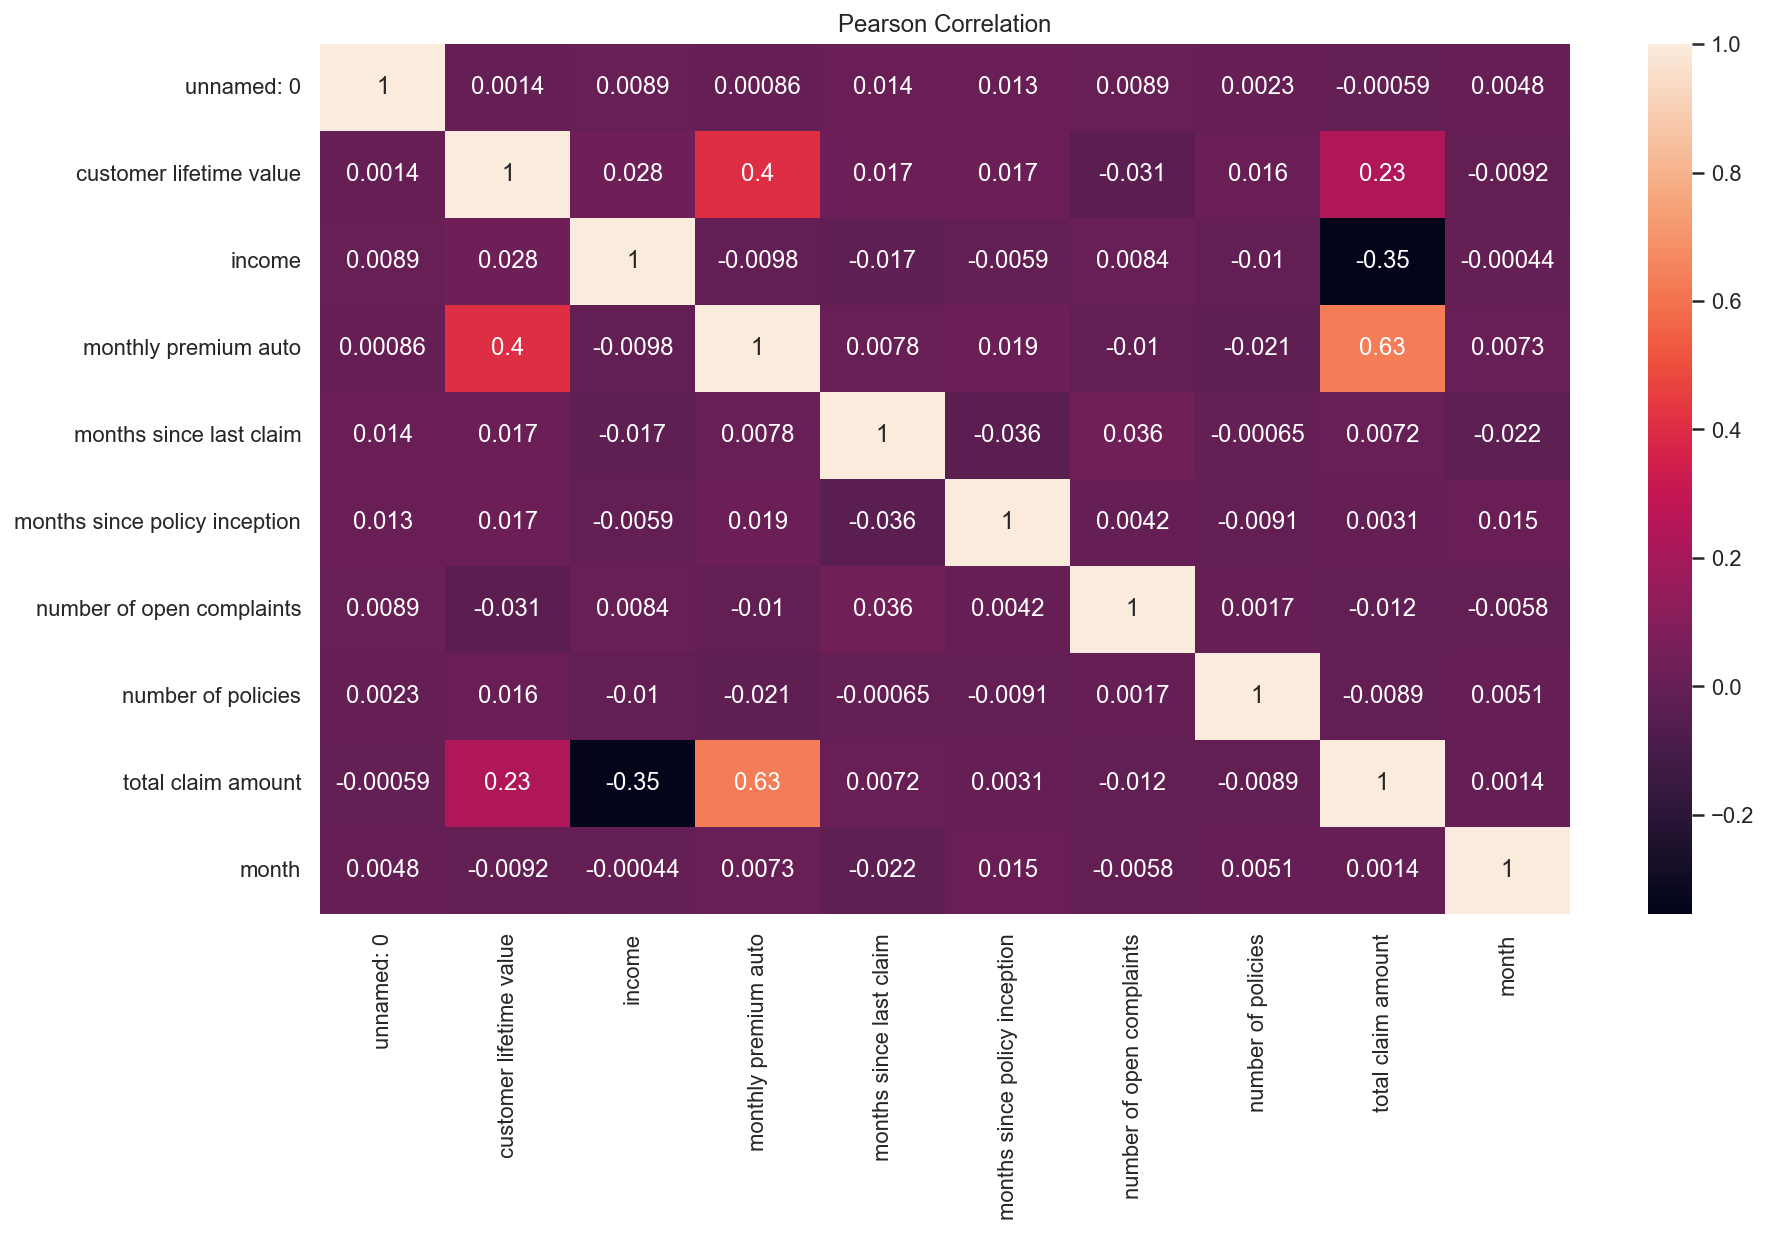

In [35]:
#heatmap

sns_plot = sns.heatmap(df_num.corr(), annot=True)
figure = sns_plot.get_figure()
sns_plot.set_title('Pearson Correlation')
plt.show

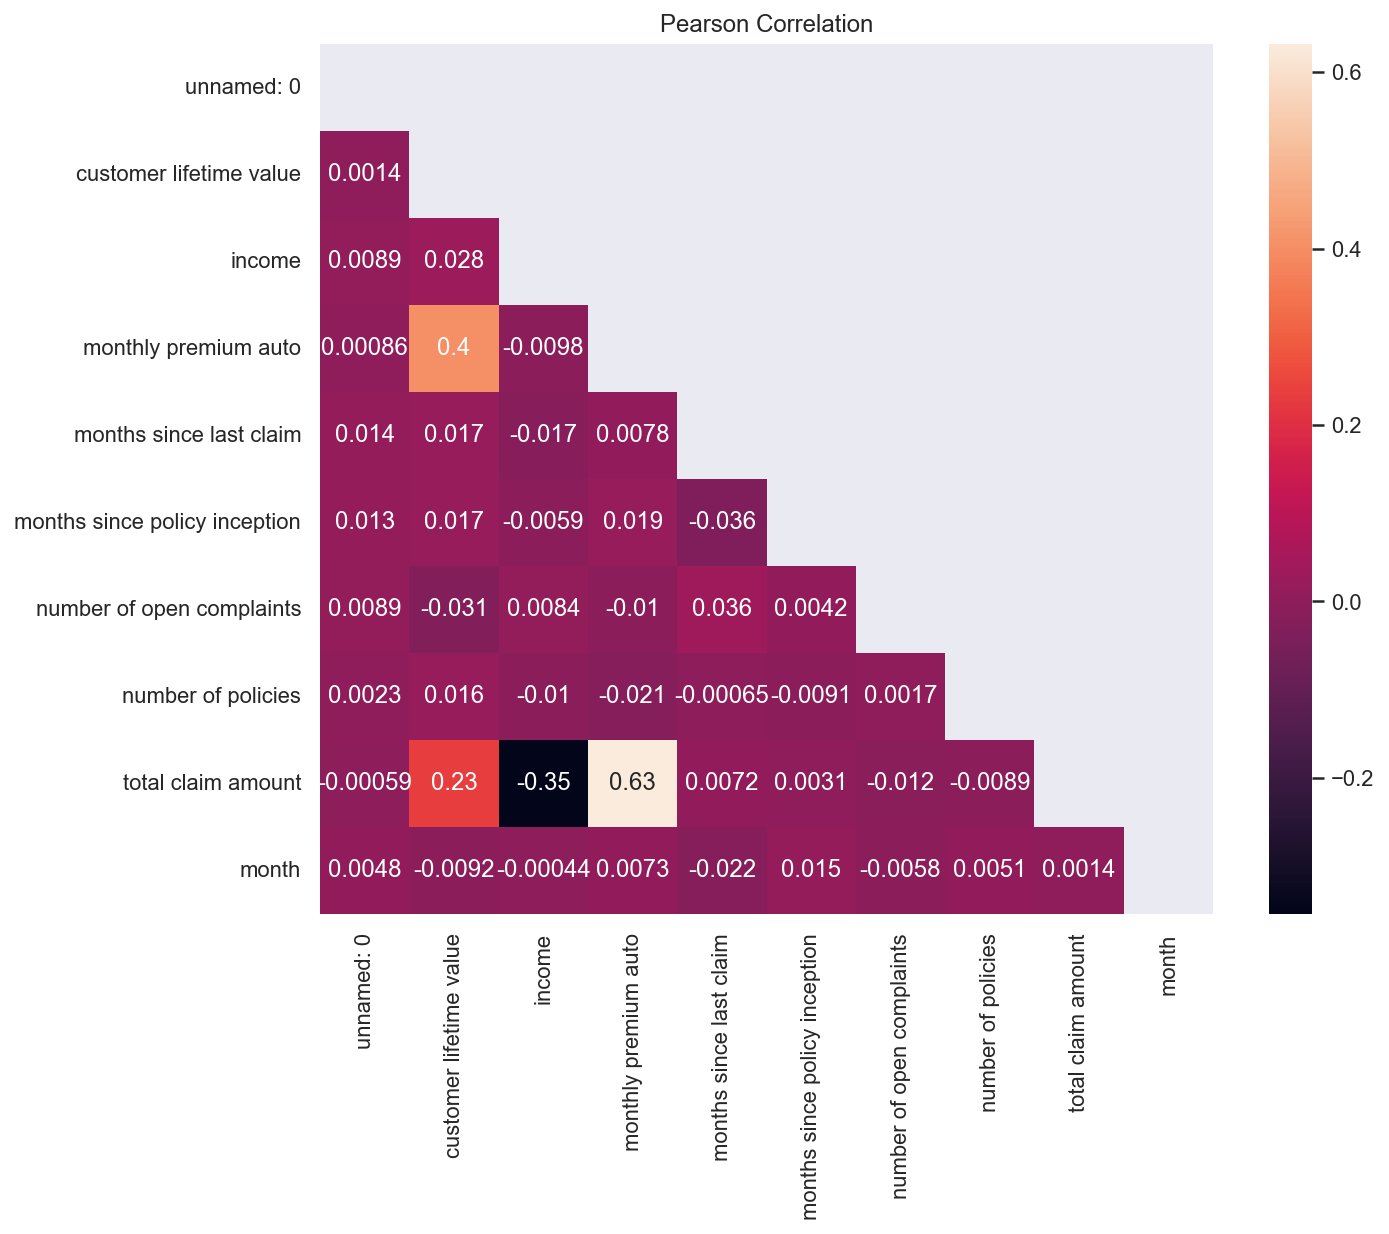

In [36]:
mask = np.zeros_like(df_num.corr())

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df_num.corr(), mask=mask, annot=True)
ax.set_title('Pearson Correlation')
plt.show()